___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)



# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("1-Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [4]:
df.shape

(10000, 14)

In [5]:
#check missing values , no missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#unique value count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [8]:
df.describe(include="O").T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [9]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2      0.000              1   
1          608     Spain  Female   41       1  83807.860              1   
2          502    France  Female   42       8 159660.800              3   
3          699    France  Female   39       1      0.000              2   
4          850     Spain  Female   43       2 125510.820              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1       101348.880       1  
1          0               1       112542.580       0  
2          1               0       113931.570       1  
3          0               0        93826.630       0  
4          1               1        79084.100       0

In [10]:
df.shape

(10000, 11)

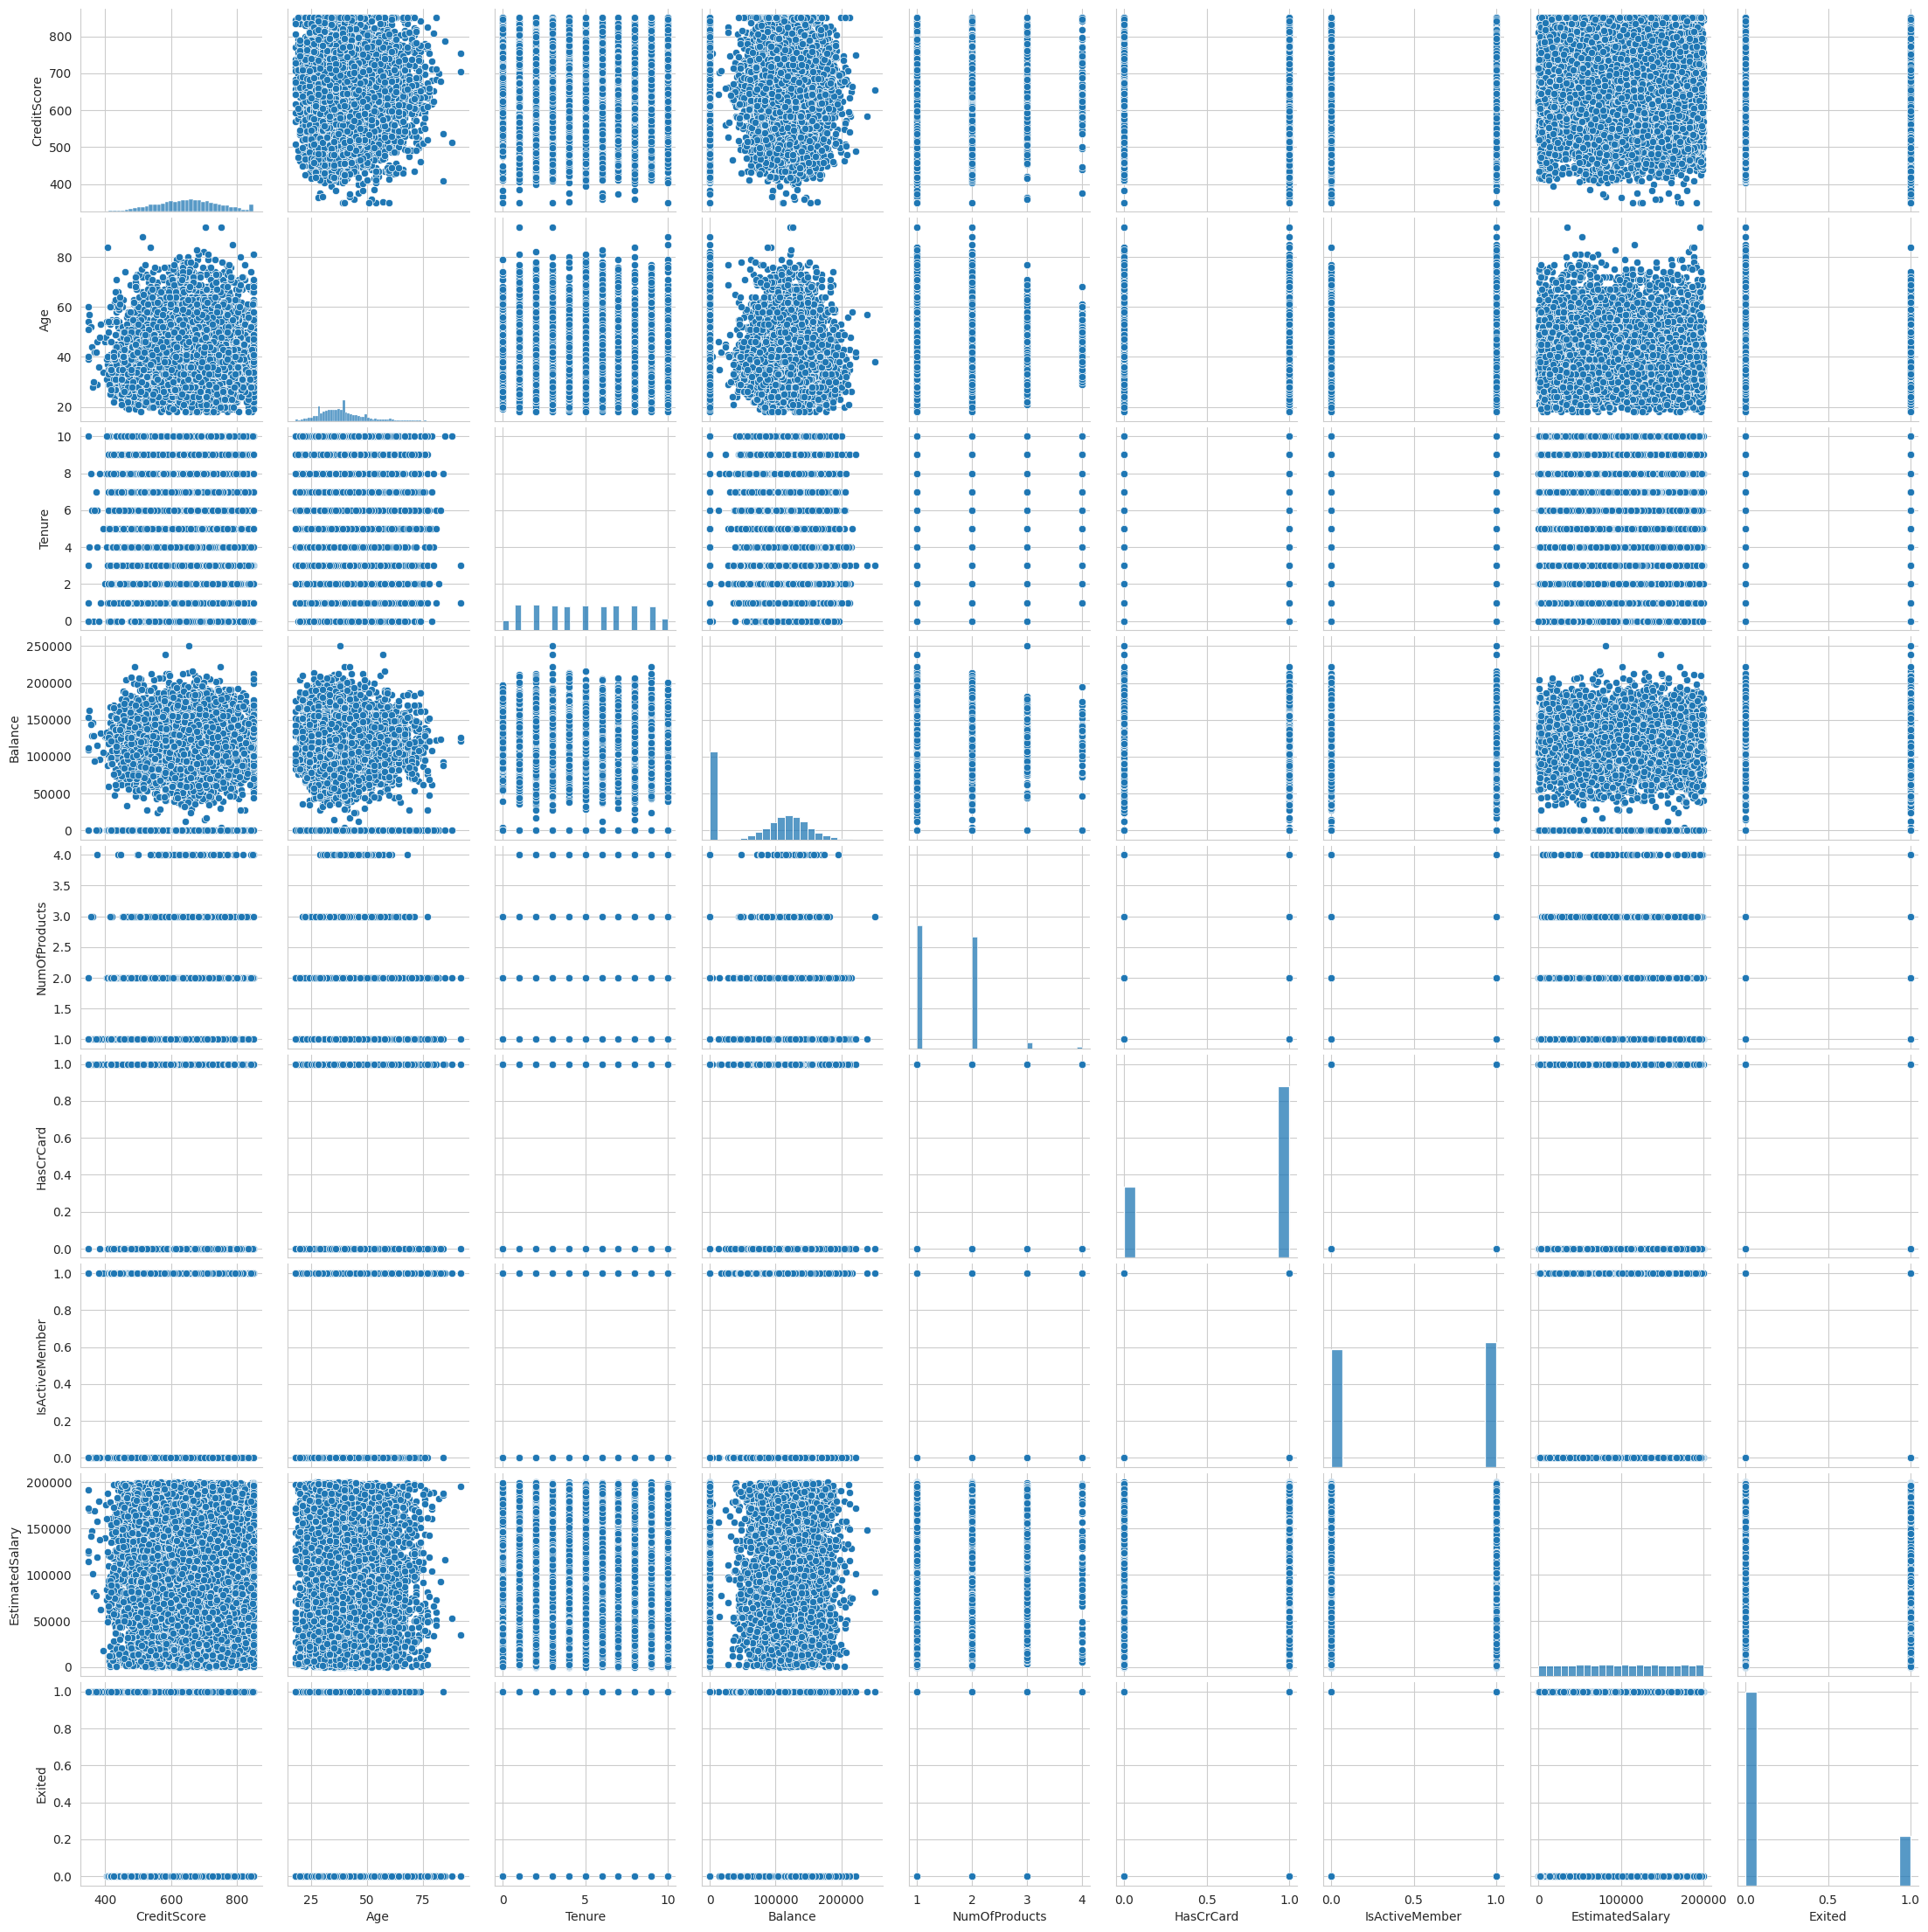

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


CreditScore    Age  Tenure  Balance  NumOfProducts  \
CreditScore            1.000 -0.004   0.001    0.006          0.012   
Age                   -0.004  1.000  -0.010    0.028         -0.031   
Tenure                 0.001 -0.010   1.000   -0.012          0.013   
Balance                0.006  0.028  -0.012    1.000         -0.304   
NumOfProducts          0.012 -0.031   0.013   -0.304          1.000   
HasCrCard             -0.005 -0.012   0.023   -0.015          0.003   
IsActiveMember         0.026  0.085  -0.028   -0.010          0.010   
EstimatedSalary       -0.001 -0.007   0.008    0.013          0.014   
Exited                -0.027  0.285  -0.014    0.119         -0.048   

                 HasCrCard  IsActiveMember  EstimatedSalary  Exited  
CreditScore         -0.005           0.026           -0.001  -0.027  
Age                 -0.012           0.085           -0.007   0.285  
Tenure               0.023          -0.028            0.008  -0.014  
Balance             -0.015          -0.010            0.013   0.119  
NumOfProducts        0.003           0.010            0.014  -0.048  
HasCrCard            1.000          -0.012           -0.010  -0.007  
IsActiveMember      -0.012           1.000           -0.011  -0.156  
EstimatedSalary     -0.010          -0.011            1.000   0.012  
Exited              -0.007          -0.156            0.012   1.000

<ipython-input-13-28f30f173a28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

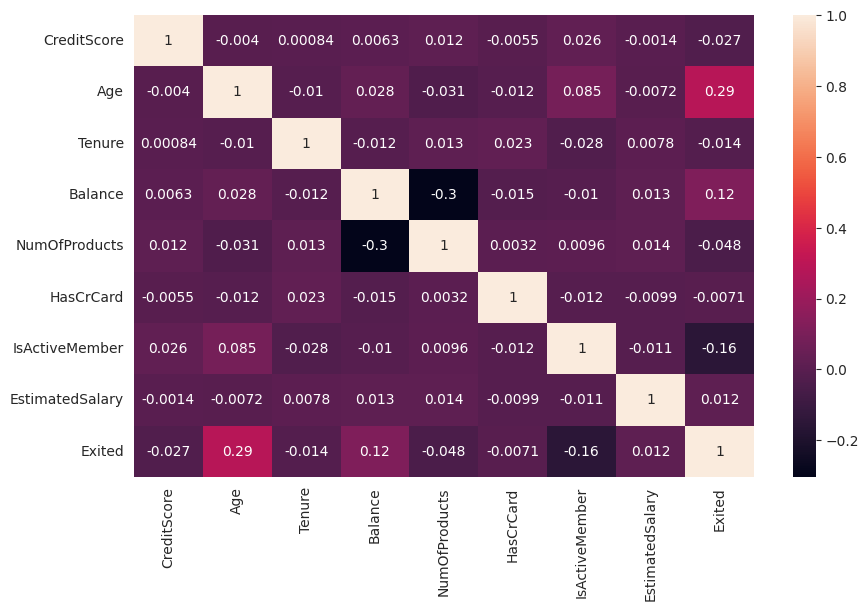

In [13]:
#Correlation plot
sns.heatmap(df.corr(),annot = True)

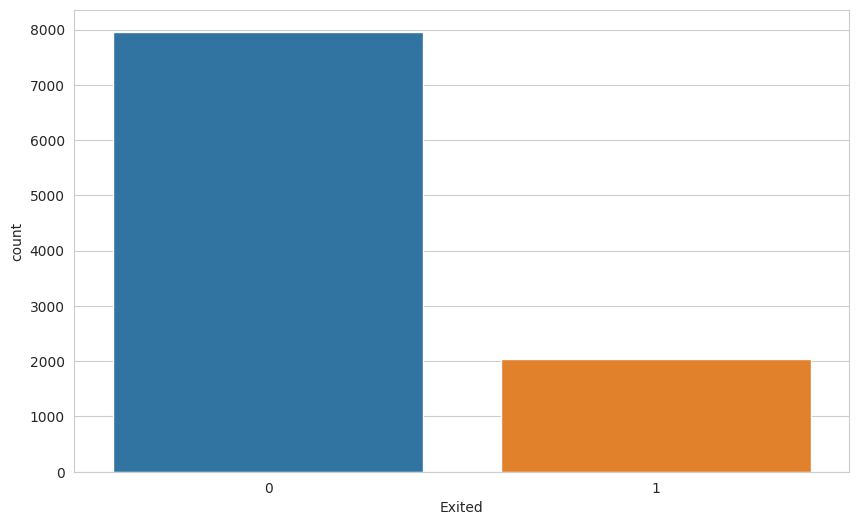

In [14]:
#1 if the customer closed account with bank and 0 if the customer is retained.
sns.countplot(x=df["Exited"])
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

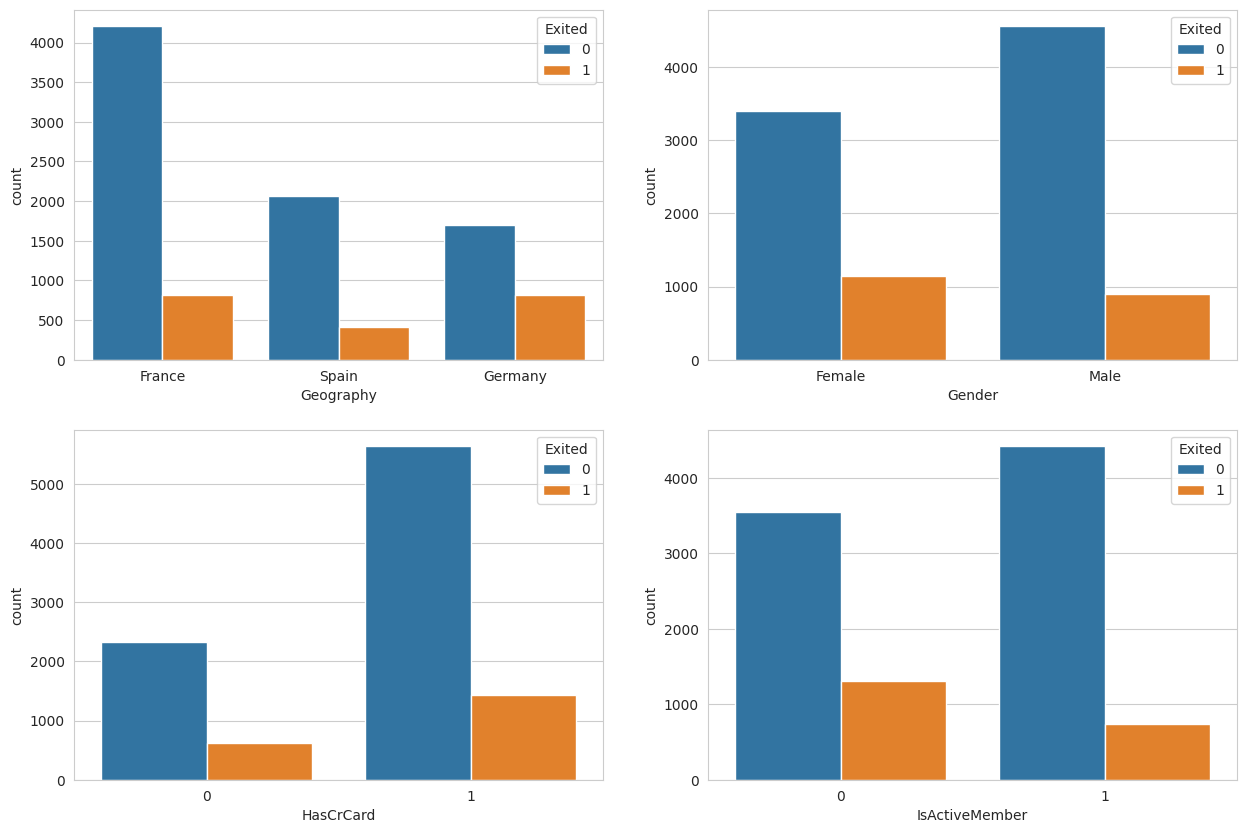

In [15]:
#visualization of categorical values
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

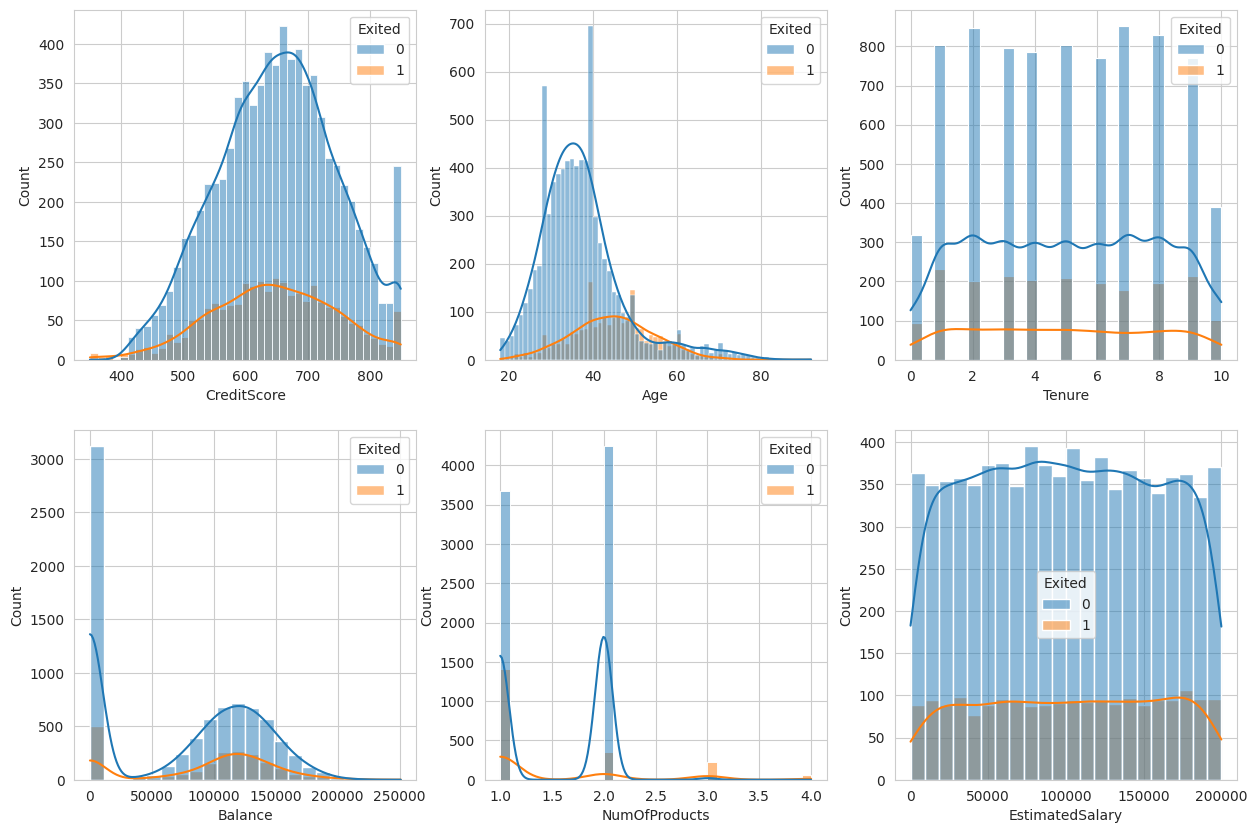

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(data=df, x="CreditScore",hue = 'Exited', kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="Age", hue = 'Exited', kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="Tenure", hue = 'Exited', kde=True,  ax=axs[0, 2])
sns.histplot(data=df, x="Balance", hue = 'Exited', kde=True,  ax=axs[1, 0])
sns.histplot(data=df, x="NumOfProducts", hue = 'Exited', kde=True,  ax=axs[1, 1])
sns.histplot(data=df, x="EstimatedSalary", hue = 'Exited', kde=True,  ax=axs[1, 2])

In [17]:
# OneHotEncoder converts categorical features into dummies 0 and 1 features
from sklearn.preprocessing import OneHotEncoder
cat_onehot = df[['Geography', 'Gender']]
enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")
onehot_enc=enc.fit_transform(cat_onehot)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
df2 = pd.concat([df,onehot_enc],axis=1)

In [19]:
df2 = df2.drop(["Geography", "Gender"], axis = 1)
df2.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1       101348.880       1             1.000   
1               1       112542.580       0             0.000   
2               0       113931.570       1             1.000   
3               0        93826.630       0             1.000   
4               1        79084.100       0             0.000   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0              0.000            0.000          1.000        0.000  
1              0.000            1.000          1.000        0.000  
2              0.000            0.000          1.000        0.000  
3              0.000            0.000          1.000        0.000  
4              0.000            1.000          1.000        0.000

In [20]:
df2.shape

(10000, 14)

# Preprocessing of Data
- Train | Test Split, Scalling

In [21]:
X = df2.drop("Exited", axis =1)
y = df2["Exited"]

In [22]:
df2.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.000              1          1   
1          608   41       1  83807.860              1          0   
2          502   42       8 159660.800              3          1   
3          699   39       1      0.000              2          0   
4          850   43       2 125510.820              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1       101348.880       1             1.000   
1               1       112542.580       0             0.000   
2               0       113931.570       1             1.000   
3               0        93826.630       0             1.000   
4               1        79084.100       0             0.000   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0              0.000            0.000          1.000        0.000  
1              0.000            1.000          1.000        0.000  
2              0.000            0.000          1.000        0.000  
3              0.000            0.000          1.000        0.000  
4              0.000            1.000          1.000        0.000

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [25]:
X_train.shape

(7000, 13)

In [26]:
X_test.shape

(3000, 13)

In [27]:
# Scale the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [30]:
# First way to create the model using the Sequential API
# Input Layer — As the training data has 13 features, the input layer will have 13 neurons
#Output Layer — As this is a binary classification problem a single neuron will work in the output layer.

model = Sequential(
    [
        Input(shape=X_train.shape[1]),#input layer
        Dense(units=7, activation="relu"),#first hidden layer
        Dense(units=7, activation="relu"),#second hidden layer
        Dense(units=7, activation="relu"),#third hidden layer
        Dense(units=1, activation='sigmoid'),#output layer
    ]
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 218 (872.00 Byte)
Trainable params: 218 (872.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(13, 7) dtype=float32, numpy=
 array([[ 0.47452044, -0.09720302, -0.01333737, -0.44417775,  0.5020026 ,
         -0.36634526, -0.15259093],
        [-0.00527519, -0.06729579, -0.41570908, -0.5105944 ,  0.2339555 ,
         -0.45501348,  0.45160228],
        [-0.17894486,  0.00842732,  0.06488746, -0.23029909, -0.15390164,
         -0.21104151,  0.01925051],
        [ 0.03499109, -0.08797428, -0.02518195, -0.16655868, -0.49940765,
         -0.38558453, -0.30916032],
        [-0.02473128,  0.08900213, -0.23861659, -0.45500106,  0.19609839,
         -0.18345693, -0.25402483],
        [-0.3756022 ,  0.36905062,  0.24286419,  0.3319546 , -0.44507226,
         -0.40314186, -0.01410133],
        [ 0.4343145 ,  0.03478843,  0.39001513, -0.39555174, -0.01277143,
          0.12945831, -0.1865508 ],
        [ 0.13159758, -0.31822503, -0.45629585, -0.16830057, -0.4715419 ,
         -0.3737716 ,  0.5051966 ],
        [ 0.3844201 , -0.35211125,  0.30136245, -0.10

In [33]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[tf.keras.metrics.Recall()])

In [34]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32, epochs=1000)

Epoch 1/1000
186/186 [==============================] - 2s 6ms/step - loss: 0.5406 - recall: 0.0016 - val_loss: 0.4693 - val_recall: 0.0000e+00
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4717 - recall: 0.0000e+00 - val_loss: 0.4473 - val_recall: 0.0000e+00
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4553 - recall: 0.0000e+00 - val_loss: 0.4378 - val_recall: 0.0000e+00
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4463 - recall: 0.0000e+00 - val_loss: 0.4319 - val_recall: 0.0000e+00
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4408 - recall: 0.0000e+00 - val_loss: 0.4281 - val_recall: 0.0000e+00
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4362 - recall: 0.0991 - val_loss: 0.4243 - val_recall: 0.1840
Epoch 7/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4312 - recall: 0.2006 - val_loss: 0.4228 - val

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 98        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 218 (872.00 Byte)
Trainable params: 218 (872.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
type(model.weights)

list

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

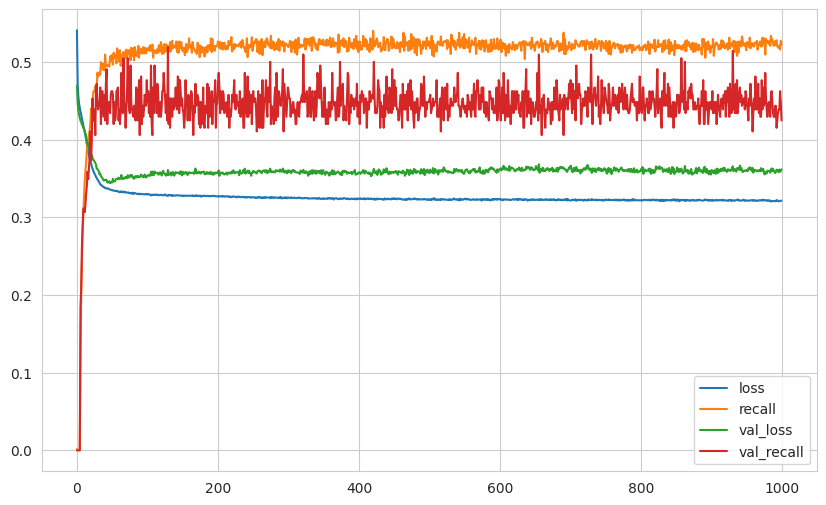

In [37]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [38]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.73      0.46      0.57       584

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [40]:
print(confusion_matrix(y_test, y_pred))

[[2317   99]
 [ 313  271]]


94/94 [==============================] - 0s 1ms/step


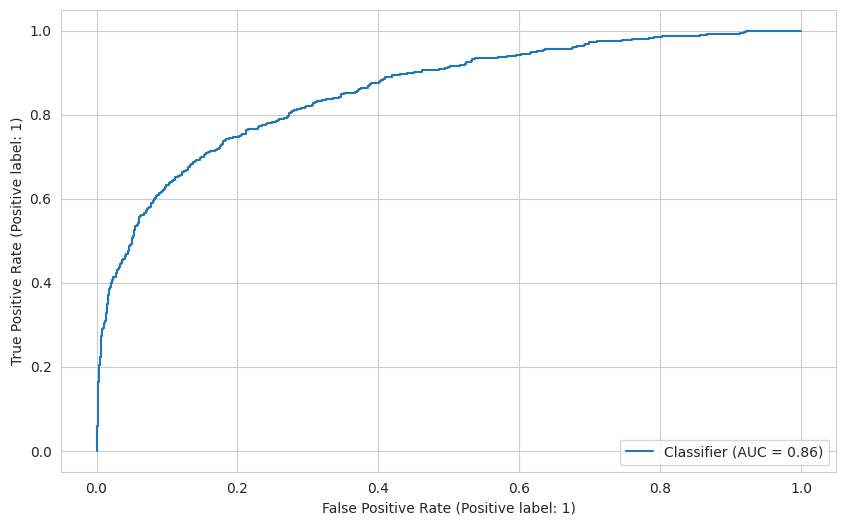

In [41]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8555477751065953

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [ ]:
# Count samples per class
#classes_zero = df[df['Exited'] == 0]
#classes_one = df[df['Exited'] == 1]

In [ ]:
# Convert parts into NumPy arrays for weight computation
#zero_numpy = classes_zero['Exited'].to_numpy()
#one_numpy = classes_one['Exited'].to_numpy()
#all_together = np.concatenate((zero_numpy, one_numpy)) #concatenate used to join two or more arrays
#unique_classes = np.unique(all_together) #returns an array of unique elements in the input array.

In [43]:
# Compute weights
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train) , y=y_train)
class_weight_dict=dict(enumerate(weights))

In [44]:
class_weight_dict

{0: 0.6309716964124752, 1: 2.4088093599449416}

In [45]:
model = Sequential(
    [
        Input(shape=X_train.shape[1]),#input layer
        Dense(units=7, activation="relu"),#first hidden layer
        Dense(units=7, activation="relu"),#second hidden layer
        Dense(units=7, activation="relu"),#third hidden layer
        Dense(units=1, activation='sigmoid'),#output layer
    ]
)

In [46]:
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=[tf.keras.metrics.Recall()])

In [47]:
# Fit data to model
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=1000 ,class_weight=class_weight_dict)

Epoch 1/1000
186/186 [==============================] - 2s 4ms/step - loss: 0.6797 - recall_1: 0.7002 - val_loss: 0.6817 - val_recall_1: 0.6604
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.6304 - recall_1: 0.6229 - val_loss: 0.6134 - val_recall_1: 0.6745
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5974 - recall_1: 0.6551 - val_loss: 0.5611 - val_recall_1: 0.6698
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5805 - recall_1: 0.6890 - val_loss: 0.5499 - val_recall_1: 0.6840
Epoch 5/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5620 - recall_1: 0.7019 - val_loss: 0.5474 - val_recall_1: 0.7075
Epoch 6/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5395 - recall_1: 0.7276 - val_loss: 0.5019 - val_recall_1: 0.6981
Epoch 7/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5179 - recall_1: 0.7333 - val_loss: 0.5096 - val_recall_1:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

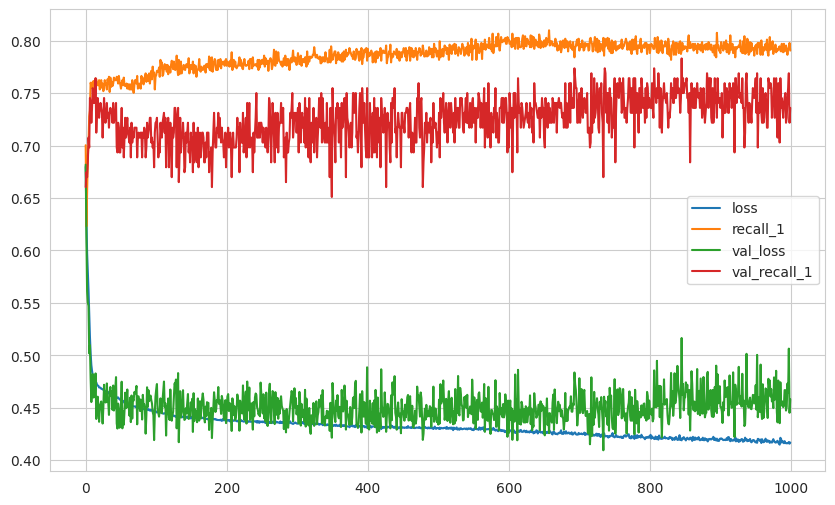

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [49]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2416
           1       0.48      0.75      0.58       584

    accuracy                           0.79      3000
   macro avg       0.70      0.78      0.72      3000
weighted avg       0.84      0.79      0.81      3000



In [51]:
print(confusion_matrix(y_test, y_pred))

[[1943  473]
 [ 148  436]]


94/94 [==============================] - 0s 3ms/step


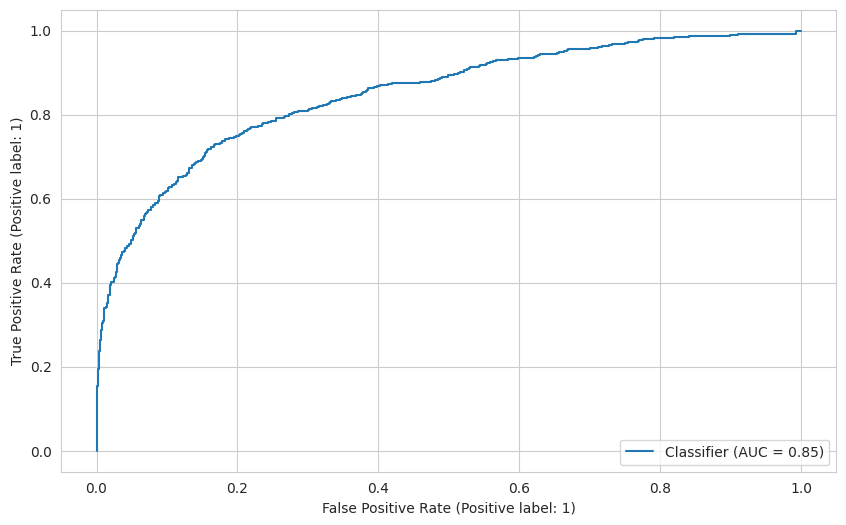

In [52]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [53]:
roc_auc_score(y_test, y_pred_proba)

0.8489132098793433

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [54]:
from tensorflow.keras.optimizers import Adam

In [55]:
model = Sequential(
    [
        Input(shape=X_train.shape[1]),#input layer
        Dense(units=7, activation="relu"),#first hidden layer
        Dense(units=7, activation="relu"),#second hidden layer
        Dense(units=7, activation="relu"),#third hidden layer
        Dense(units=1, activation='sigmoid'),#output layer
    ]
)
opt = Adam(learning_rate=0.01)#learning_rate=0.005
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

In [56]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=1000 ,class_weight=class_weight_dict)

Epoch 1/1000
186/186 [==============================] - 2s 4ms/step - loss: 0.6007 - recall_2: 0.7051 - val_loss: 0.5675 - val_recall_2: 0.7642
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5237 - recall_2: 0.7591 - val_loss: 0.4967 - val_recall_2: 0.7453
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5003 - recall_2: 0.7631 - val_loss: 0.4908 - val_recall_2: 0.7406
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4925 - recall_2: 0.7341 - val_loss: 0.4840 - val_recall_2: 0.7264
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4836 - recall_2: 0.7381 - val_loss: 0.3901 - val_recall_2: 0.5991
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4818 - recall_2: 0.7228 - val_loss: 0.4585 - val_recall_2: 0.6651
Epoch 7/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.4806 - recall_2: 0.7301 - val_loss: 0.4054 - val_recall_2:

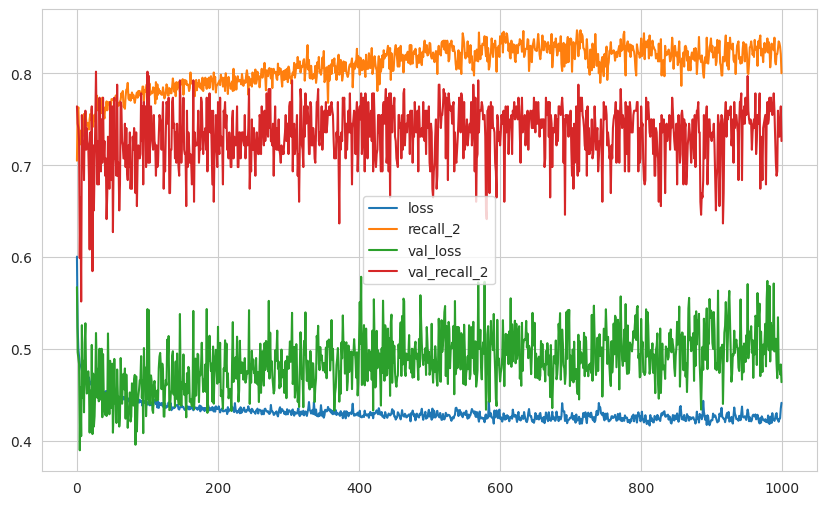

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [58]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.77      0.85      2416
           1       0.45      0.77      0.57       584

    accuracy                           0.77      3000
   macro avg       0.69      0.77      0.71      3000
weighted avg       0.84      0.77      0.79      3000



In [60]:
print(confusion_matrix(y_test, y_pred))

[[1869  547]
 [ 135  449]]


94/94 [==============================] - 0s 1ms/step


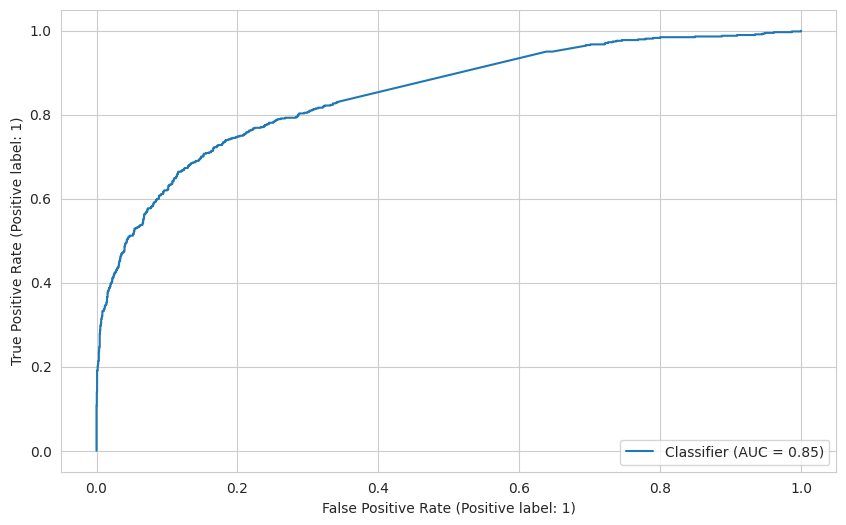

In [61]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [62]:
roc_auc_score(y_test, y_pred_proba)

0.8490251916447428

### Add Dropout Layer

In [63]:
#The dropout function is used to prevent overfitting.
from tensorflow.keras.layers import Dropout

In [64]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))#Dropout(0.5)

model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

In [65]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=1000 ,class_weight=class_weight_dict)

Epoch 1/1000
186/186 [==============================] - 4s 7ms/step - loss: 0.6831 - recall_3: 0.6616 - val_loss: 0.6326 - val_recall_3: 0.6651
Epoch 2/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.6365 - recall_3: 0.6600 - val_loss: 0.5431 - val_recall_3: 0.5472
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.6100 - recall_3: 0.7043 - val_loss: 0.5328 - val_recall_3: 0.6604
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.6001 - recall_3: 0.6833 - val_loss: 0.5225 - val_recall_3: 0.6557
Epoch 5/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5911 - recall_3: 0.6454 - val_loss: 0.5585 - val_recall_3: 0.7075
Epoch 6/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5875 - recall_3: 0.6535 - val_loss: 0.5438 - val_recall_3: 0.6887
Epoch 7/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5816 - recall_3: 0.6648 - val_loss: 0.5417 - val_recall_3:

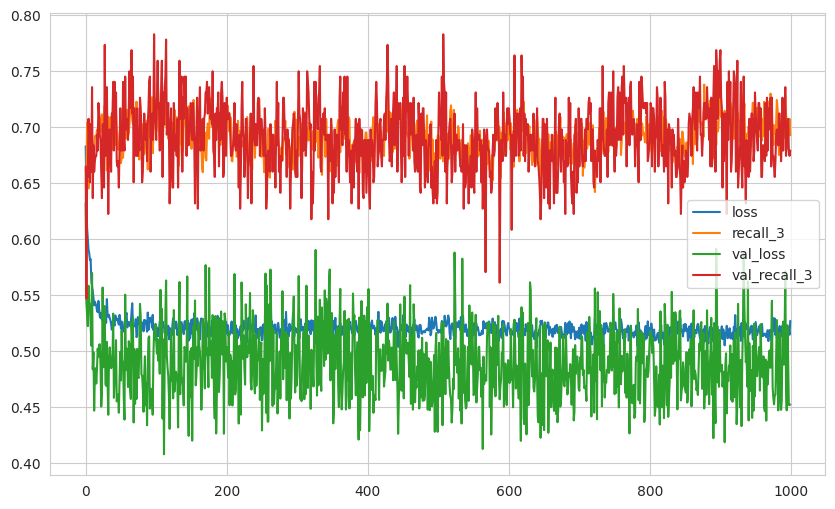

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [67]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2416
           1       0.51      0.71      0.60       584

    accuracy                           0.81      3000
   macro avg       0.72      0.77      0.74      3000
weighted avg       0.84      0.81      0.82      3000



In [69]:
print(confusion_matrix(y_test, y_pred))

[[2027  389]
 [ 171  413]]


94/94 [==============================] - 0s 2ms/step


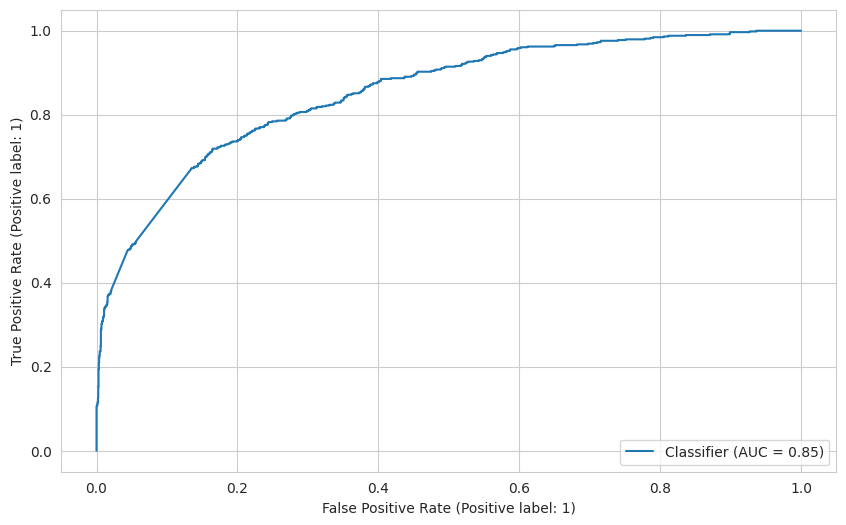

In [70]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [71]:
roc_auc_score(y_test, y_pred_proba)

0.8523612560101606

### Add Early Stop
Early stopping is used to stop the Neural Network if there is no significant improvement in the model’s accuracy.

#### Monitor the "val_loss" as metric

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

In [73]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))#Dropout(0.5)

model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

In [74]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

In [75]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32,epochs=1000 ,class_weight=class_weight_dict,verbose=1,
    callbacks=[early_stop],)

Epoch 1/1000
186/186 [==============================] - 3s 4ms/step - loss: 0.6433 - recall_4: 0.6656 - val_loss: 0.5446 - val_recall_4: 0.7358
Epoch 2/1000
186/186 [==============================] - 1s 4ms/step - loss: 0.6053 - recall_4: 0.7027 - val_loss: 0.5707 - val_recall_4: 0.7689
Epoch 3/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5739 - recall_4: 0.7188 - val_loss: 0.5134 - val_recall_4: 0.7123
Epoch 4/1000
186/186 [==============================] - 1s 3ms/step - loss: 0.5648 - recall_4: 0.6930 - val_loss: 0.5363 - val_recall_4: 0.8019
Epoch 5/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5391 - recall_4: 0.7317 - val_loss: 0.4733 - val_recall_4: 0.7311
Epoch 6/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5402 - recall_4: 0.7188 - val_loss: 0.4076 - val_recall_4: 0.6509
Epoch 7/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5445 - recall_4: 0.7051 - val_loss: 0.4659 - val_recall_4:

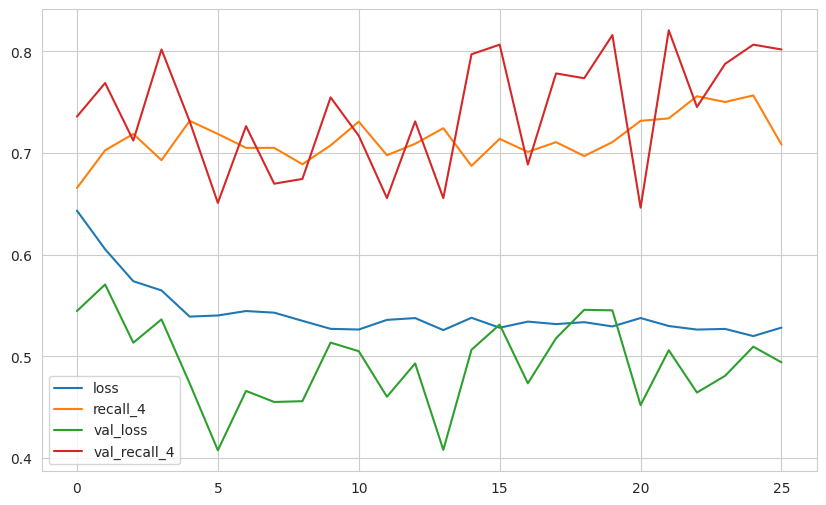

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [77]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 1ms/step


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2416
           1       0.54      0.68      0.60       584

    accuracy                           0.83      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.84      0.83      0.83      3000



94/94 [==============================] - 0s 2ms/step


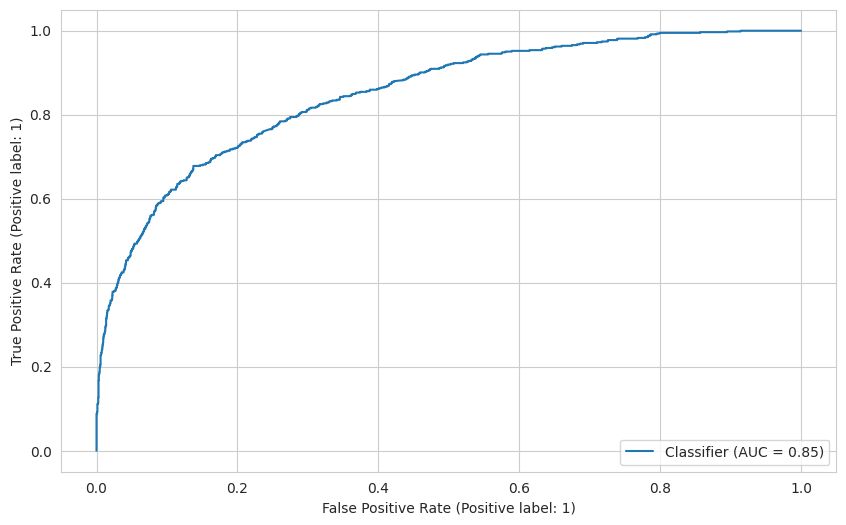

In [79]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [80]:
roc_auc_score(y_test, y_pred_proba)

0.8500475568130272

#### Monitor the "val_recall" as metric

In [81]:
model = Sequential()

model.add(Dense(7, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))#Dropout(0.5)

model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(7, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall()])

In [82]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=20, restore_best_weights=True
)

In [83]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=1000 ,class_weight=class_weight_dict,verbose=1,
    callbacks=[early_stop],)

Epoch 1/1000
184/186 [============================>.] - ETA: 0s - loss: 0.6394 - recall_5: 0.6150

186/186 [==============================] - 5s 13ms/step - loss: 0.6383 - recall_5: 0.6189 - val_loss: 0.5156 - val_recall_5: 0.6887
Epoch 2/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5625 - recall_5: 0.6669

186/186 [==============================] - 2s 10ms/step - loss: 0.5608 - recall_5: 0.6680 - val_loss: 0.4654 - val_recall_5: 0.7264
Epoch 3/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5623 - recall_5: 0.6796

186/186 [==============================] - 1s 6ms/step - loss: 0.5626 - recall_5: 0.6745 - val_loss: 0.5041 - val_recall_5: 0.7358
Epoch 4/1000
186/186 [==============================] - ETA: 0s - loss: 0.5559 - recall_5: 0.6543

186/186 [==============================] - 1s 7ms/step - loss: 0.5559 - recall_5: 0.6543 - val_loss: 0.5180 - val_recall_5: 0.7311
Epoch 5/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5542 - recall_5: 0.6471

186/186 [==============================] - 1s 7ms/step - loss: 0.5499 - recall_5: 0.6527 - val_loss: 0.4504 - val_recall_5: 0.6792
Epoch 6/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5400 - recall_5: 0.6650

186/186 [==============================] - 1s 3ms/step - loss: 0.5396 - recall_5: 0.6664 - val_loss: 0.5077 - val_recall_5: 0.7075
Epoch 7/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5443 - recall_5: 0.6715

186/186 [==============================] - 1s 3ms/step - loss: 0.5442 - recall_5: 0.6728 - val_loss: 0.5016 - val_recall_5: 0.7075
Epoch 8/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5234 - recall_5: 0.6834

186/186 [==============================] - 1s 3ms/step - loss: 0.5314 - recall_5: 0.6785 - val_loss: 0.5206 - val_recall_5: 0.7594
Epoch 9/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5437 - recall_5: 0.7185

186/186 [==============================] - 1s 3ms/step - loss: 0.5395 - recall_5: 0.7147 - val_loss: 0.5126 - val_recall_5: 0.7406
Epoch 10/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5266 - recall_5: 0.6936

186/186 [==============================] - 1s 3ms/step - loss: 0.5274 - recall_5: 0.6922 - val_loss: 0.4619 - val_recall_5: 0.6415
Epoch 11/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5368 - recall_5: 0.6819

186/186 [==============================] - 1s 3ms/step - loss: 0.5345 - recall_5: 0.6849 - val_loss: 0.5029 - val_recall_5: 0.7406
Epoch 12/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5325 - recall_5: 0.6681

186/186 [==============================] - 1s 3ms/step - loss: 0.5293 - recall_5: 0.6753 - val_loss: 0.4694 - val_recall_5: 0.6698
Epoch 13/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5267 - recall_5: 0.6821

186/186 [==============================] - 1s 3ms/step - loss: 0.5282 - recall_5: 0.6769 - val_loss: 0.4882 - val_recall_5: 0.7783
Epoch 14/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5232 - recall_5: 0.7028

186/186 [==============================] - 1s 3ms/step - loss: 0.5218 - recall_5: 0.7043 - val_loss: 0.4558 - val_recall_5: 0.7358
Epoch 15/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5264 - recall_5: 0.7103

186/186 [==============================] - 1s 3ms/step - loss: 0.5288 - recall_5: 0.7059 - val_loss: 0.4516 - val_recall_5: 0.6887
Epoch 16/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5302 - recall_5: 0.7140

186/186 [==============================] - 1s 3ms/step - loss: 0.5279 - recall_5: 0.7123 - val_loss: 0.4239 - val_recall_5: 0.6792
Epoch 17/1000
186/186 [==============================] - ETA: 0s - loss: 0.5250 - recall_5: 0.7019

186/186 [==============================] - 1s 5ms/step - loss: 0.5250 - recall_5: 0.7019 - val_loss: 0.4402 - val_recall_5: 0.6887
Epoch 18/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5215 - recall_5: 0.6970

186/186 [==============================] - 1s 5ms/step - loss: 0.5224 - recall_5: 0.6978 - val_loss: 0.5708 - val_recall_5: 0.8066
Epoch 19/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5282 - recall_5: 0.7219

186/186 [==============================] - 1s 5ms/step - loss: 0.5254 - recall_5: 0.7228 - val_loss: 0.4653 - val_recall_5: 0.7500
Epoch 20/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5226 - recall_5: 0.7082

186/186 [==============================] - 1s 3ms/step - loss: 0.5212 - recall_5: 0.7123 - val_loss: 0.4613 - val_recall_5: 0.7642
Epoch 21/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5270 - recall_5: 0.7131

186/186 [==============================] - 1s 3ms/step - loss: 0.5267 - recall_5: 0.7172 - val_loss: 0.5030 - val_recall_5: 0.7594
Epoch 22/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5163 - recall_5: 0.7208

186/186 [==============================] - 1s 3ms/step - loss: 0.5150 - recall_5: 0.7260 - val_loss: 0.4670 - val_recall_5: 0.7642
Epoch 23/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5208 - recall_5: 0.7266

186/186 [==============================] - 1s 3ms/step - loss: 0.5208 - recall_5: 0.7268 - val_loss: 0.4541 - val_recall_5: 0.7170
Epoch 24/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5110 - recall_5: 0.7306

186/186 [==============================] - 1s 3ms/step - loss: 0.5131 - recall_5: 0.7180 - val_loss: 0.4316 - val_recall_5: 0.6792
Epoch 25/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5308 - recall_5: 0.7124

186/186 [==============================] - 1s 3ms/step - loss: 0.5308 - recall_5: 0.7115 - val_loss: 0.4667 - val_recall_5: 0.7689
Epoch 26/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5187 - recall_5: 0.7375

186/186 [==============================] - 1s 3ms/step - loss: 0.5185 - recall_5: 0.7341 - val_loss: 0.4852 - val_recall_5: 0.7453
Epoch 27/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5178 - recall_5: 0.7030

186/186 [==============================] - 1s 3ms/step - loss: 0.5184 - recall_5: 0.7051 - val_loss: 0.4629 - val_recall_5: 0.6840
Epoch 28/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5203 - recall_5: 0.6874

186/186 [==============================] - 1s 3ms/step - loss: 0.5220 - recall_5: 0.6882 - val_loss: 0.4633 - val_recall_5: 0.7453
Epoch 29/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5260 - recall_5: 0.6930

186/186 [==============================] - 1s 3ms/step - loss: 0.5221 - recall_5: 0.6954 - val_loss: 0.4748 - val_recall_5: 0.7264
Epoch 30/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5281 - recall_5: 0.6964

186/186 [==============================] - 1s 3ms/step - loss: 0.5248 - recall_5: 0.6970 - val_loss: 0.4602 - val_recall_5: 0.7453
Epoch 31/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5342 - recall_5: 0.6795

186/186 [==============================] - 1s 3ms/step - loss: 0.5308 - recall_5: 0.6785 - val_loss: 0.4687 - val_recall_5: 0.7406
Epoch 32/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5208 - recall_5: 0.6879

186/186 [==============================] - 1s 3ms/step - loss: 0.5242 - recall_5: 0.6833 - val_loss: 0.4821 - val_recall_5: 0.7358
Epoch 33/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5227 - recall_5: 0.6833

186/186 [==============================] - 1s 3ms/step - loss: 0.5243 - recall_5: 0.6841 - val_loss: 0.4484 - val_recall_5: 0.7028
Epoch 34/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5242 - recall_5: 0.6838

186/186 [==============================] - 1s 3ms/step - loss: 0.5208 - recall_5: 0.6890 - val_loss: 0.4601 - val_recall_5: 0.6792
Epoch 35/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5235 - recall_5: 0.6844

186/186 [==============================] - 1s 3ms/step - loss: 0.5182 - recall_5: 0.6930 - val_loss: 0.4562 - val_recall_5: 0.6745
Epoch 36/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5265 - recall_5: 0.6878

186/186 [==============================] - 1s 4ms/step - loss: 0.5230 - recall_5: 0.6914 - val_loss: 0.4509 - val_recall_5: 0.6604
Epoch 37/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5166 - recall_5: 0.6738

186/186 [==============================] - 1s 5ms/step - loss: 0.5169 - recall_5: 0.6728 - val_loss: 0.4340 - val_recall_5: 0.6509
Epoch 38/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5176 - recall_5: 0.6802

186/186 [==============================] - 1s 5ms/step - loss: 0.5188 - recall_5: 0.6793 - val_loss: 0.4787 - val_recall_5: 0.6840
Epoch 39/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5183 - recall_5: 0.7272

186/186 [==============================] - 1s 4ms/step - loss: 0.5187 - recall_5: 0.7220 - val_loss: 0.4694 - val_recall_5: 0.7123
Epoch 40/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5195 - recall_5: 0.6916

186/186 [==============================] - 1s 3ms/step - loss: 0.5233 - recall_5: 0.6865 - val_loss: 0.4510 - val_recall_5: 0.6509
Epoch 41/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5147 - recall_5: 0.6841

186/186 [==============================] - 1s 3ms/step - loss: 0.5164 - recall_5: 0.6882 - val_loss: 0.4840 - val_recall_5: 0.8019
Epoch 42/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5178 - recall_5: 0.6961

186/186 [==============================] - 1s 4ms/step - loss: 0.5206 - recall_5: 0.6906 - val_loss: 0.4715 - val_recall_5: 0.6981
Epoch 43/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5162 - recall_5: 0.7116

186/186 [==============================] - 1s 3ms/step - loss: 0.5166 - recall_5: 0.7147 - val_loss: 0.4896 - val_recall_5: 0.7594
Epoch 44/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5164 - recall_5: 0.7402

186/186 [==============================] - 1s 3ms/step - loss: 0.5141 - recall_5: 0.7413 - val_loss: 0.4149 - val_recall_5: 0.6698
Epoch 45/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5263 - recall_5: 0.7618

186/186 [==============================] - 1s 3ms/step - loss: 0.5230 - recall_5: 0.7615 - val_loss: 0.4596 - val_recall_5: 0.6604
Epoch 46/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5138 - recall_5: 0.7042

186/186 [==============================] - 1s 3ms/step - loss: 0.5151 - recall_5: 0.7010 - val_loss: 0.4220 - val_recall_5: 0.6651
Epoch 47/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5206 - recall_5: 0.7218

186/186 [==============================] - 1s 3ms/step - loss: 0.5162 - recall_5: 0.7220 - val_loss: 0.4483 - val_recall_5: 0.7075
Epoch 48/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5137 - recall_5: 0.6854

186/186 [==============================] - 1s 3ms/step - loss: 0.5145 - recall_5: 0.6873 - val_loss: 0.5038 - val_recall_5: 0.7972
Epoch 49/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5233 - recall_5: 0.6985

186/186 [==============================] - 1s 3ms/step - loss: 0.5213 - recall_5: 0.7002 - val_loss: 0.4430 - val_recall_5: 0.7075
Epoch 50/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5180 - recall_5: 0.6955

186/186 [==============================] - 1s 3ms/step - loss: 0.5178 - recall_5: 0.6978 - val_loss: 0.4751 - val_recall_5: 0.6840
Epoch 51/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5191 - recall_5: 0.7155

186/186 [==============================] - 1s 3ms/step - loss: 0.5178 - recall_5: 0.7156 - val_loss: 0.4464 - val_recall_5: 0.7311
Epoch 52/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5311 - recall_5: 0.6678

186/186 [==============================] - 1s 3ms/step - loss: 0.5299 - recall_5: 0.6656 - val_loss: 0.4348 - val_recall_5: 0.6745
Epoch 53/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5152 - recall_5: 0.7115

186/186 [==============================] - 1s 3ms/step - loss: 0.5125 - recall_5: 0.7180 - val_loss: 0.4438 - val_recall_5: 0.7123
Epoch 54/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5226 - recall_5: 0.7096

186/186 [==============================] - 1s 3ms/step - loss: 0.5213 - recall_5: 0.7083 - val_loss: 0.4483 - val_recall_5: 0.7170
Epoch 55/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5078 - recall_5: 0.7449

186/186 [==============================] - 1s 3ms/step - loss: 0.5088 - recall_5: 0.7397 - val_loss: 0.5073 - val_recall_5: 0.8255
Epoch 56/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5149 - recall_5: 0.6892

186/186 [==============================] - 1s 5ms/step - loss: 0.5140 - recall_5: 0.6906 - val_loss: 0.4421 - val_recall_5: 0.7500
Epoch 57/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5227 - recall_5: 0.7150

186/186 [==============================] - 1s 5ms/step - loss: 0.5221 - recall_5: 0.7156 - val_loss: 0.4979 - val_recall_5: 0.7500
Epoch 58/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5175 - recall_5: 0.7203

186/186 [==============================] - 1s 5ms/step - loss: 0.5165 - recall_5: 0.7196 - val_loss: 0.4469 - val_recall_5: 0.6981
Epoch 59/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5146 - recall_5: 0.6858

186/186 [==============================] - 1s 3ms/step - loss: 0.5152 - recall_5: 0.6833 - val_loss: 0.4734 - val_recall_5: 0.6887
Epoch 60/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5134 - recall_5: 0.6768

186/186 [==============================] - 1s 3ms/step - loss: 0.5135 - recall_5: 0.6785 - val_loss: 0.4824 - val_recall_5: 0.7028
Epoch 61/1000
186/186 [==============================] - ETA: 0s - loss: 0.5167 - recall_5: 0.6986

186/186 [==============================] - 1s 3ms/step - loss: 0.5167 - recall_5: 0.6986 - val_loss: 0.4355 - val_recall_5: 0.7028
Epoch 62/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5203 - recall_5: 0.6926

186/186 [==============================] - 1s 3ms/step - loss: 0.5217 - recall_5: 0.6906 - val_loss: 0.4727 - val_recall_5: 0.7453
Epoch 63/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5166 - recall_5: 0.7294

186/186 [==============================] - 1s 3ms/step - loss: 0.5160 - recall_5: 0.7276 - val_loss: 0.4600 - val_recall_5: 0.7736
Epoch 64/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5096 - recall_5: 0.7014

186/186 [==============================] - 1s 3ms/step - loss: 0.5118 - recall_5: 0.7019 - val_loss: 0.4444 - val_recall_5: 0.7028
Epoch 65/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5221 - recall_5: 0.6661

186/186 [==============================] - 1s 3ms/step - loss: 0.5233 - recall_5: 0.6720 - val_loss: 0.4857 - val_recall_5: 0.7594
Epoch 66/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5213 - recall_5: 0.6926

186/186 [==============================] - 1s 3ms/step - loss: 0.5168 - recall_5: 0.6954 - val_loss: 0.4978 - val_recall_5: 0.7358
Epoch 67/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5127 - recall_5: 0.6803

186/186 [==============================] - 1s 3ms/step - loss: 0.5157 - recall_5: 0.6777 - val_loss: 0.5069 - val_recall_5: 0.7075
Epoch 68/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5201 - recall_5: 0.6794

186/186 [==============================] - 1s 3ms/step - loss: 0.5227 - recall_5: 0.6817 - val_loss: 0.4947 - val_recall_5: 0.7217
Epoch 69/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5206 - recall_5: 0.6494

186/186 [==============================] - 1s 3ms/step - loss: 0.5210 - recall_5: 0.6575 - val_loss: 0.5397 - val_recall_5: 0.8113
Epoch 70/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5231 - recall_5: 0.6931

186/186 [==============================] - 1s 3ms/step - loss: 0.5197 - recall_5: 0.6865 - val_loss: 0.4596 - val_recall_5: 0.7075
Epoch 71/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5234 - recall_5: 0.6878

186/186 [==============================] - 1s 3ms/step - loss: 0.5194 - recall_5: 0.6914 - val_loss: 0.4488 - val_recall_5: 0.6981
Epoch 72/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5288 - recall_5: 0.6886

186/186 [==============================] - 1s 3ms/step - loss: 0.5251 - recall_5: 0.6922 - val_loss: 0.4704 - val_recall_5: 0.7594
Epoch 73/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.7093

186/186 [==============================] - 1s 3ms/step - loss: 0.5160 - recall_5: 0.7083 - val_loss: 0.4372 - val_recall_5: 0.6981
Epoch 74/1000
186/186 [==============================] - ETA: 0s - loss: 0.5128 - recall_5: 0.7091

186/186 [==============================] - 1s 3ms/step - loss: 0.5128 - recall_5: 0.7091 - val_loss: 0.4982 - val_recall_5: 0.7500
Epoch 75/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5156 - recall_5: 0.7068

186/186 [==============================] - 1s 4ms/step - loss: 0.5155 - recall_5: 0.7059 - val_loss: 0.4917 - val_recall_5: 0.7406
Epoch 76/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5129 - recall_5: 0.7060

186/186 [==============================] - 1s 5ms/step - loss: 0.5108 - recall_5: 0.7083 - val_loss: 0.4895 - val_recall_5: 0.7217
Epoch 77/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5125 - recall_5: 0.7193

186/186 [==============================] - 1s 5ms/step - loss: 0.5131 - recall_5: 0.7228 - val_loss: 0.4533 - val_recall_5: 0.8066
Epoch 78/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5197 - recall_5: 0.6858

186/186 [==============================] - 1s 3ms/step - loss: 0.5178 - recall_5: 0.6857 - val_loss: 0.4319 - val_recall_5: 0.7642
Epoch 79/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5097 - recall_5: 0.6995

186/186 [==============================] - 1s 3ms/step - loss: 0.5113 - recall_5: 0.6986 - val_loss: 0.4787 - val_recall_5: 0.8208
Epoch 80/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5219 - recall_5: 0.7358

186/186 [==============================] - 1s 3ms/step - loss: 0.5189 - recall_5: 0.7389 - val_loss: 0.4507 - val_recall_5: 0.7736
Epoch 81/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5333 - recall_5: 0.7043

186/186 [==============================] - 1s 3ms/step - loss: 0.5293 - recall_5: 0.7107 - val_loss: 0.4774 - val_recall_5: 0.7877
Epoch 82/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5173 - recall_5: 0.7373

186/186 [==============================] - 1s 3ms/step - loss: 0.5186 - recall_5: 0.7301 - val_loss: 0.4798 - val_recall_5: 0.7500
Epoch 83/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5195 - recall_5: 0.7468

186/186 [==============================] - 1s 3ms/step - loss: 0.5190 - recall_5: 0.7502 - val_loss: 0.5056 - val_recall_5: 0.8491
Epoch 84/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5225 - recall_5: 0.7705

186/186 [==============================] - 1s 3ms/step - loss: 0.5213 - recall_5: 0.7679 - val_loss: 0.4406 - val_recall_5: 0.8066
Epoch 85/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5174 - recall_5: 0.7582

186/186 [==============================] - 1s 3ms/step - loss: 0.5195 - recall_5: 0.7558 - val_loss: 0.4523 - val_recall_5: 0.7783
Epoch 86/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5186 - recall_5: 0.7185

186/186 [==============================] - 1s 3ms/step - loss: 0.5166 - recall_5: 0.7212 - val_loss: 0.4578 - val_recall_5: 0.7028
Epoch 87/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5161 - recall_5: 0.7534

186/186 [==============================] - 1s 3ms/step - loss: 0.5156 - recall_5: 0.7534 - val_loss: 0.4911 - val_recall_5: 0.7453
Epoch 88/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5218 - recall_5: 0.7118

186/186 [==============================] - 1s 3ms/step - loss: 0.5205 - recall_5: 0.7147 - val_loss: 0.4726 - val_recall_5: 0.8491
Epoch 89/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5197 - recall_5: 0.7496

186/186 [==============================] - 1s 3ms/step - loss: 0.5190 - recall_5: 0.7502 - val_loss: 0.4742 - val_recall_5: 0.8302
Epoch 90/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5121 - recall_5: 0.7419

186/186 [==============================] - 1s 3ms/step - loss: 0.5119 - recall_5: 0.7421 - val_loss: 0.4684 - val_recall_5: 0.8302
Epoch 91/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5095 - recall_5: 0.7780

186/186 [==============================] - 1s 3ms/step - loss: 0.5085 - recall_5: 0.7792 - val_loss: 0.4428 - val_recall_5: 0.7642
Epoch 92/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5202 - recall_5: 0.7146

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.7164 - val_loss: 0.5009 - val_recall_5: 0.7406
Epoch 93/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5032 - recall_5: 0.7028

186/186 [==============================] - 1s 3ms/step - loss: 0.5060 - recall_5: 0.7067 - val_loss: 0.4844 - val_recall_5: 0.7264
Epoch 94/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5142 - recall_5: 0.7024

186/186 [==============================] - 1s 4ms/step - loss: 0.5141 - recall_5: 0.7027 - val_loss: 0.4990 - val_recall_5: 0.7500
Epoch 95/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5196 - recall_5: 0.6936

186/186 [==============================] - 1s 5ms/step - loss: 0.5169 - recall_5: 0.6938 - val_loss: 0.4444 - val_recall_5: 0.7217
Epoch 96/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5097 - recall_5: 0.7181

186/186 [==============================] - 1s 5ms/step - loss: 0.5095 - recall_5: 0.7188 - val_loss: 0.4651 - val_recall_5: 0.7028
Epoch 97/1000
186/186 [==============================] - ETA: 0s - loss: 0.5127 - recall_5: 0.6938

186/186 [==============================] - 1s 4ms/step - loss: 0.5127 - recall_5: 0.6938 - val_loss: 0.4391 - val_recall_5: 0.6604
Epoch 98/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5087 - recall_5: 0.7674

186/186 [==============================] - 1s 3ms/step - loss: 0.5108 - recall_5: 0.7679 - val_loss: 0.5052 - val_recall_5: 0.7453
Epoch 99/1000
167/186 [=========================>....] - ETA: 0s - loss: 0.5108 - recall_5: 0.7272

186/186 [==============================] - 1s 3ms/step - loss: 0.5162 - recall_5: 0.7284 - val_loss: 0.5207 - val_recall_5: 0.8302
Epoch 100/1000
186/186 [==============================] - ETA: 0s - loss: 0.5206 - recall_5: 0.7196

186/186 [==============================] - 1s 3ms/step - loss: 0.5206 - recall_5: 0.7196 - val_loss: 0.4846 - val_recall_5: 0.6981
Epoch 101/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5175 - recall_5: 0.6744

186/186 [==============================] - 1s 3ms/step - loss: 0.5181 - recall_5: 0.6769 - val_loss: 0.4588 - val_recall_5: 0.6745
Epoch 102/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5221 - recall_5: 0.6852

186/186 [==============================] - 1s 3ms/step - loss: 0.5215 - recall_5: 0.6865 - val_loss: 0.4553 - val_recall_5: 0.6792
Epoch 103/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5098 - recall_5: 0.6993

186/186 [==============================] - 1s 3ms/step - loss: 0.5089 - recall_5: 0.6978 - val_loss: 0.4752 - val_recall_5: 0.7358
Epoch 104/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.7066

186/186 [==============================] - 1s 3ms/step - loss: 0.5151 - recall_5: 0.7067 - val_loss: 0.4515 - val_recall_5: 0.7406
Epoch 105/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5154 - recall_5: 0.6930

186/186 [==============================] - 1s 3ms/step - loss: 0.5181 - recall_5: 0.6873 - val_loss: 0.4907 - val_recall_5: 0.7358
Epoch 106/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5182 - recall_5: 0.6917

186/186 [==============================] - 1s 3ms/step - loss: 0.5172 - recall_5: 0.6906 - val_loss: 0.4983 - val_recall_5: 0.8255
Epoch 107/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5101 - recall_5: 0.7608

186/186 [==============================] - 1s 3ms/step - loss: 0.5100 - recall_5: 0.7599 - val_loss: 0.4417 - val_recall_5: 0.7877
Epoch 108/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5080 - recall_5: 0.7830

186/186 [==============================] - 1s 3ms/step - loss: 0.5104 - recall_5: 0.7792 - val_loss: 0.5185 - val_recall_5: 0.7925
Epoch 109/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5106 - recall_5: 0.7810

186/186 [==============================] - 1s 3ms/step - loss: 0.5076 - recall_5: 0.7792 - val_loss: 0.4479 - val_recall_5: 0.7877
Epoch 110/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5200 - recall_5: 0.6963

186/186 [==============================] - 1s 3ms/step - loss: 0.5192 - recall_5: 0.6954 - val_loss: 0.4582 - val_recall_5: 0.7075
Epoch 111/1000
167/186 [=========================>....] - ETA: 0s - loss: 0.5067 - recall_5: 0.6923

186/186 [==============================] - 1s 3ms/step - loss: 0.5105 - recall_5: 0.6873 - val_loss: 0.4919 - val_recall_5: 0.7170
Epoch 112/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5143 - recall_5: 0.6972

186/186 [==============================] - 1s 3ms/step - loss: 0.5158 - recall_5: 0.6962 - val_loss: 0.5196 - val_recall_5: 0.7075
Epoch 113/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5142 - recall_5: 0.6768

186/186 [==============================] - 1s 4ms/step - loss: 0.5135 - recall_5: 0.6801 - val_loss: 0.4840 - val_recall_5: 0.7075
Epoch 114/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5164 - recall_5: 0.6621

186/186 [==============================] - 1s 5ms/step - loss: 0.5159 - recall_5: 0.6608 - val_loss: 0.4462 - val_recall_5: 0.6981
Epoch 115/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5247 - recall_5: 0.7010

186/186 [==============================] - 1s 5ms/step - loss: 0.5249 - recall_5: 0.7010 - val_loss: 0.4803 - val_recall_5: 0.7406
Epoch 116/1000
186/186 [==============================] - ETA: 0s - loss: 0.5122 - recall_5: 0.7438

186/186 [==============================] - 1s 5ms/step - loss: 0.5122 - recall_5: 0.7438 - val_loss: 0.4354 - val_recall_5: 0.7500
Epoch 117/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5215 - recall_5: 0.7777

186/186 [==============================] - 1s 3ms/step - loss: 0.5212 - recall_5: 0.7776 - val_loss: 0.5025 - val_recall_5: 0.8443
Epoch 118/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5229 - recall_5: 0.7227

186/186 [==============================] - 1s 3ms/step - loss: 0.5208 - recall_5: 0.7180 - val_loss: 0.4719 - val_recall_5: 0.6840
Epoch 119/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5170 - recall_5: 0.6878

186/186 [==============================] - 1s 3ms/step - loss: 0.5155 - recall_5: 0.6857 - val_loss: 0.4408 - val_recall_5: 0.6132
Epoch 120/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5167 - recall_5: 0.6786

186/186 [==============================] - 1s 3ms/step - loss: 0.5165 - recall_5: 0.6906 - val_loss: 0.4802 - val_recall_5: 0.8396
Epoch 121/1000
186/186 [==============================] - ETA: 0s - loss: 0.5074 - recall_5: 0.7389

186/186 [==============================] - 1s 3ms/step - loss: 0.5074 - recall_5: 0.7389 - val_loss: 0.4684 - val_recall_5: 0.7028
Epoch 122/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5251 - recall_5: 0.7986

186/186 [==============================] - 1s 3ms/step - loss: 0.5237 - recall_5: 0.7897 - val_loss: 0.4455 - val_recall_5: 0.6557
Epoch 123/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5170 - recall_5: 0.6765

186/186 [==============================] - 1s 3ms/step - loss: 0.5178 - recall_5: 0.6777 - val_loss: 0.5050 - val_recall_5: 0.7972
Epoch 124/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5251 - recall_5: 0.7095

186/186 [==============================] - 1s 3ms/step - loss: 0.5247 - recall_5: 0.7156 - val_loss: 0.5007 - val_recall_5: 0.7783
Epoch 125/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5133 - recall_5: 0.7605

186/186 [==============================] - 1s 3ms/step - loss: 0.5098 - recall_5: 0.7591 - val_loss: 0.4797 - val_recall_5: 0.7028
Epoch 126/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5166 - recall_5: 0.6569

186/186 [==============================] - 1s 4ms/step - loss: 0.5150 - recall_5: 0.6656 - val_loss: 0.4935 - val_recall_5: 0.7594
Epoch 127/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5242 - recall_5: 0.6730

186/186 [==============================] - 1s 3ms/step - loss: 0.5229 - recall_5: 0.6793 - val_loss: 0.4833 - val_recall_5: 0.6745
Epoch 128/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5204 - recall_5: 0.7487

186/186 [==============================] - 1s 3ms/step - loss: 0.5182 - recall_5: 0.7470 - val_loss: 0.4536 - val_recall_5: 0.7500
Epoch 129/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5193 - recall_5: 0.7509

186/186 [==============================] - 1s 3ms/step - loss: 0.5199 - recall_5: 0.7518 - val_loss: 0.4801 - val_recall_5: 0.7406
Epoch 130/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5071 - recall_5: 0.6947

186/186 [==============================] - 1s 3ms/step - loss: 0.5053 - recall_5: 0.7002 - val_loss: 0.4354 - val_recall_5: 0.7594
Epoch 131/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5142 - recall_5: 0.7222

186/186 [==============================] - 1s 3ms/step - loss: 0.5150 - recall_5: 0.7268 - val_loss: 0.4951 - val_recall_5: 0.8585
Epoch 132/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5185 - recall_5: 0.7533

186/186 [==============================] - 1s 3ms/step - loss: 0.5169 - recall_5: 0.7575 - val_loss: 0.4584 - val_recall_5: 0.7736
Epoch 133/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5167 - recall_5: 0.7252

186/186 [==============================] - 1s 5ms/step - loss: 0.5171 - recall_5: 0.7260 - val_loss: 0.4729 - val_recall_5: 0.8538
Epoch 134/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5177 - recall_5: 0.6802

186/186 [==============================] - 1s 5ms/step - loss: 0.5193 - recall_5: 0.6777 - val_loss: 0.4609 - val_recall_5: 0.6840
Epoch 135/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5097 - recall_5: 0.7296

186/186 [==============================] - 1s 5ms/step - loss: 0.5108 - recall_5: 0.7293 - val_loss: 0.4623 - val_recall_5: 0.6840
Epoch 136/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5220 - recall_5: 0.6551

186/186 [==============================] - 1s 4ms/step - loss: 0.5209 - recall_5: 0.6543 - val_loss: 0.5060 - val_recall_5: 0.6651
Epoch 137/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5123 - recall_5: 0.6793

186/186 [==============================] - 1s 3ms/step - loss: 0.5082 - recall_5: 0.6938 - val_loss: 0.4779 - val_recall_5: 0.7358
Epoch 138/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5107 - recall_5: 0.6754

186/186 [==============================] - 1s 3ms/step - loss: 0.5125 - recall_5: 0.6817 - val_loss: 0.5149 - val_recall_5: 0.8538
Epoch 139/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5157 - recall_5: 0.7130

186/186 [==============================] - 1s 3ms/step - loss: 0.5166 - recall_5: 0.7075 - val_loss: 0.5271 - val_recall_5: 0.6462
Epoch 140/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5158 - recall_5: 0.6841

186/186 [==============================] - 1s 3ms/step - loss: 0.5138 - recall_5: 0.6898 - val_loss: 0.4482 - val_recall_5: 0.6274
Epoch 141/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5154 - recall_5: 0.7636

186/186 [==============================] - 1s 3ms/step - loss: 0.5145 - recall_5: 0.7647 - val_loss: 0.4319 - val_recall_5: 0.7264
Epoch 142/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5191 - recall_5: 0.7410

186/186 [==============================] - 1s 3ms/step - loss: 0.5197 - recall_5: 0.7421 - val_loss: 0.4708 - val_recall_5: 0.7406
Epoch 143/1000
186/186 [==============================] - ETA: 0s - loss: 0.5159 - recall_5: 0.6922

186/186 [==============================] - 1s 3ms/step - loss: 0.5159 - recall_5: 0.6922 - val_loss: 0.4891 - val_recall_5: 0.7028
Epoch 144/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5209 - recall_5: 0.7498

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.7542 - val_loss: 0.4506 - val_recall_5: 0.7972
Epoch 145/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5176 - recall_5: 0.7619

186/186 [==============================] - 1s 3ms/step - loss: 0.5151 - recall_5: 0.7518 - val_loss: 0.4356 - val_recall_5: 0.7500
Epoch 146/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5156 - recall_5: 0.8078

186/186 [==============================] - 1s 3ms/step - loss: 0.5149 - recall_5: 0.8058 - val_loss: 0.4264 - val_recall_5: 0.6226
Epoch 147/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5177 - recall_5: 0.7509

186/186 [==============================] - 1s 3ms/step - loss: 0.5167 - recall_5: 0.7518 - val_loss: 0.5139 - val_recall_5: 0.8349
Epoch 148/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5219 - recall_5: 0.6563

186/186 [==============================] - 1s 3ms/step - loss: 0.5219 - recall_5: 0.6583 - val_loss: 0.5210 - val_recall_5: 0.8255
Epoch 149/1000
167/186 [=========================>....] - ETA: 0s - loss: 0.5131 - recall_5: 0.6781

186/186 [==============================] - 1s 3ms/step - loss: 0.5175 - recall_5: 0.6648 - val_loss: 0.5100 - val_recall_5: 0.6745
Epoch 150/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5184 - recall_5: 0.7066

186/186 [==============================] - 1s 3ms/step - loss: 0.5186 - recall_5: 0.7083 - val_loss: 0.4877 - val_recall_5: 0.7877
Epoch 151/1000
167/186 [=========================>....] - ETA: 0s - loss: 0.5088 - recall_5: 0.7143

186/186 [==============================] - 1s 3ms/step - loss: 0.5099 - recall_5: 0.7164 - val_loss: 0.4654 - val_recall_5: 0.7358
Epoch 152/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5137 - recall_5: 0.7415

186/186 [==============================] - 1s 3ms/step - loss: 0.5111 - recall_5: 0.7502 - val_loss: 0.4817 - val_recall_5: 0.7830
Epoch 153/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5104 - recall_5: 0.6594

186/186 [==============================] - 1s 4ms/step - loss: 0.5098 - recall_5: 0.6591 - val_loss: 0.4852 - val_recall_5: 0.7500
Epoch 154/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5160 - recall_5: 0.6770

186/186 [==============================] - 1s 5ms/step - loss: 0.5144 - recall_5: 0.6793 - val_loss: 0.4847 - val_recall_5: 0.6698
Epoch 155/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5146 - recall_5: 0.6943

186/186 [==============================] - 1s 5ms/step - loss: 0.5145 - recall_5: 0.6906 - val_loss: 0.4586 - val_recall_5: 0.6415
Epoch 156/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.6895

186/186 [==============================] - 1s 4ms/step - loss: 0.5128 - recall_5: 0.6873 - val_loss: 0.4649 - val_recall_5: 0.6274
Epoch 157/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5217 - recall_5: 0.6324

186/186 [==============================] - 1s 3ms/step - loss: 0.5209 - recall_5: 0.6342 - val_loss: 0.4784 - val_recall_5: 0.6415
Epoch 158/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5100 - recall_5: 0.6523

186/186 [==============================] - 1s 3ms/step - loss: 0.5057 - recall_5: 0.6551 - val_loss: 0.4410 - val_recall_5: 0.6415
Epoch 159/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5131 - recall_5: 0.6615

186/186 [==============================] - 1s 3ms/step - loss: 0.5108 - recall_5: 0.6640 - val_loss: 0.4608 - val_recall_5: 0.7783
Epoch 160/1000
186/186 [==============================] - ETA: 0s - loss: 0.5213 - recall_5: 0.7027

186/186 [==============================] - 1s 3ms/step - loss: 0.5213 - recall_5: 0.7027 - val_loss: 0.4994 - val_recall_5: 0.8726
Epoch 161/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5111 - recall_5: 0.7554

186/186 [==============================] - 1s 3ms/step - loss: 0.5166 - recall_5: 0.7518 - val_loss: 0.5052 - val_recall_5: 0.8491
Epoch 162/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5177 - recall_5: 0.6568

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.6583 - val_loss: 0.5007 - val_recall_5: 0.6604
Epoch 163/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5170 - recall_5: 0.6735

186/186 [==============================] - 1s 3ms/step - loss: 0.5169 - recall_5: 0.6737 - val_loss: 0.5050 - val_recall_5: 0.7075
Epoch 164/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5093 - recall_5: 0.6730

186/186 [==============================] - 1s 3ms/step - loss: 0.5093 - recall_5: 0.6769 - val_loss: 0.4272 - val_recall_5: 0.7075
Epoch 165/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5256 - recall_5: 0.6563

186/186 [==============================] - 1s 3ms/step - loss: 0.5226 - recall_5: 0.6608 - val_loss: 0.4843 - val_recall_5: 0.7075
Epoch 166/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5176 - recall_5: 0.6901

186/186 [==============================] - 1s 3ms/step - loss: 0.5183 - recall_5: 0.6898 - val_loss: 0.5097 - val_recall_5: 0.7311
Epoch 167/1000
167/186 [=========================>....] - ETA: 0s - loss: 0.5192 - recall_5: 0.6918

186/186 [==============================] - 1s 3ms/step - loss: 0.5197 - recall_5: 0.6970 - val_loss: 0.4656 - val_recall_5: 0.7028
Epoch 168/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5090 - recall_5: 0.6761

186/186 [==============================] - 1s 3ms/step - loss: 0.5086 - recall_5: 0.6777 - val_loss: 0.5152 - val_recall_5: 0.7075
Epoch 169/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5102 - recall_5: 0.6932

186/186 [==============================] - 1s 3ms/step - loss: 0.5116 - recall_5: 0.6930 - val_loss: 0.4590 - val_recall_5: 0.7500
Epoch 170/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5103 - recall_5: 0.6952

186/186 [==============================] - 1s 3ms/step - loss: 0.5126 - recall_5: 0.6954 - val_loss: 0.4625 - val_recall_5: 0.7264
Epoch 171/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5054 - recall_5: 0.6927

186/186 [==============================] - 1s 3ms/step - loss: 0.5083 - recall_5: 0.6930 - val_loss: 0.5144 - val_recall_5: 0.7264
Epoch 172/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5144 - recall_5: 0.6770

186/186 [==============================] - 1s 4ms/step - loss: 0.5121 - recall_5: 0.6809 - val_loss: 0.4596 - val_recall_5: 0.6981
Epoch 173/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5138 - recall_5: 0.6732

186/186 [==============================] - 1s 5ms/step - loss: 0.5141 - recall_5: 0.6745 - val_loss: 0.4887 - val_recall_5: 0.7264
Epoch 174/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5046 - recall_5: 0.7011

186/186 [==============================] - 1s 5ms/step - loss: 0.5051 - recall_5: 0.6970 - val_loss: 0.4585 - val_recall_5: 0.6509
Epoch 175/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5112 - recall_5: 0.6592

186/186 [==============================] - 1s 4ms/step - loss: 0.5100 - recall_5: 0.6608 - val_loss: 0.4630 - val_recall_5: 0.6792
Epoch 176/1000
186/186 [==============================] - ETA: 0s - loss: 0.5125 - recall_5: 0.6906

186/186 [==============================] - 1s 3ms/step - loss: 0.5125 - recall_5: 0.6906 - val_loss: 0.4365 - val_recall_5: 0.6651
Epoch 177/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5140 - recall_5: 0.6675

186/186 [==============================] - 1s 3ms/step - loss: 0.5153 - recall_5: 0.6656 - val_loss: 0.4412 - val_recall_5: 0.6698
Epoch 178/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5061 - recall_5: 0.6811

186/186 [==============================] - 1s 3ms/step - loss: 0.5056 - recall_5: 0.6817 - val_loss: 0.4775 - val_recall_5: 0.7028
Epoch 179/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5141 - recall_5: 0.6829

186/186 [==============================] - 1s 3ms/step - loss: 0.5135 - recall_5: 0.6873 - val_loss: 0.4621 - val_recall_5: 0.7453
Epoch 180/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5163 - recall_5: 0.7228

186/186 [==============================] - 1s 3ms/step - loss: 0.5122 - recall_5: 0.7244 - val_loss: 0.4543 - val_recall_5: 0.6651
Epoch 181/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5143 - recall_5: 0.6804

186/186 [==============================] - 1s 3ms/step - loss: 0.5163 - recall_5: 0.6769 - val_loss: 0.5419 - val_recall_5: 0.7217
Epoch 182/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5157 - recall_5: 0.6631

186/186 [==============================] - 1s 3ms/step - loss: 0.5150 - recall_5: 0.6656 - val_loss: 0.4382 - val_recall_5: 0.6651
Epoch 183/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5159 - recall_5: 0.7256

186/186 [==============================] - 1s 3ms/step - loss: 0.5140 - recall_5: 0.7204 - val_loss: 0.4558 - val_recall_5: 0.6557
Epoch 184/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5133 - recall_5: 0.6704

186/186 [==============================] - 1s 3ms/step - loss: 0.5099 - recall_5: 0.6720 - val_loss: 0.4243 - val_recall_5: 0.6462
Epoch 185/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5131 - recall_5: 0.6467

186/186 [==============================] - 1s 3ms/step - loss: 0.5134 - recall_5: 0.6454 - val_loss: 0.4581 - val_recall_5: 0.6981
Epoch 186/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5126 - recall_5: 0.6750

186/186 [==============================] - 1s 3ms/step - loss: 0.5113 - recall_5: 0.6801 - val_loss: 0.4386 - val_recall_5: 0.7075
Epoch 187/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5129 - recall_5: 0.6611

186/186 [==============================] - 1s 3ms/step - loss: 0.5104 - recall_5: 0.6672 - val_loss: 0.4626 - val_recall_5: 0.7830
Epoch 188/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5205 - recall_5: 0.7194

186/186 [==============================] - 1s 3ms/step - loss: 0.5217 - recall_5: 0.7180 - val_loss: 0.5061 - val_recall_5: 0.6792
Epoch 189/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5180 - recall_5: 0.6502

186/186 [==============================] - 1s 3ms/step - loss: 0.5173 - recall_5: 0.6640 - val_loss: 0.4547 - val_recall_5: 0.7783
Epoch 190/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5156 - recall_5: 0.6865

186/186 [==============================] - 1s 3ms/step - loss: 0.5189 - recall_5: 0.6817 - val_loss: 0.4680 - val_recall_5: 0.6792
Epoch 191/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5179 - recall_5: 0.7061

186/186 [==============================] - 1s 5ms/step - loss: 0.5160 - recall_5: 0.7067 - val_loss: 0.4585 - val_recall_5: 0.6368
Epoch 192/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5135 - recall_5: 0.6595

186/186 [==============================] - 1s 5ms/step - loss: 0.5135 - recall_5: 0.6600 - val_loss: 0.4778 - val_recall_5: 0.6981
Epoch 193/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5122 - recall_5: 0.6837

186/186 [==============================] - 1s 6ms/step - loss: 0.5135 - recall_5: 0.6825 - val_loss: 0.4450 - val_recall_5: 0.7123
Epoch 194/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5131 - recall_5: 0.6720

186/186 [==============================] - 1s 3ms/step - loss: 0.5114 - recall_5: 0.6777 - val_loss: 0.4880 - val_recall_5: 0.6698
Epoch 195/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5113 - recall_5: 0.6759

186/186 [==============================] - 1s 3ms/step - loss: 0.5106 - recall_5: 0.6753 - val_loss: 0.4875 - val_recall_5: 0.6840
Epoch 196/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5069 - recall_5: 0.7070

186/186 [==============================] - 1s 3ms/step - loss: 0.5081 - recall_5: 0.7051 - val_loss: 0.4554 - val_recall_5: 0.7123
Epoch 197/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5105 - recall_5: 0.6834

186/186 [==============================] - 1s 3ms/step - loss: 0.5077 - recall_5: 0.6898 - val_loss: 0.4620 - val_recall_5: 0.7123
Epoch 198/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5138 - recall_5: 0.7198

186/186 [==============================] - 1s 3ms/step - loss: 0.5132 - recall_5: 0.7188 - val_loss: 0.5007 - val_recall_5: 0.7453
Epoch 199/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5134 - recall_5: 0.6988

186/186 [==============================] - 1s 3ms/step - loss: 0.5118 - recall_5: 0.7002 - val_loss: 0.4730 - val_recall_5: 0.7358
Epoch 200/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5146 - recall_5: 0.6906

186/186 [==============================] - 1s 3ms/step - loss: 0.5175 - recall_5: 0.6906 - val_loss: 0.4707 - val_recall_5: 0.7453
Epoch 201/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5116 - recall_5: 0.6881

186/186 [==============================] - 1s 3ms/step - loss: 0.5132 - recall_5: 0.6833 - val_loss: 0.4503 - val_recall_5: 0.7264
Epoch 202/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5073 - recall_5: 0.6883

186/186 [==============================] - 1s 4ms/step - loss: 0.5077 - recall_5: 0.6882 - val_loss: 0.4803 - val_recall_5: 0.7264
Epoch 203/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5117 - recall_5: 0.7185

186/186 [==============================] - 1s 3ms/step - loss: 0.5112 - recall_5: 0.7188 - val_loss: 0.4770 - val_recall_5: 0.7028
Epoch 204/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5149 - recall_5: 0.6707

186/186 [==============================] - 1s 3ms/step - loss: 0.5134 - recall_5: 0.6696 - val_loss: 0.4860 - val_recall_5: 0.6557
Epoch 205/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5201 - recall_5: 0.7479

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.7478 - val_loss: 0.4696 - val_recall_5: 0.6745
Epoch 206/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5110 - recall_5: 0.6474

186/186 [==============================] - 1s 3ms/step - loss: 0.5121 - recall_5: 0.6519 - val_loss: 0.4892 - val_recall_5: 0.6509
Epoch 207/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5180 - recall_5: 0.6441

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.6438 - val_loss: 0.4721 - val_recall_5: 0.6604
Epoch 208/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5147 - recall_5: 0.6844

186/186 [==============================] - 1s 3ms/step - loss: 0.5164 - recall_5: 0.6793 - val_loss: 0.4484 - val_recall_5: 0.6415
Epoch 209/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5099 - recall_5: 0.7298

186/186 [==============================] - 1s 4ms/step - loss: 0.5115 - recall_5: 0.7293 - val_loss: 0.5171 - val_recall_5: 0.8443
Epoch 210/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5221 - recall_5: 0.6956

186/186 [==============================] - 1s 5ms/step - loss: 0.5226 - recall_5: 0.6962 - val_loss: 0.4230 - val_recall_5: 0.6698
Epoch 211/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5140 - recall_5: 0.6861

186/186 [==============================] - 1s 5ms/step - loss: 0.5143 - recall_5: 0.6841 - val_loss: 0.4672 - val_recall_5: 0.7075
Epoch 212/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5258 - recall_5: 0.6835

186/186 [==============================] - 1s 4ms/step - loss: 0.5251 - recall_5: 0.6865 - val_loss: 0.5847 - val_recall_5: 0.8679
Epoch 213/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5132 - recall_5: 0.6804

186/186 [==============================] - 1s 3ms/step - loss: 0.5128 - recall_5: 0.6793 - val_loss: 0.4676 - val_recall_5: 0.7075
Epoch 214/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5148 - recall_5: 0.6764

186/186 [==============================] - 1s 3ms/step - loss: 0.5192 - recall_5: 0.6793 - val_loss: 0.4926 - val_recall_5: 0.7358
Epoch 215/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5155 - recall_5: 0.6851

186/186 [==============================] - 1s 3ms/step - loss: 0.5097 - recall_5: 0.6890 - val_loss: 0.4381 - val_recall_5: 0.7028
Epoch 216/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5211 - recall_5: 0.6891

186/186 [==============================] - 1s 3ms/step - loss: 0.5184 - recall_5: 0.6922 - val_loss: 0.4876 - val_recall_5: 0.7075
Epoch 217/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5101 - recall_5: 0.7035

186/186 [==============================] - 1s 4ms/step - loss: 0.5136 - recall_5: 0.6986 - val_loss: 0.4984 - val_recall_5: 0.7311
Epoch 218/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5125 - recall_5: 0.6774

186/186 [==============================] - 1s 3ms/step - loss: 0.5169 - recall_5: 0.6873 - val_loss: 0.5200 - val_recall_5: 0.8066
Epoch 219/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5233 - recall_5: 0.6909

186/186 [==============================] - 1s 3ms/step - loss: 0.5201 - recall_5: 0.6890 - val_loss: 0.4782 - val_recall_5: 0.6934
Epoch 220/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5082 - recall_5: 0.7294

186/186 [==============================] - 1s 3ms/step - loss: 0.5085 - recall_5: 0.7293 - val_loss: 0.5152 - val_recall_5: 0.6651
Epoch 221/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5041 - recall_5: 0.6675

186/186 [==============================] - 1s 3ms/step - loss: 0.5060 - recall_5: 0.6624 - val_loss: 0.4658 - val_recall_5: 0.6651
Epoch 222/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5134 - recall_5: 0.6675

186/186 [==============================] - 1s 3ms/step - loss: 0.5099 - recall_5: 0.6728 - val_loss: 0.4621 - val_recall_5: 0.6462
Epoch 223/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5147 - recall_5: 0.7070

186/186 [==============================] - 1s 3ms/step - loss: 0.5139 - recall_5: 0.7156 - val_loss: 0.4804 - val_recall_5: 0.8302
Epoch 224/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5057 - recall_5: 0.7634

186/186 [==============================] - 1s 3ms/step - loss: 0.5076 - recall_5: 0.7679 - val_loss: 0.4585 - val_recall_5: 0.7453
Epoch 225/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5104 - recall_5: 0.7823

186/186 [==============================] - 1s 3ms/step - loss: 0.5140 - recall_5: 0.7792 - val_loss: 0.4442 - val_recall_5: 0.7642
Epoch 226/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5185 - recall_5: 0.7925

186/186 [==============================] - 1s 3ms/step - loss: 0.5155 - recall_5: 0.7969 - val_loss: 0.4412 - val_recall_5: 0.7547
Epoch 227/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5155 - recall_5: 0.8086

186/186 [==============================] - 1s 3ms/step - loss: 0.5135 - recall_5: 0.8114 - val_loss: 0.4558 - val_recall_5: 0.7783
Epoch 228/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5096 - recall_5: 0.8036

186/186 [==============================] - 1s 4ms/step - loss: 0.5095 - recall_5: 0.8050 - val_loss: 0.5117 - val_recall_5: 0.7877
Epoch 229/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5056 - recall_5: 0.7825

186/186 [==============================] - 1s 5ms/step - loss: 0.5123 - recall_5: 0.7784 - val_loss: 0.4788 - val_recall_5: 0.7689
Epoch 230/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5111 - recall_5: 0.8015

186/186 [==============================] - 1s 5ms/step - loss: 0.5101 - recall_5: 0.8010 - val_loss: 0.4432 - val_recall_5: 0.6981
Epoch 231/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5192 - recall_5: 0.7483

186/186 [==============================] - 1s 4ms/step - loss: 0.5194 - recall_5: 0.7542 - val_loss: 0.4756 - val_recall_5: 0.8302
Epoch 232/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5119 - recall_5: 0.7743

186/186 [==============================] - 1s 3ms/step - loss: 0.5137 - recall_5: 0.7623 - val_loss: 0.4641 - val_recall_5: 0.6651
Epoch 233/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5160 - recall_5: 0.7815

186/186 [==============================] - 1s 3ms/step - loss: 0.5175 - recall_5: 0.7744 - val_loss: 0.4724 - val_recall_5: 0.7217
Epoch 234/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5142 - recall_5: 0.6698

186/186 [==============================] - 1s 3ms/step - loss: 0.5137 - recall_5: 0.6720 - val_loss: 0.4483 - val_recall_5: 0.7406
Epoch 235/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5108 - recall_5: 0.6703

186/186 [==============================] - 1s 3ms/step - loss: 0.5098 - recall_5: 0.6720 - val_loss: 0.4867 - val_recall_5: 0.7075
Epoch 236/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5181 - recall_5: 0.6748

186/186 [==============================] - 1s 4ms/step - loss: 0.5168 - recall_5: 0.6777 - val_loss: 0.4468 - val_recall_5: 0.8160
Epoch 237/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5111 - recall_5: 0.7465

186/186 [==============================] - 1s 3ms/step - loss: 0.5120 - recall_5: 0.7446 - val_loss: 0.4932 - val_recall_5: 0.6934
Epoch 238/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5179 - recall_5: 0.6656

186/186 [==============================] - 1s 3ms/step - loss: 0.5197 - recall_5: 0.6640 - val_loss: 0.4614 - val_recall_5: 0.7075
Epoch 239/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.4977 - recall_5: 0.6953

186/186 [==============================] - 1s 3ms/step - loss: 0.5046 - recall_5: 0.6930 - val_loss: 0.4819 - val_recall_5: 0.6981
Epoch 240/1000
186/186 [==============================] - ETA: 0s - loss: 0.5112 - recall_5: 0.7010

186/186 [==============================] - 1s 3ms/step - loss: 0.5112 - recall_5: 0.7010 - val_loss: 0.4538 - val_recall_5: 0.8019
Epoch 241/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5099 - recall_5: 0.7502

186/186 [==============================] - 1s 3ms/step - loss: 0.5133 - recall_5: 0.7510 - val_loss: 0.4880 - val_recall_5: 0.7783
Epoch 242/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5157 - recall_5: 0.6872

186/186 [==============================] - 1s 3ms/step - loss: 0.5205 - recall_5: 0.6946 - val_loss: 0.4903 - val_recall_5: 0.8585
Epoch 243/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5192 - recall_5: 0.7271

186/186 [==============================] - 1s 3ms/step - loss: 0.5195 - recall_5: 0.7236 - val_loss: 0.4796 - val_recall_5: 0.7217
Epoch 244/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5105 - recall_5: 0.6711

186/186 [==============================] - 1s 3ms/step - loss: 0.5137 - recall_5: 0.6656 - val_loss: 0.5024 - val_recall_5: 0.7264
Epoch 245/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5168 - recall_5: 0.6573

186/186 [==============================] - 1s 3ms/step - loss: 0.5138 - recall_5: 0.6600 - val_loss: 0.4853 - val_recall_5: 0.6651
Epoch 246/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5113 - recall_5: 0.7115

186/186 [==============================] - 1s 3ms/step - loss: 0.5135 - recall_5: 0.7115 - val_loss: 0.4736 - val_recall_5: 0.7783
Epoch 247/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5141 - recall_5: 0.7195

186/186 [==============================] - 1s 4ms/step - loss: 0.5148 - recall_5: 0.7188 - val_loss: 0.4964 - val_recall_5: 0.6887
Epoch 248/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5241 - recall_5: 0.7534

186/186 [==============================] - 1s 5ms/step - loss: 0.5214 - recall_5: 0.7494 - val_loss: 0.4533 - val_recall_5: 0.6981
Epoch 249/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5087 - recall_5: 0.6837

186/186 [==============================] - 1s 5ms/step - loss: 0.5146 - recall_5: 0.6777 - val_loss: 0.4801 - val_recall_5: 0.7075
Epoch 250/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5200 - recall_5: 0.6667

186/186 [==============================] - 1s 4ms/step - loss: 0.5182 - recall_5: 0.6712 - val_loss: 0.4601 - val_recall_5: 0.7123
Epoch 251/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5147 - recall_5: 0.7366

186/186 [==============================] - 1s 3ms/step - loss: 0.5124 - recall_5: 0.7349 - val_loss: 0.4836 - val_recall_5: 0.6840
Epoch 252/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5007 - recall_5: 0.6908

186/186 [==============================] - 1s 3ms/step - loss: 0.5039 - recall_5: 0.6849 - val_loss: 0.4502 - val_recall_5: 0.6745
Epoch 253/1000
186/186 [==============================] - ETA: 0s - loss: 0.5136 - recall_5: 0.6624

186/186 [==============================] - 1s 3ms/step - loss: 0.5136 - recall_5: 0.6624 - val_loss: 0.4361 - val_recall_5: 0.6321
Epoch 254/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5246 - recall_5: 0.6355

186/186 [==============================] - 1s 3ms/step - loss: 0.5232 - recall_5: 0.6358 - val_loss: 0.4908 - val_recall_5: 0.6038
Epoch 255/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5180 - recall_5: 0.7086

186/186 [==============================] - 1s 3ms/step - loss: 0.5164 - recall_5: 0.7051 - val_loss: 0.4466 - val_recall_5: 0.5660
Epoch 256/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5285 - recall_5: 0.6232

186/186 [==============================] - 1s 3ms/step - loss: 0.5226 - recall_5: 0.6301 - val_loss: 0.4428 - val_recall_5: 0.6085
Epoch 257/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5064 - recall_5: 0.6357

186/186 [==============================] - 1s 3ms/step - loss: 0.5073 - recall_5: 0.6366 - val_loss: 0.4787 - val_recall_5: 0.6415
Epoch 258/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5155 - recall_5: 0.7122

186/186 [==============================] - 1s 3ms/step - loss: 0.5149 - recall_5: 0.7099 - val_loss: 0.4853 - val_recall_5: 0.7075
Epoch 259/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5168 - recall_5: 0.6511

186/186 [==============================] - 1s 4ms/step - loss: 0.5170 - recall_5: 0.6495 - val_loss: 0.4569 - val_recall_5: 0.6981
Epoch 260/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5165 - recall_5: 0.6593

186/186 [==============================] - 1s 4ms/step - loss: 0.5142 - recall_5: 0.6648 - val_loss: 0.5171 - val_recall_5: 0.7170
Epoch 261/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5168 - recall_5: 0.6616

186/186 [==============================] - 1s 4ms/step - loss: 0.5189 - recall_5: 0.6583 - val_loss: 0.4767 - val_recall_5: 0.6887
Epoch 262/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5215 - recall_5: 0.6400

186/186 [==============================] - 1s 3ms/step - loss: 0.5215 - recall_5: 0.6454 - val_loss: 0.4661 - val_recall_5: 0.6509
Epoch 263/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5179 - recall_5: 0.6398

186/186 [==============================] - 1s 3ms/step - loss: 0.5157 - recall_5: 0.6454 - val_loss: 0.4932 - val_recall_5: 0.6509
Epoch 264/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5104 - recall_5: 0.6625

186/186 [==============================] - 1s 4ms/step - loss: 0.5107 - recall_5: 0.6600 - val_loss: 0.4394 - val_recall_5: 0.6462
Epoch 265/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5116 - recall_5: 0.6361

186/186 [==============================] - 1s 3ms/step - loss: 0.5165 - recall_5: 0.6326 - val_loss: 0.4767 - val_recall_5: 0.6792
Epoch 266/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5102 - recall_5: 0.6634

186/186 [==============================] - 1s 5ms/step - loss: 0.5098 - recall_5: 0.6648 - val_loss: 0.4800 - val_recall_5: 0.6698
Epoch 267/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5100 - recall_5: 0.6377

186/186 [==============================] - 1s 5ms/step - loss: 0.5097 - recall_5: 0.6374 - val_loss: 0.4528 - val_recall_5: 0.6651
Epoch 268/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5146 - recall_5: 0.6487

186/186 [==============================] - 1s 5ms/step - loss: 0.5116 - recall_5: 0.6535 - val_loss: 0.4402 - val_recall_5: 0.6557
Epoch 269/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5207 - recall_5: 0.6672

186/186 [==============================] - 1s 4ms/step - loss: 0.5196 - recall_5: 0.6680 - val_loss: 0.4598 - val_recall_5: 0.6179
Epoch 270/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.4948 - recall_5: 0.6259

186/186 [==============================] - 1s 3ms/step - loss: 0.4966 - recall_5: 0.6189 - val_loss: 0.4294 - val_recall_5: 0.7830
Epoch 271/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5092 - recall_5: 0.7215

186/186 [==============================] - 1s 3ms/step - loss: 0.5093 - recall_5: 0.7188 - val_loss: 0.4765 - val_recall_5: 0.6698
Epoch 272/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5093 - recall_5: 0.6570

186/186 [==============================] - 1s 3ms/step - loss: 0.5109 - recall_5: 0.6567 - val_loss: 0.4429 - val_recall_5: 0.6509
Epoch 273/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5195 - recall_5: 0.6672

186/186 [==============================] - 1s 3ms/step - loss: 0.5200 - recall_5: 0.6656 - val_loss: 0.4658 - val_recall_5: 0.6509
Epoch 274/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5083 - recall_5: 0.6430

186/186 [==============================] - 1s 3ms/step - loss: 0.5131 - recall_5: 0.6342 - val_loss: 0.4458 - val_recall_5: 0.6698
Epoch 275/1000
186/186 [==============================] - ETA: 0s - loss: 0.5139 - recall_5: 0.6551

186/186 [==============================] - 1s 3ms/step - loss: 0.5139 - recall_5: 0.6551 - val_loss: 0.4752 - val_recall_5: 0.6792
Epoch 276/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5087 - recall_5: 0.6947

186/186 [==============================] - 1s 4ms/step - loss: 0.5122 - recall_5: 0.6930 - val_loss: 0.4623 - val_recall_5: 0.6981
Epoch 277/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5148 - recall_5: 0.6556

186/186 [==============================] - 1s 3ms/step - loss: 0.5140 - recall_5: 0.6559 - val_loss: 0.4808 - val_recall_5: 0.6887
Epoch 278/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5186 - recall_5: 0.6545

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.6543 - val_loss: 0.4466 - val_recall_5: 0.8208
Epoch 279/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5174 - recall_5: 0.7423

186/186 [==============================] - 1s 3ms/step - loss: 0.5152 - recall_5: 0.7397 - val_loss: 0.4337 - val_recall_5: 0.6651
Epoch 280/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5054 - recall_5: 0.7121

186/186 [==============================] - 1s 3ms/step - loss: 0.5053 - recall_5: 0.7220 - val_loss: 0.4651 - val_recall_5: 0.7689
Epoch 281/1000
186/186 [==============================] - ETA: 0s - loss: 0.5145 - recall_5: 0.7510

186/186 [==============================] - 1s 4ms/step - loss: 0.5145 - recall_5: 0.7510 - val_loss: 0.4596 - val_recall_5: 0.6509
Epoch 282/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5144 - recall_5: 0.6332

186/186 [==============================] - 1s 3ms/step - loss: 0.5170 - recall_5: 0.6277 - val_loss: 0.4734 - val_recall_5: 0.6557
Epoch 283/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5262 - recall_5: 0.7221

186/186 [==============================] - 1s 3ms/step - loss: 0.5238 - recall_5: 0.7164 - val_loss: 0.5052 - val_recall_5: 0.7500
Epoch 284/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5207 - recall_5: 0.6683

186/186 [==============================] - 1s 4ms/step - loss: 0.5202 - recall_5: 0.6704 - val_loss: 0.5024 - val_recall_5: 0.7075
Epoch 285/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.6667

186/186 [==============================] - 1s 5ms/step - loss: 0.5129 - recall_5: 0.6664 - val_loss: 0.4412 - val_recall_5: 0.7311
Epoch 286/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5223 - recall_5: 0.6586

186/186 [==============================] - 1s 5ms/step - loss: 0.5227 - recall_5: 0.6567 - val_loss: 0.4533 - val_recall_5: 0.6792
Epoch 287/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5181 - recall_5: 0.6466

186/186 [==============================] - 1s 5ms/step - loss: 0.5217 - recall_5: 0.6438 - val_loss: 0.4973 - val_recall_5: 0.6934
Epoch 288/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5155 - recall_5: 0.6560

186/186 [==============================] - 1s 3ms/step - loss: 0.5169 - recall_5: 0.6535 - val_loss: 0.4701 - val_recall_5: 0.6604
Epoch 289/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5161 - recall_5: 0.6764

186/186 [==============================] - 1s 3ms/step - loss: 0.5159 - recall_5: 0.6769 - val_loss: 0.4487 - val_recall_5: 0.6509
Epoch 290/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5179 - recall_5: 0.6521

186/186 [==============================] - 1s 4ms/step - loss: 0.5153 - recall_5: 0.6624 - val_loss: 0.4971 - val_recall_5: 0.7689
Epoch 291/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5249 - recall_5: 0.6502

186/186 [==============================] - 1s 3ms/step - loss: 0.5239 - recall_5: 0.6471 - val_loss: 0.4708 - val_recall_5: 0.6321
Epoch 292/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5186 - recall_5: 0.6451

186/186 [==============================] - 1s 3ms/step - loss: 0.5203 - recall_5: 0.6438 - val_loss: 0.4576 - val_recall_5: 0.6132
Epoch 293/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5172 - recall_5: 0.6509

186/186 [==============================] - 1s 3ms/step - loss: 0.5183 - recall_5: 0.6519 - val_loss: 0.4790 - val_recall_5: 0.7217
Epoch 294/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5171 - recall_5: 0.6390

186/186 [==============================] - 1s 3ms/step - loss: 0.5197 - recall_5: 0.6398 - val_loss: 0.4873 - val_recall_5: 0.7217
Epoch 295/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5258 - recall_5: 0.6706

186/186 [==============================] - 1s 3ms/step - loss: 0.5213 - recall_5: 0.6745 - val_loss: 0.4785 - val_recall_5: 0.6792
Epoch 296/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5205 - recall_5: 0.6516

186/186 [==============================] - 1s 3ms/step - loss: 0.5229 - recall_5: 0.6511 - val_loss: 0.4952 - val_recall_5: 0.7264
Epoch 297/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5140 - recall_5: 0.6558

186/186 [==============================] - 1s 3ms/step - loss: 0.5107 - recall_5: 0.6559 - val_loss: 0.4443 - val_recall_5: 0.6132
Epoch 298/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5236 - recall_5: 0.6288

186/186 [==============================] - 1s 3ms/step - loss: 0.5225 - recall_5: 0.6334 - val_loss: 0.4652 - val_recall_5: 0.6415
Epoch 299/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5161 - recall_5: 0.6403

186/186 [==============================] - 1s 3ms/step - loss: 0.5164 - recall_5: 0.6398 - val_loss: 0.4919 - val_recall_5: 0.6698
Epoch 300/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5096 - recall_5: 0.6564

186/186 [==============================] - 1s 3ms/step - loss: 0.5104 - recall_5: 0.6575 - val_loss: 0.4799 - val_recall_5: 0.6745
Epoch 301/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5120 - recall_5: 0.6617

186/186 [==============================] - 1s 3ms/step - loss: 0.5132 - recall_5: 0.6600 - val_loss: 0.4490 - val_recall_5: 0.7123
Epoch 302/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5209 - recall_5: 0.6470

186/186 [==============================] - 1s 4ms/step - loss: 0.5216 - recall_5: 0.6471 - val_loss: 0.4414 - val_recall_5: 0.6604
Epoch 303/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.6419

186/186 [==============================] - 1s 5ms/step - loss: 0.5124 - recall_5: 0.6430 - val_loss: 0.4771 - val_recall_5: 0.6840
Epoch 304/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5085 - recall_5: 0.7441

186/186 [==============================] - 1s 5ms/step - loss: 0.5095 - recall_5: 0.7438 - val_loss: 0.4447 - val_recall_5: 0.7075
Epoch 305/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5190 - recall_5: 0.6632

186/186 [==============================] - 1s 5ms/step - loss: 0.5184 - recall_5: 0.6632 - val_loss: 0.4725 - val_recall_5: 0.7170
Epoch 306/1000
186/186 [==============================] - ETA: 0s - loss: 0.5166 - recall_5: 0.6873

186/186 [==============================] - 1s 4ms/step - loss: 0.5166 - recall_5: 0.6873 - val_loss: 0.5240 - val_recall_5: 0.7358
Epoch 307/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5117 - recall_5: 0.6877

186/186 [==============================] - 1s 3ms/step - loss: 0.5119 - recall_5: 0.6849 - val_loss: 0.4644 - val_recall_5: 0.7170
Epoch 308/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5156 - recall_5: 0.6692

186/186 [==============================] - 1s 4ms/step - loss: 0.5132 - recall_5: 0.6720 - val_loss: 0.4587 - val_recall_5: 0.7264
Epoch 309/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5138 - recall_5: 0.6921

186/186 [==============================] - 1s 4ms/step - loss: 0.5142 - recall_5: 0.6898 - val_loss: 0.4608 - val_recall_5: 0.7217
Epoch 310/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5154 - recall_5: 0.6820

186/186 [==============================] - 1s 4ms/step - loss: 0.5140 - recall_5: 0.6801 - val_loss: 0.4670 - val_recall_5: 0.7075
Epoch 311/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5086 - recall_5: 0.6714

186/186 [==============================] - 1s 3ms/step - loss: 0.5125 - recall_5: 0.6696 - val_loss: 0.4320 - val_recall_5: 0.7264
Epoch 312/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5161 - recall_5: 0.6617

186/186 [==============================] - 1s 3ms/step - loss: 0.5190 - recall_5: 0.6543 - val_loss: 0.4673 - val_recall_5: 0.7075
Epoch 313/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5132 - recall_5: 0.6590

186/186 [==============================] - 1s 3ms/step - loss: 0.5144 - recall_5: 0.6567 - val_loss: 0.4796 - val_recall_5: 0.6934
Epoch 314/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5159 - recall_5: 0.6628

186/186 [==============================] - 1s 3ms/step - loss: 0.5148 - recall_5: 0.6632 - val_loss: 0.4828 - val_recall_5: 0.6509
Epoch 315/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5232 - recall_5: 0.6423

186/186 [==============================] - 1s 3ms/step - loss: 0.5221 - recall_5: 0.6446 - val_loss: 0.4500 - val_recall_5: 0.6415
Epoch 316/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5118 - recall_5: 0.6608

186/186 [==============================] - 1s 3ms/step - loss: 0.5135 - recall_5: 0.6575 - val_loss: 0.4847 - val_recall_5: 0.7217
Epoch 317/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5221 - recall_5: 0.6791

186/186 [==============================] - 1s 3ms/step - loss: 0.5237 - recall_5: 0.6745 - val_loss: 0.4659 - val_recall_5: 0.5896
Epoch 318/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5173 - recall_5: 0.6547

186/186 [==============================] - 1s 3ms/step - loss: 0.5183 - recall_5: 0.6559 - val_loss: 0.4849 - val_recall_5: 0.7453
Epoch 319/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5253 - recall_5: 0.6776

186/186 [==============================] - 1s 3ms/step - loss: 0.5241 - recall_5: 0.6793 - val_loss: 0.4392 - val_recall_5: 0.6887
Epoch 320/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5192 - recall_5: 0.6687

186/186 [==============================] - 1s 3ms/step - loss: 0.5149 - recall_5: 0.6712 - val_loss: 0.4685 - val_recall_5: 0.6792
Epoch 321/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5214 - recall_5: 0.6444

186/186 [==============================] - 1s 4ms/step - loss: 0.5193 - recall_5: 0.6471 - val_loss: 0.4697 - val_recall_5: 0.6887
Epoch 322/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5176 - recall_5: 0.6683

186/186 [==============================] - 1s 6ms/step - loss: 0.5179 - recall_5: 0.6672 - val_loss: 0.5320 - val_recall_5: 0.6934
Epoch 323/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5071 - recall_5: 0.6669

186/186 [==============================] - 1s 6ms/step - loss: 0.5080 - recall_5: 0.6648 - val_loss: 0.4969 - val_recall_5: 0.7123
Epoch 324/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5188 - recall_5: 0.6476

186/186 [==============================] - 1s 5ms/step - loss: 0.5159 - recall_5: 0.6511 - val_loss: 0.4905 - val_recall_5: 0.7028
Epoch 325/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5077 - recall_5: 0.6691

186/186 [==============================] - 1s 4ms/step - loss: 0.5083 - recall_5: 0.6696 - val_loss: 0.4829 - val_recall_5: 0.7217
Epoch 326/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5074 - recall_5: 0.6831

186/186 [==============================] - 1s 4ms/step - loss: 0.5098 - recall_5: 0.6785 - val_loss: 0.4857 - val_recall_5: 0.7311
Epoch 327/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5151 - recall_5: 0.6525

186/186 [==============================] - 1s 4ms/step - loss: 0.5137 - recall_5: 0.6543 - val_loss: 0.4460 - val_recall_5: 0.7075
Epoch 328/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5066 - recall_5: 0.6693

186/186 [==============================] - 1s 3ms/step - loss: 0.5065 - recall_5: 0.6688 - val_loss: 0.4393 - val_recall_5: 0.6651
Epoch 329/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5072 - recall_5: 0.6681

186/186 [==============================] - 1s 3ms/step - loss: 0.5086 - recall_5: 0.6664 - val_loss: 0.4511 - val_recall_5: 0.7075
Epoch 330/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5042 - recall_5: 0.6687

186/186 [==============================] - 1s 3ms/step - loss: 0.5045 - recall_5: 0.6664 - val_loss: 0.4322 - val_recall_5: 0.7170
Epoch 331/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5090 - recall_5: 0.7270

186/186 [==============================] - 1s 3ms/step - loss: 0.5127 - recall_5: 0.7212 - val_loss: 0.4742 - val_recall_5: 0.7170
Epoch 332/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5151 - recall_5: 0.6696

186/186 [==============================] - 1s 3ms/step - loss: 0.5174 - recall_5: 0.6753 - val_loss: 0.5260 - val_recall_5: 0.8302
Epoch 333/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5148 - recall_5: 0.7311

186/186 [==============================] - 1s 3ms/step - loss: 0.5123 - recall_5: 0.7260 - val_loss: 0.4584 - val_recall_5: 0.6038
Epoch 334/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5034 - recall_5: 0.6899

186/186 [==============================] - 1s 3ms/step - loss: 0.5089 - recall_5: 0.6930 - val_loss: 0.5084 - val_recall_5: 0.8443
Epoch 335/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5109 - recall_5: 0.7699

186/186 [==============================] - 1s 3ms/step - loss: 0.5124 - recall_5: 0.7712 - val_loss: 0.4731 - val_recall_5: 0.8302
Epoch 336/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5043 - recall_5: 0.7816

186/186 [==============================] - 1s 3ms/step - loss: 0.5087 - recall_5: 0.7703 - val_loss: 0.5191 - val_recall_5: 0.7170
Epoch 337/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5177 - recall_5: 0.6512

186/186 [==============================] - 1s 3ms/step - loss: 0.5171 - recall_5: 0.6583 - val_loss: 0.4711 - val_recall_5: 0.7594
Epoch 338/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5173 - recall_5: 0.7311

186/186 [==============================] - 1s 3ms/step - loss: 0.5161 - recall_5: 0.7309 - val_loss: 0.4745 - val_recall_5: 0.7358
Epoch 339/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5068 - recall_5: 0.7012

186/186 [==============================] - 1s 4ms/step - loss: 0.5064 - recall_5: 0.7010 - val_loss: 0.4673 - val_recall_5: 0.7311
Epoch 340/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5151 - recall_5: 0.7400

186/186 [==============================] - 1s 5ms/step - loss: 0.5168 - recall_5: 0.7421 - val_loss: 0.5073 - val_recall_5: 0.7358
Epoch 341/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5095 - recall_5: 0.7042

186/186 [==============================] - 1s 5ms/step - loss: 0.5093 - recall_5: 0.7107 - val_loss: 0.4704 - val_recall_5: 0.7217
Epoch 342/1000
186/186 [==============================] - ETA: 0s - loss: 0.5089 - recall_5: 0.7293

186/186 [==============================] - 1s 5ms/step - loss: 0.5089 - recall_5: 0.7293 - val_loss: 0.4573 - val_recall_5: 0.7028
Epoch 343/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5132 - recall_5: 0.7159

186/186 [==============================] - 1s 4ms/step - loss: 0.5148 - recall_5: 0.7164 - val_loss: 0.5074 - val_recall_5: 0.8255
Epoch 344/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5206 - recall_5: 0.7207

186/186 [==============================] - 1s 3ms/step - loss: 0.5235 - recall_5: 0.7083 - val_loss: 0.4728 - val_recall_5: 0.7736
Epoch 345/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5170 - recall_5: 0.7377

186/186 [==============================] - 1s 3ms/step - loss: 0.5147 - recall_5: 0.7397 - val_loss: 0.4620 - val_recall_5: 0.6698
Epoch 346/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5177 - recall_5: 0.6823

186/186 [==============================] - 1s 3ms/step - loss: 0.5146 - recall_5: 0.6890 - val_loss: 0.4546 - val_recall_5: 0.6792
Epoch 347/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5132 - recall_5: 0.7318

186/186 [==============================] - 1s 3ms/step - loss: 0.5116 - recall_5: 0.7341 - val_loss: 0.4480 - val_recall_5: 0.8019
Epoch 348/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5210 - recall_5: 0.7477

186/186 [==============================] - 1s 3ms/step - loss: 0.5174 - recall_5: 0.7494 - val_loss: 0.5351 - val_recall_5: 0.7642
Epoch 349/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5079 - recall_5: 0.7117

186/186 [==============================] - 1s 4ms/step - loss: 0.5087 - recall_5: 0.7188 - val_loss: 0.4943 - val_recall_5: 0.7830
Epoch 350/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5079 - recall_5: 0.7310

186/186 [==============================] - 1s 4ms/step - loss: 0.5080 - recall_5: 0.7309 - val_loss: 0.4609 - val_recall_5: 0.6934
Epoch 351/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5126 - recall_5: 0.7258

186/186 [==============================] - 1s 3ms/step - loss: 0.5134 - recall_5: 0.7276 - val_loss: 0.4950 - val_recall_5: 0.8255
Epoch 352/1000
186/186 [==============================] - ETA: 0s - loss: 0.5185 - recall_5: 0.7518

186/186 [==============================] - 1s 3ms/step - loss: 0.5185 - recall_5: 0.7518 - val_loss: 0.4475 - val_recall_5: 0.6368
Epoch 353/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5133 - recall_5: 0.6846

186/186 [==============================] - 1s 3ms/step - loss: 0.5137 - recall_5: 0.6865 - val_loss: 0.4988 - val_recall_5: 0.8255
Epoch 354/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5148 - recall_5: 0.6873

186/186 [==============================] - 1s 4ms/step - loss: 0.5147 - recall_5: 0.6873 - val_loss: 0.4801 - val_recall_5: 0.6792
Epoch 355/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5011 - recall_5: 0.7068

186/186 [==============================] - 1s 3ms/step - loss: 0.5017 - recall_5: 0.7075 - val_loss: 0.4572 - val_recall_5: 0.7642
Epoch 356/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5122 - recall_5: 0.7619

186/186 [==============================] - 1s 3ms/step - loss: 0.5109 - recall_5: 0.7647 - val_loss: 0.5017 - val_recall_5: 0.8302
Epoch 357/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5081 - recall_5: 0.7747

186/186 [==============================] - 1s 3ms/step - loss: 0.5094 - recall_5: 0.7752 - val_loss: 0.4591 - val_recall_5: 0.8019
Epoch 358/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5225 - recall_5: 0.7640

186/186 [==============================] - 1s 4ms/step - loss: 0.5236 - recall_5: 0.7599 - val_loss: 0.4889 - val_recall_5: 0.7689
Epoch 359/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5132 - recall_5: 0.7033

186/186 [==============================] - 1s 5ms/step - loss: 0.5130 - recall_5: 0.7051 - val_loss: 0.4676 - val_recall_5: 0.7689
Epoch 360/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5177 - recall_5: 0.7837

186/186 [==============================] - 1s 5ms/step - loss: 0.5169 - recall_5: 0.7752 - val_loss: 0.4957 - val_recall_5: 0.6462
Epoch 361/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5116 - recall_5: 0.6780

186/186 [==============================] - 1s 5ms/step - loss: 0.5126 - recall_5: 0.6745 - val_loss: 0.4726 - val_recall_5: 0.6321
Epoch 362/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5149 - recall_5: 0.6767

186/186 [==============================] - 1s 3ms/step - loss: 0.5134 - recall_5: 0.6745 - val_loss: 0.4917 - val_recall_5: 0.6651
Epoch 363/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5107 - recall_5: 0.6588

186/186 [==============================] - 1s 3ms/step - loss: 0.5074 - recall_5: 0.6616 - val_loss: 0.4302 - val_recall_5: 0.6462
Epoch 364/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5071 - recall_5: 0.6727

186/186 [==============================] - 1s 3ms/step - loss: 0.5055 - recall_5: 0.6825 - val_loss: 0.4276 - val_recall_5: 0.7311
Epoch 365/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5079 - recall_5: 0.7442

186/186 [==============================] - 1s 3ms/step - loss: 0.5069 - recall_5: 0.7462 - val_loss: 0.4984 - val_recall_5: 0.8160
Epoch 366/1000
183/186 [============================>.] - ETA: 0s - loss: 0.4972 - recall_5: 0.7136

186/186 [==============================] - 1s 3ms/step - loss: 0.4971 - recall_5: 0.7131 - val_loss: 0.5042 - val_recall_5: 0.8066
Epoch 367/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5103 - recall_5: 0.7018

186/186 [==============================] - 1s 3ms/step - loss: 0.5091 - recall_5: 0.7035 - val_loss: 0.4829 - val_recall_5: 0.7406
Epoch 368/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5213 - recall_5: 0.6432

186/186 [==============================] - 1s 3ms/step - loss: 0.5201 - recall_5: 0.6487 - val_loss: 0.4909 - val_recall_5: 0.7264
Epoch 369/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5110 - recall_5: 0.6584

186/186 [==============================] - 1s 3ms/step - loss: 0.5134 - recall_5: 0.6519 - val_loss: 0.4944 - val_recall_5: 0.6415
Epoch 370/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5213 - recall_5: 0.6612

186/186 [==============================] - 1s 4ms/step - loss: 0.5189 - recall_5: 0.6575 - val_loss: 0.4348 - val_recall_5: 0.6179
Epoch 371/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5097 - recall_5: 0.6416

186/186 [==============================] - 1s 3ms/step - loss: 0.5153 - recall_5: 0.6406 - val_loss: 0.4898 - val_recall_5: 0.6226
Epoch 372/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5101 - recall_5: 0.6765

186/186 [==============================] - 1s 3ms/step - loss: 0.5129 - recall_5: 0.6728 - val_loss: 0.4654 - val_recall_5: 0.6604
Epoch 373/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5036 - recall_5: 0.6864

186/186 [==============================] - 1s 3ms/step - loss: 0.5072 - recall_5: 0.6865 - val_loss: 0.4585 - val_recall_5: 0.7358
Epoch 374/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5158 - recall_5: 0.7517

186/186 [==============================] - 1s 3ms/step - loss: 0.5157 - recall_5: 0.7583 - val_loss: 0.4773 - val_recall_5: 0.7500
Epoch 375/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5155 - recall_5: 0.7280

186/186 [==============================] - 1s 3ms/step - loss: 0.5163 - recall_5: 0.7236 - val_loss: 0.5050 - val_recall_5: 0.7406
Epoch 376/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5136 - recall_5: 0.6630

186/186 [==============================] - 1s 3ms/step - loss: 0.5079 - recall_5: 0.6720 - val_loss: 0.4813 - val_recall_5: 0.7783
Epoch 377/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5188 - recall_5: 0.6607

186/186 [==============================] - 1s 4ms/step - loss: 0.5161 - recall_5: 0.6575 - val_loss: 0.4574 - val_recall_5: 0.6368
Epoch 378/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5153 - recall_5: 0.6760

186/186 [==============================] - 1s 5ms/step - loss: 0.5142 - recall_5: 0.6720 - val_loss: 0.4491 - val_recall_5: 0.6604
Epoch 379/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5180 - recall_5: 0.6584

186/186 [==============================] - 1s 5ms/step - loss: 0.5175 - recall_5: 0.6583 - val_loss: 0.4570 - val_recall_5: 0.6462
Epoch 380/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5154 - recall_5: 0.6509

186/186 [==============================] - 1s 5ms/step - loss: 0.5159 - recall_5: 0.6503 - val_loss: 0.4293 - val_recall_5: 0.6274
Epoch 381/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5096 - recall_5: 0.7228

186/186 [==============================] - 1s 3ms/step - loss: 0.5081 - recall_5: 0.7204 - val_loss: 0.4336 - val_recall_5: 0.7358
Epoch 382/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5156 - recall_5: 0.7005

186/186 [==============================] - 1s 3ms/step - loss: 0.5137 - recall_5: 0.6994 - val_loss: 0.4976 - val_recall_5: 0.7264
Epoch 383/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5065 - recall_5: 0.6497

186/186 [==============================] - 1s 3ms/step - loss: 0.5112 - recall_5: 0.6463 - val_loss: 0.4518 - val_recall_5: 0.5755
Epoch 384/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5197 - recall_5: 0.6769

186/186 [==============================] - 1s 4ms/step - loss: 0.5196 - recall_5: 0.6793 - val_loss: 0.4694 - val_recall_5: 0.6415
Epoch 385/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5128 - recall_5: 0.6577

186/186 [==============================] - 1s 3ms/step - loss: 0.5132 - recall_5: 0.6591 - val_loss: 0.4512 - val_recall_5: 0.6604
Epoch 386/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5152 - recall_5: 0.6871

186/186 [==============================] - 1s 3ms/step - loss: 0.5138 - recall_5: 0.6890 - val_loss: 0.4429 - val_recall_5: 0.6415
Epoch 387/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5071 - recall_5: 0.6578

186/186 [==============================] - 1s 3ms/step - loss: 0.5081 - recall_5: 0.6583 - val_loss: 0.4423 - val_recall_5: 0.6698
Epoch 388/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5114 - recall_5: 0.7153

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.7131 - val_loss: 0.4581 - val_recall_5: 0.6698
Epoch 389/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5076 - recall_5: 0.6769

186/186 [==============================] - 1s 3ms/step - loss: 0.5108 - recall_5: 0.6664 - val_loss: 0.4633 - val_recall_5: 0.6604
Epoch 390/1000
186/186 [==============================] - ETA: 0s - loss: 0.5094 - recall_5: 0.7438

186/186 [==============================] - 1s 4ms/step - loss: 0.5094 - recall_5: 0.7438 - val_loss: 0.5326 - val_recall_5: 0.6840
Epoch 391/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5049 - recall_5: 0.6658

186/186 [==============================] - 1s 3ms/step - loss: 0.5061 - recall_5: 0.6696 - val_loss: 0.4785 - val_recall_5: 0.6745
Epoch 392/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5163 - recall_5: 0.7014

186/186 [==============================] - 1s 3ms/step - loss: 0.5106 - recall_5: 0.6954 - val_loss: 0.4407 - val_recall_5: 0.6415
Epoch 393/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5139 - recall_5: 0.6771

186/186 [==============================] - 1s 3ms/step - loss: 0.5122 - recall_5: 0.6785 - val_loss: 0.4666 - val_recall_5: 0.6557
Epoch 394/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5103 - recall_5: 0.6716

186/186 [==============================] - 1s 3ms/step - loss: 0.5108 - recall_5: 0.6696 - val_loss: 0.4603 - val_recall_5: 0.7028
Epoch 395/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.4977 - recall_5: 0.6909

186/186 [==============================] - 1s 3ms/step - loss: 0.5040 - recall_5: 0.6978 - val_loss: 0.5496 - val_recall_5: 0.8396
Epoch 396/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5140 - recall_5: 0.6950

186/186 [==============================] - 1s 5ms/step - loss: 0.5144 - recall_5: 0.6954 - val_loss: 0.4694 - val_recall_5: 0.7217
Epoch 397/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5124 - recall_5: 0.6683

186/186 [==============================] - 1s 5ms/step - loss: 0.5102 - recall_5: 0.6704 - val_loss: 0.4627 - val_recall_5: 0.6981
Epoch 398/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.6603

186/186 [==============================] - 1s 5ms/step - loss: 0.5091 - recall_5: 0.6640 - val_loss: 0.4392 - val_recall_5: 0.7311
Epoch 399/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5065 - recall_5: 0.7079

186/186 [==============================] - 1s 4ms/step - loss: 0.5062 - recall_5: 0.7075 - val_loss: 0.4796 - val_recall_5: 0.7028
Epoch 400/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5106 - recall_5: 0.6796

186/186 [==============================] - 1s 3ms/step - loss: 0.5114 - recall_5: 0.6777 - val_loss: 0.5278 - val_recall_5: 0.6792
Epoch 401/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5097 - recall_5: 0.6686

186/186 [==============================] - 1s 3ms/step - loss: 0.5082 - recall_5: 0.6704 - val_loss: 0.4606 - val_recall_5: 0.7075
Epoch 402/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5109 - recall_5: 0.6580

186/186 [==============================] - 1s 3ms/step - loss: 0.5122 - recall_5: 0.6559 - val_loss: 0.4411 - val_recall_5: 0.6887
Epoch 403/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5138 - recall_5: 0.6628

186/186 [==============================] - 1s 3ms/step - loss: 0.5148 - recall_5: 0.6664 - val_loss: 0.4680 - val_recall_5: 0.8113
Epoch 404/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5158 - recall_5: 0.7502

186/186 [==============================] - 1s 4ms/step - loss: 0.5152 - recall_5: 0.7510 - val_loss: 0.4958 - val_recall_5: 0.8113
Epoch 405/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5127 - recall_5: 0.7683

186/186 [==============================] - 1s 3ms/step - loss: 0.5093 - recall_5: 0.7720 - val_loss: 0.4820 - val_recall_5: 0.7925
Epoch 406/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5149 - recall_5: 0.7553

186/186 [==============================] - 1s 3ms/step - loss: 0.5149 - recall_5: 0.7550 - val_loss: 0.4150 - val_recall_5: 0.7736
Epoch 407/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5114 - recall_5: 0.7797

186/186 [==============================] - 1s 3ms/step - loss: 0.5100 - recall_5: 0.7784 - val_loss: 0.4273 - val_recall_5: 0.7972
Epoch 408/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5192 - recall_5: 0.7259

186/186 [==============================] - 1s 3ms/step - loss: 0.5144 - recall_5: 0.7252 - val_loss: 0.4507 - val_recall_5: 0.6887
Epoch 409/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5154 - recall_5: 0.6357

186/186 [==============================] - 1s 3ms/step - loss: 0.5156 - recall_5: 0.6406 - val_loss: 0.4450 - val_recall_5: 0.7028
Epoch 410/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5010 - recall_5: 0.6965

186/186 [==============================] - 1s 4ms/step - loss: 0.5085 - recall_5: 0.6906 - val_loss: 0.5112 - val_recall_5: 0.8019
Epoch 411/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5210 - recall_5: 0.6644

186/186 [==============================] - 1s 3ms/step - loss: 0.5206 - recall_5: 0.6600 - val_loss: 0.4774 - val_recall_5: 0.6887
Epoch 412/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5129 - recall_5: 0.6609

186/186 [==============================] - 1s 3ms/step - loss: 0.5163 - recall_5: 0.6551 - val_loss: 0.4919 - val_recall_5: 0.7123
Epoch 413/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5123 - recall_5: 0.6647

186/186 [==============================] - 1s 3ms/step - loss: 0.5106 - recall_5: 0.6648 - val_loss: 0.4722 - val_recall_5: 0.7028
Epoch 414/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5108 - recall_5: 0.6531

186/186 [==============================] - 1s 4ms/step - loss: 0.5116 - recall_5: 0.6519 - val_loss: 0.4466 - val_recall_5: 0.6792
Epoch 415/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5079 - recall_5: 0.6561

186/186 [==============================] - 1s 5ms/step - loss: 0.5083 - recall_5: 0.6527 - val_loss: 0.4629 - val_recall_5: 0.6698
Epoch 416/1000
186/186 [==============================] - ETA: 0s - loss: 0.5169 - recall_5: 0.6406

186/186 [==============================] - 1s 6ms/step - loss: 0.5169 - recall_5: 0.6406 - val_loss: 0.4928 - val_recall_5: 0.6745
Epoch 417/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5068 - recall_5: 0.6526

186/186 [==============================] - 1s 5ms/step - loss: 0.5077 - recall_5: 0.6511 - val_loss: 0.4842 - val_recall_5: 0.6887
Epoch 418/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5232 - recall_5: 0.6440

186/186 [==============================] - 1s 4ms/step - loss: 0.5220 - recall_5: 0.6471 - val_loss: 0.4852 - val_recall_5: 0.7123
Epoch 419/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5110 - recall_5: 0.6578

186/186 [==============================] - 1s 3ms/step - loss: 0.5151 - recall_5: 0.6503 - val_loss: 0.4783 - val_recall_5: 0.6934
Epoch 420/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5128 - recall_5: 0.6658

186/186 [==============================] - 1s 3ms/step - loss: 0.5126 - recall_5: 0.6648 - val_loss: 0.4992 - val_recall_5: 0.6745
Epoch 421/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5093 - recall_5: 0.6471

186/186 [==============================] - 1s 4ms/step - loss: 0.5100 - recall_5: 0.6463 - val_loss: 0.4850 - val_recall_5: 0.6651
Epoch 422/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5176 - recall_5: 0.6410

186/186 [==============================] - 1s 3ms/step - loss: 0.5190 - recall_5: 0.6366 - val_loss: 0.4709 - val_recall_5: 0.6509
Epoch 423/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5083 - recall_5: 0.6381

186/186 [==============================] - 1s 4ms/step - loss: 0.5085 - recall_5: 0.6374 - val_loss: 0.4536 - val_recall_5: 0.5943
Epoch 424/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5028 - recall_5: 0.6870

186/186 [==============================] - 1s 3ms/step - loss: 0.5054 - recall_5: 0.6825 - val_loss: 0.4730 - val_recall_5: 0.6132
Epoch 425/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5267 - recall_5: 0.7232

186/186 [==============================] - 1s 3ms/step - loss: 0.5243 - recall_5: 0.7260 - val_loss: 0.4750 - val_recall_5: 0.7028
Epoch 426/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5154 - recall_5: 0.6623

186/186 [==============================] - 1s 3ms/step - loss: 0.5145 - recall_5: 0.6616 - val_loss: 0.4228 - val_recall_5: 0.6698
Epoch 427/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5108 - recall_5: 0.6370

186/186 [==============================] - 1s 3ms/step - loss: 0.5054 - recall_5: 0.6430 - val_loss: 0.4156 - val_recall_5: 0.6462
Epoch 428/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5177 - recall_5: 0.7211

186/186 [==============================] - 1s 3ms/step - loss: 0.5169 - recall_5: 0.7236 - val_loss: 0.4665 - val_recall_5: 0.6509
Epoch 429/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5077 - recall_5: 0.6922

186/186 [==============================] - 1s 3ms/step - loss: 0.5100 - recall_5: 0.6890 - val_loss: 0.4898 - val_recall_5: 0.7594
Epoch 430/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5059 - recall_5: 0.6977

186/186 [==============================] - 1s 3ms/step - loss: 0.5076 - recall_5: 0.6962 - val_loss: 0.4545 - val_recall_5: 0.6226
Epoch 431/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5139 - recall_5: 0.6469

186/186 [==============================] - 1s 3ms/step - loss: 0.5142 - recall_5: 0.6583 - val_loss: 0.4614 - val_recall_5: 0.7642
Epoch 432/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5125 - recall_5: 0.7819

186/186 [==============================] - 1s 3ms/step - loss: 0.5102 - recall_5: 0.7776 - val_loss: 0.4363 - val_recall_5: 0.6132
Epoch 433/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5207 - recall_5: 0.6377

186/186 [==============================] - 1s 4ms/step - loss: 0.5188 - recall_5: 0.6390 - val_loss: 0.4321 - val_recall_5: 0.6179
Epoch 434/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5084 - recall_5: 0.6403

186/186 [==============================] - 1s 5ms/step - loss: 0.5082 - recall_5: 0.6390 - val_loss: 0.4610 - val_recall_5: 0.7028
Epoch 435/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5162 - recall_5: 0.6462

186/186 [==============================] - 1s 6ms/step - loss: 0.5154 - recall_5: 0.6471 - val_loss: 0.4413 - val_recall_5: 0.6132
Epoch 436/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5191 - recall_5: 0.7083

186/186 [==============================] - 1s 5ms/step - loss: 0.5185 - recall_5: 0.7059 - val_loss: 0.4424 - val_recall_5: 0.6132
Epoch 437/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5194 - recall_5: 0.6521

186/186 [==============================] - 1s 4ms/step - loss: 0.5216 - recall_5: 0.6511 - val_loss: 0.4652 - val_recall_5: 0.5991
Epoch 438/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5113 - recall_5: 0.7531

186/186 [==============================] - 1s 3ms/step - loss: 0.5117 - recall_5: 0.7599 - val_loss: 0.5242 - val_recall_5: 0.8255
Epoch 439/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5149 - recall_5: 0.6684

186/186 [==============================] - 1s 3ms/step - loss: 0.5137 - recall_5: 0.6777 - val_loss: 0.4853 - val_recall_5: 0.7642
Epoch 440/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5179 - recall_5: 0.6629

186/186 [==============================] - 1s 4ms/step - loss: 0.5187 - recall_5: 0.6608 - val_loss: 0.4683 - val_recall_5: 0.6792
Epoch 441/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5140 - recall_5: 0.6837

186/186 [==============================] - 1s 3ms/step - loss: 0.5124 - recall_5: 0.6833 - val_loss: 0.4776 - val_recall_5: 0.6651
Epoch 442/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5119 - recall_5: 0.6727

186/186 [==============================] - 1s 8ms/step - loss: 0.5137 - recall_5: 0.6769 - val_loss: 0.4613 - val_recall_5: 0.7547
Epoch 443/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5143 - recall_5: 0.7122

186/186 [==============================] - 1s 7ms/step - loss: 0.5151 - recall_5: 0.7043 - val_loss: 0.4491 - val_recall_5: 0.7689
Epoch 444/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5086 - recall_5: 0.7457

186/186 [==============================] - 1s 6ms/step - loss: 0.5094 - recall_5: 0.7454 - val_loss: 0.4889 - val_recall_5: 0.7311
Epoch 445/1000
186/186 [==============================] - ETA: 0s - loss: 0.5176 - recall_5: 0.7760

186/186 [==============================] - 1s 7ms/step - loss: 0.5176 - recall_5: 0.7760 - val_loss: 0.4538 - val_recall_5: 0.7406
Epoch 446/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5290 - recall_5: 0.6890

186/186 [==============================] - 1s 4ms/step - loss: 0.5311 - recall_5: 0.6865 - val_loss: 0.4829 - val_recall_5: 0.6321
Epoch 447/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5139 - recall_5: 0.6885

186/186 [==============================] - 1s 4ms/step - loss: 0.5161 - recall_5: 0.6817 - val_loss: 0.4977 - val_recall_5: 0.7217
Epoch 448/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5142 - recall_5: 0.6538

186/186 [==============================] - 1s 5ms/step - loss: 0.5164 - recall_5: 0.6503 - val_loss: 0.4610 - val_recall_5: 0.6132
Epoch 449/1000
186/186 [==============================] - ETA: 0s - loss: 0.5117 - recall_5: 0.6761

186/186 [==============================] - 1s 5ms/step - loss: 0.5117 - recall_5: 0.6761 - val_loss: 0.4831 - val_recall_5: 0.8113
Epoch 450/1000
186/186 [==============================] - ETA: 0s - loss: 0.5100 - recall_5: 0.7276

186/186 [==============================] - 1s 5ms/step - loss: 0.5100 - recall_5: 0.7276 - val_loss: 0.4561 - val_recall_5: 0.7123
Epoch 451/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5054 - recall_5: 0.7012

186/186 [==============================] - 1s 5ms/step - loss: 0.5066 - recall_5: 0.7002 - val_loss: 0.4718 - val_recall_5: 0.7170
Epoch 452/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5107 - recall_5: 0.7071

186/186 [==============================] - 1s 4ms/step - loss: 0.5087 - recall_5: 0.7027 - val_loss: 0.4384 - val_recall_5: 0.5943
Epoch 453/1000
186/186 [==============================] - ETA: 0s - loss: 0.5130 - recall_5: 0.6495

186/186 [==============================] - 1s 4ms/step - loss: 0.5130 - recall_5: 0.6495 - val_loss: 0.4274 - val_recall_5: 0.5660
Epoch 454/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5220 - recall_5: 0.7722

186/186 [==============================] - 1s 3ms/step - loss: 0.5185 - recall_5: 0.7695 - val_loss: 0.4296 - val_recall_5: 0.6321
Epoch 455/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5138 - recall_5: 0.6884

186/186 [==============================] - 1s 4ms/step - loss: 0.5121 - recall_5: 0.6882 - val_loss: 0.4827 - val_recall_5: 0.7311
Epoch 456/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5106 - recall_5: 0.6955

186/186 [==============================] - 1s 4ms/step - loss: 0.5108 - recall_5: 0.6970 - val_loss: 0.4695 - val_recall_5: 0.6226
Epoch 457/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5111 - recall_5: 0.6966

186/186 [==============================] - 1s 4ms/step - loss: 0.5098 - recall_5: 0.6986 - val_loss: 0.5356 - val_recall_5: 0.8066
Epoch 458/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5077 - recall_5: 0.7316

186/186 [==============================] - 1s 4ms/step - loss: 0.5076 - recall_5: 0.7317 - val_loss: 0.4631 - val_recall_5: 0.6934
Epoch 459/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5083 - recall_5: 0.7727

186/186 [==============================] - 1s 3ms/step - loss: 0.5065 - recall_5: 0.7832 - val_loss: 0.4856 - val_recall_5: 0.7358
Epoch 460/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5012 - recall_5: 0.7296

186/186 [==============================] - 1s 4ms/step - loss: 0.5018 - recall_5: 0.7325 - val_loss: 0.4874 - val_recall_5: 0.8019
Epoch 461/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5110 - recall_5: 0.7500

186/186 [==============================] - 1s 4ms/step - loss: 0.5161 - recall_5: 0.7454 - val_loss: 0.5055 - val_recall_5: 0.6887
Epoch 462/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5123 - recall_5: 0.7402

186/186 [==============================] - 1s 3ms/step - loss: 0.5133 - recall_5: 0.7421 - val_loss: 0.4470 - val_recall_5: 0.6981
Epoch 463/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5187 - recall_5: 0.7774

186/186 [==============================] - 1s 3ms/step - loss: 0.5190 - recall_5: 0.7728 - val_loss: 0.4491 - val_recall_5: 0.6745
Epoch 464/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5066 - recall_5: 0.7530

186/186 [==============================] - 1s 3ms/step - loss: 0.5107 - recall_5: 0.7502 - val_loss: 0.4482 - val_recall_5: 0.6934
Epoch 465/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5124 - recall_5: 0.7270

186/186 [==============================] - 1s 3ms/step - loss: 0.5127 - recall_5: 0.7317 - val_loss: 0.4917 - val_recall_5: 0.7028
Epoch 466/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5146 - recall_5: 0.7500

186/186 [==============================] - 1s 4ms/step - loss: 0.5154 - recall_5: 0.7462 - val_loss: 0.4453 - val_recall_5: 0.6792
Epoch 467/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5019 - recall_5: 0.7392

186/186 [==============================] - 1s 5ms/step - loss: 0.5053 - recall_5: 0.7413 - val_loss: 0.5397 - val_recall_5: 0.7170
Epoch 468/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5187 - recall_5: 0.7305

186/186 [==============================] - 1s 6ms/step - loss: 0.5175 - recall_5: 0.7333 - val_loss: 0.5302 - val_recall_5: 0.7406
Epoch 469/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5109 - recall_5: 0.7041

186/186 [==============================] - 1s 5ms/step - loss: 0.5118 - recall_5: 0.7019 - val_loss: 0.4946 - val_recall_5: 0.7594
Epoch 470/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5157 - recall_5: 0.7094

186/186 [==============================] - 1s 3ms/step - loss: 0.5159 - recall_5: 0.7123 - val_loss: 0.4655 - val_recall_5: 0.8066
Epoch 471/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5165 - recall_5: 0.7339

186/186 [==============================] - 1s 3ms/step - loss: 0.5152 - recall_5: 0.7333 - val_loss: 0.4604 - val_recall_5: 0.6792
Epoch 472/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5095 - recall_5: 0.7073

186/186 [==============================] - 1s 3ms/step - loss: 0.5080 - recall_5: 0.7051 - val_loss: 0.4412 - val_recall_5: 0.6745
Epoch 473/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5083 - recall_5: 0.6986

186/186 [==============================] - 1s 3ms/step - loss: 0.5090 - recall_5: 0.7002 - val_loss: 0.4358 - val_recall_5: 0.7453
Epoch 474/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5254 - recall_5: 0.7388

186/186 [==============================] - 1s 3ms/step - loss: 0.5233 - recall_5: 0.7429 - val_loss: 0.4610 - val_recall_5: 0.7264
Epoch 475/1000
186/186 [==============================] - ETA: 0s - loss: 0.5156 - recall_5: 0.7639

186/186 [==============================] - 1s 4ms/step - loss: 0.5156 - recall_5: 0.7639 - val_loss: 0.4397 - val_recall_5: 0.7311
Epoch 476/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5237 - recall_5: 0.7487

186/186 [==============================] - 1s 3ms/step - loss: 0.5208 - recall_5: 0.7510 - val_loss: 0.4464 - val_recall_5: 0.6557
Epoch 477/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5053 - recall_5: 0.7550

186/186 [==============================] - 1s 4ms/step - loss: 0.5057 - recall_5: 0.7575 - val_loss: 0.4567 - val_recall_5: 0.7453
Epoch 478/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5198 - recall_5: 0.7333

186/186 [==============================] - 1s 3ms/step - loss: 0.5171 - recall_5: 0.7365 - val_loss: 0.4343 - val_recall_5: 0.7028
Epoch 479/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5053 - recall_5: 0.7504

186/186 [==============================] - 1s 3ms/step - loss: 0.5083 - recall_5: 0.7510 - val_loss: 0.4715 - val_recall_5: 0.7642
Epoch 480/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5174 - recall_5: 0.7338

186/186 [==============================] - 1s 3ms/step - loss: 0.5185 - recall_5: 0.7341 - val_loss: 0.5083 - val_recall_5: 0.7736
Epoch 481/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5177 - recall_5: 0.7917

186/186 [==============================] - 1s 4ms/step - loss: 0.5181 - recall_5: 0.7929 - val_loss: 0.4713 - val_recall_5: 0.7736
Epoch 482/1000
167/186 [=========================>....] - ETA: 0s - loss: 0.5109 - recall_5: 0.7928

186/186 [==============================] - 1s 3ms/step - loss: 0.5098 - recall_5: 0.7889 - val_loss: 0.4794 - val_recall_5: 0.7453
Epoch 483/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5174 - recall_5: 0.7623

186/186 [==============================] - 1s 4ms/step - loss: 0.5168 - recall_5: 0.7623 - val_loss: 0.4594 - val_recall_5: 0.7358
Epoch 484/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5078 - recall_5: 0.7675

186/186 [==============================] - 1s 3ms/step - loss: 0.5079 - recall_5: 0.7518 - val_loss: 0.4184 - val_recall_5: 0.6557
Epoch 485/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.6926

186/186 [==============================] - 1s 5ms/step - loss: 0.5120 - recall_5: 0.6954 - val_loss: 0.4884 - val_recall_5: 0.8349
Epoch 486/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5233 - recall_5: 0.7990

186/186 [==============================] - 1s 5ms/step - loss: 0.5189 - recall_5: 0.7937 - val_loss: 0.4183 - val_recall_5: 0.6604
Epoch 487/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5232 - recall_5: 0.7001

186/186 [==============================] - 1s 5ms/step - loss: 0.5221 - recall_5: 0.7010 - val_loss: 0.4709 - val_recall_5: 0.6415
Epoch 488/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5189 - recall_5: 0.6502

186/186 [==============================] - 1s 5ms/step - loss: 0.5200 - recall_5: 0.6454 - val_loss: 0.4419 - val_recall_5: 0.6509
Epoch 489/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5146 - recall_5: 0.6890

186/186 [==============================] - 1s 3ms/step - loss: 0.5127 - recall_5: 0.6914 - val_loss: 0.4100 - val_recall_5: 0.6462
Epoch 490/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5231 - recall_5: 0.7079

186/186 [==============================] - 1s 3ms/step - loss: 0.5199 - recall_5: 0.7027 - val_loss: 0.4489 - val_recall_5: 0.7594
Epoch 491/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5202 - recall_5: 0.7265

186/186 [==============================] - 1s 4ms/step - loss: 0.5192 - recall_5: 0.7268 - val_loss: 0.4774 - val_recall_5: 0.6226
Epoch 492/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5079 - recall_5: 0.6874

186/186 [==============================] - 1s 3ms/step - loss: 0.5111 - recall_5: 0.6841 - val_loss: 0.4821 - val_recall_5: 0.6368
Epoch 493/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5159 - recall_5: 0.6284

186/186 [==============================] - 1s 4ms/step - loss: 0.5155 - recall_5: 0.6285 - val_loss: 0.4522 - val_recall_5: 0.6274
Epoch 494/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5110 - recall_5: 0.6413

186/186 [==============================] - 1s 4ms/step - loss: 0.5104 - recall_5: 0.6422 - val_loss: 0.4857 - val_recall_5: 0.6462
Epoch 495/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5207 - recall_5: 0.6547

186/186 [==============================] - 1s 3ms/step - loss: 0.5193 - recall_5: 0.6567 - val_loss: 0.4564 - val_recall_5: 0.6651
Epoch 496/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5111 - recall_5: 0.6748

186/186 [==============================] - 1s 4ms/step - loss: 0.5107 - recall_5: 0.6745 - val_loss: 0.4733 - val_recall_5: 0.6557
Epoch 497/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.6968

186/186 [==============================] - 1s 4ms/step - loss: 0.5141 - recall_5: 0.6978 - val_loss: 0.4923 - val_recall_5: 0.8160
Epoch 498/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5153 - recall_5: 0.6774

186/186 [==============================] - 1s 3ms/step - loss: 0.5132 - recall_5: 0.6720 - val_loss: 0.4379 - val_recall_5: 0.6132
Epoch 499/1000
186/186 [==============================] - ETA: 0s - loss: 0.5219 - recall_5: 0.7043

186/186 [==============================] - 1s 4ms/step - loss: 0.5219 - recall_5: 0.7043 - val_loss: 0.4803 - val_recall_5: 0.6887
Epoch 500/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5171 - recall_5: 0.6917

186/186 [==============================] - 1s 3ms/step - loss: 0.5155 - recall_5: 0.6930 - val_loss: 0.4799 - val_recall_5: 0.7123
Epoch 501/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5154 - recall_5: 0.7308

186/186 [==============================] - 1s 3ms/step - loss: 0.5117 - recall_5: 0.7325 - val_loss: 0.4318 - val_recall_5: 0.6321
Epoch 502/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5214 - recall_5: 0.6832

186/186 [==============================] - 1s 3ms/step - loss: 0.5181 - recall_5: 0.6873 - val_loss: 0.4471 - val_recall_5: 0.5896
Epoch 503/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5133 - recall_5: 0.6906

186/186 [==============================] - 1s 3ms/step - loss: 0.5086 - recall_5: 0.6962 - val_loss: 0.4230 - val_recall_5: 0.6321
Epoch 504/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5111 - recall_5: 0.7117

186/186 [==============================] - 1s 5ms/step - loss: 0.5120 - recall_5: 0.7091 - val_loss: 0.4781 - val_recall_5: 0.6509
Epoch 505/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5142 - recall_5: 0.6862

186/186 [==============================] - 1s 5ms/step - loss: 0.5116 - recall_5: 0.6898 - val_loss: 0.4518 - val_recall_5: 0.7217
Epoch 506/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5152 - recall_5: 0.6817

186/186 [==============================] - 1s 5ms/step - loss: 0.5136 - recall_5: 0.6817 - val_loss: 0.4527 - val_recall_5: 0.6226
Epoch 507/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.7053

186/186 [==============================] - 1s 5ms/step - loss: 0.5143 - recall_5: 0.7019 - val_loss: 0.4449 - val_recall_5: 0.6368
Epoch 508/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5156 - recall_5: 0.6760

186/186 [==============================] - 1s 4ms/step - loss: 0.5144 - recall_5: 0.6777 - val_loss: 0.4661 - val_recall_5: 0.7453
Epoch 509/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5155 - recall_5: 0.7451

186/186 [==============================] - 1s 4ms/step - loss: 0.5120 - recall_5: 0.7405 - val_loss: 0.4249 - val_recall_5: 0.6132
Epoch 510/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5141 - recall_5: 0.7409

186/186 [==============================] - 1s 4ms/step - loss: 0.5142 - recall_5: 0.7446 - val_loss: 0.4966 - val_recall_5: 0.7311
Epoch 511/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5208 - recall_5: 0.7754

186/186 [==============================] - 1s 4ms/step - loss: 0.5176 - recall_5: 0.7832 - val_loss: 0.4449 - val_recall_5: 0.7264
Epoch 512/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5118 - recall_5: 0.7422

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.7413 - val_loss: 0.4496 - val_recall_5: 0.7075
Epoch 513/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5116 - recall_5: 0.7412

186/186 [==============================] - 1s 4ms/step - loss: 0.5100 - recall_5: 0.7405 - val_loss: 0.4491 - val_recall_5: 0.6274
Epoch 514/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5131 - recall_5: 0.7332

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.7333 - val_loss: 0.4433 - val_recall_5: 0.6415
Epoch 515/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5170 - recall_5: 0.7116

186/186 [==============================] - 1s 4ms/step - loss: 0.5181 - recall_5: 0.7123 - val_loss: 0.4589 - val_recall_5: 0.7075
Epoch 516/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5145 - recall_5: 0.7519

186/186 [==============================] - 1s 4ms/step - loss: 0.5119 - recall_5: 0.7550 - val_loss: 0.4351 - val_recall_5: 0.5943
Epoch 517/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5245 - recall_5: 0.7219

186/186 [==============================] - 1s 3ms/step - loss: 0.5243 - recall_5: 0.7252 - val_loss: 0.5262 - val_recall_5: 0.8066
Epoch 518/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5085 - recall_5: 0.7053

186/186 [==============================] - 1s 4ms/step - loss: 0.5084 - recall_5: 0.7027 - val_loss: 0.4631 - val_recall_5: 0.5991
Epoch 519/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5269 - recall_5: 0.7228

186/186 [==============================] - 1s 3ms/step - loss: 0.5214 - recall_5: 0.7236 - val_loss: 0.4366 - val_recall_5: 0.6132
Epoch 520/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5110 - recall_5: 0.6850

186/186 [==============================] - 1s 4ms/step - loss: 0.5109 - recall_5: 0.6865 - val_loss: 0.4675 - val_recall_5: 0.7311
Epoch 521/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5071 - recall_5: 0.7431

186/186 [==============================] - 1s 3ms/step - loss: 0.5053 - recall_5: 0.7405 - val_loss: 0.4267 - val_recall_5: 0.6321
Epoch 522/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5122 - recall_5: 0.6847

186/186 [==============================] - 1s 5ms/step - loss: 0.5121 - recall_5: 0.6857 - val_loss: 0.5017 - val_recall_5: 0.8066
Epoch 523/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5210 - recall_5: 0.7595

186/186 [==============================] - 1s 5ms/step - loss: 0.5221 - recall_5: 0.7591 - val_loss: 0.4682 - val_recall_5: 0.7358
Epoch 524/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5104 - recall_5: 0.7754

186/186 [==============================] - 1s 5ms/step - loss: 0.5094 - recall_5: 0.7728 - val_loss: 0.4548 - val_recall_5: 0.7830
Epoch 525/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5036 - recall_5: 0.8027

186/186 [==============================] - 1s 5ms/step - loss: 0.5050 - recall_5: 0.8010 - val_loss: 0.4796 - val_recall_5: 0.7547
Epoch 526/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5107 - recall_5: 0.7766

186/186 [==============================] - 1s 3ms/step - loss: 0.5111 - recall_5: 0.7776 - val_loss: 0.4377 - val_recall_5: 0.7311
Epoch 527/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5065 - recall_5: 0.7752

186/186 [==============================] - 1s 4ms/step - loss: 0.5038 - recall_5: 0.7744 - val_loss: 0.4480 - val_recall_5: 0.7264
Epoch 528/1000
186/186 [==============================] - ETA: 0s - loss: 0.5178 - recall_5: 0.7671

186/186 [==============================] - 1s 4ms/step - loss: 0.5178 - recall_5: 0.7671 - val_loss: 0.4480 - val_recall_5: 0.7123
Epoch 529/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5131 - recall_5: 0.7865

186/186 [==============================] - 1s 4ms/step - loss: 0.5146 - recall_5: 0.7857 - val_loss: 0.4247 - val_recall_5: 0.7264
Epoch 530/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5226 - recall_5: 0.7727

186/186 [==============================] - 1s 4ms/step - loss: 0.5234 - recall_5: 0.7736 - val_loss: 0.4759 - val_recall_5: 0.8302
Epoch 531/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5117 - recall_5: 0.7904

186/186 [==============================] - 1s 4ms/step - loss: 0.5105 - recall_5: 0.7897 - val_loss: 0.4156 - val_recall_5: 0.7170
Epoch 532/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5181 - recall_5: 0.7784

186/186 [==============================] - 1s 3ms/step - loss: 0.5173 - recall_5: 0.7760 - val_loss: 0.4552 - val_recall_5: 0.7217
Epoch 533/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5152 - recall_5: 0.7891

186/186 [==============================] - 1s 3ms/step - loss: 0.5158 - recall_5: 0.7889 - val_loss: 0.4551 - val_recall_5: 0.7358
Epoch 534/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5065 - recall_5: 0.7175

186/186 [==============================] - 1s 3ms/step - loss: 0.5087 - recall_5: 0.7164 - val_loss: 0.4596 - val_recall_5: 0.5991
Epoch 535/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5168 - recall_5: 0.6694

186/186 [==============================] - 1s 3ms/step - loss: 0.5208 - recall_5: 0.6656 - val_loss: 0.5047 - val_recall_5: 0.7123
Epoch 536/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5119 - recall_5: 0.7042

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.7010 - val_loss: 0.4761 - val_recall_5: 0.6132
Epoch 537/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5162 - recall_5: 0.6392

186/186 [==============================] - 1s 4ms/step - loss: 0.5179 - recall_5: 0.6406 - val_loss: 0.4884 - val_recall_5: 0.6132
Epoch 538/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5162 - recall_5: 0.6510

186/186 [==============================] - 1s 4ms/step - loss: 0.5166 - recall_5: 0.6567 - val_loss: 0.4953 - val_recall_5: 0.7547
Epoch 539/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5136 - recall_5: 0.6546

186/186 [==============================] - 1s 4ms/step - loss: 0.5166 - recall_5: 0.6487 - val_loss: 0.4525 - val_recall_5: 0.6321
Epoch 540/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5252 - recall_5: 0.6932

186/186 [==============================] - 1s 4ms/step - loss: 0.5270 - recall_5: 0.6898 - val_loss: 0.4760 - val_recall_5: 0.6462
Epoch 541/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5125 - recall_5: 0.6966

186/186 [==============================] - 1s 5ms/step - loss: 0.5169 - recall_5: 0.6946 - val_loss: 0.4795 - val_recall_5: 0.7594
Epoch 542/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5168 - recall_5: 0.7225

186/186 [==============================] - 1s 5ms/step - loss: 0.5163 - recall_5: 0.7228 - val_loss: 0.5170 - val_recall_5: 0.8349
Epoch 543/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5120 - recall_5: 0.7479

186/186 [==============================] - 1s 5ms/step - loss: 0.5087 - recall_5: 0.7462 - val_loss: 0.4866 - val_recall_5: 0.6651
Epoch 544/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5100 - recall_5: 0.6728

186/186 [==============================] - 1s 4ms/step - loss: 0.5085 - recall_5: 0.6745 - val_loss: 0.4598 - val_recall_5: 0.6981
Epoch 545/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5129 - recall_5: 0.7443

186/186 [==============================] - 1s 4ms/step - loss: 0.5102 - recall_5: 0.7486 - val_loss: 0.4393 - val_recall_5: 0.8113
Epoch 546/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5134 - recall_5: 0.7571

186/186 [==============================] - 1s 3ms/step - loss: 0.5149 - recall_5: 0.7583 - val_loss: 0.4641 - val_recall_5: 0.8066
Epoch 547/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5164 - recall_5: 0.7644

186/186 [==============================] - 1s 3ms/step - loss: 0.5124 - recall_5: 0.7663 - val_loss: 0.4637 - val_recall_5: 0.8113
Epoch 548/1000
186/186 [==============================] - ETA: 0s - loss: 0.5197 - recall_5: 0.7889

186/186 [==============================] - 1s 4ms/step - loss: 0.5197 - recall_5: 0.7889 - val_loss: 0.4993 - val_recall_5: 0.7925
Epoch 549/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5226 - recall_5: 0.8021

186/186 [==============================] - 1s 4ms/step - loss: 0.5203 - recall_5: 0.8042 - val_loss: 0.4539 - val_recall_5: 0.7830
Epoch 550/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5085 - recall_5: 0.8056

186/186 [==============================] - 1s 3ms/step - loss: 0.5118 - recall_5: 0.8034 - val_loss: 0.5114 - val_recall_5: 0.8208
Epoch 551/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5079 - recall_5: 0.7978

186/186 [==============================] - 1s 4ms/step - loss: 0.5088 - recall_5: 0.7969 - val_loss: 0.4588 - val_recall_5: 0.8160
Epoch 552/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5035 - recall_5: 0.7960

186/186 [==============================] - 1s 4ms/step - loss: 0.5071 - recall_5: 0.7921 - val_loss: 0.4372 - val_recall_5: 0.7877
Epoch 553/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5152 - recall_5: 0.8104

186/186 [==============================] - 1s 4ms/step - loss: 0.5143 - recall_5: 0.8098 - val_loss: 0.4679 - val_recall_5: 0.8113
Epoch 554/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5058 - recall_5: 0.8039

186/186 [==============================] - 1s 3ms/step - loss: 0.5107 - recall_5: 0.8058 - val_loss: 0.4902 - val_recall_5: 0.8113
Epoch 555/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5106 - recall_5: 0.7970

186/186 [==============================] - 1s 4ms/step - loss: 0.5119 - recall_5: 0.7937 - val_loss: 0.4672 - val_recall_5: 0.8019
Epoch 556/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5090 - recall_5: 0.7303

186/186 [==============================] - 1s 3ms/step - loss: 0.5128 - recall_5: 0.7284 - val_loss: 0.4732 - val_recall_5: 0.8066
Epoch 557/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5224 - recall_5: 0.7611

186/186 [==============================] - 1s 4ms/step - loss: 0.5234 - recall_5: 0.7542 - val_loss: 0.4858 - val_recall_5: 0.7123
Epoch 558/1000
186/186 [==============================] - ETA: 0s - loss: 0.5103 - recall_5: 0.7703

186/186 [==============================] - 1s 4ms/step - loss: 0.5103 - recall_5: 0.7703 - val_loss: 0.4600 - val_recall_5: 0.7075
Epoch 559/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5118 - recall_5: 0.7007

186/186 [==============================] - 1s 5ms/step - loss: 0.5114 - recall_5: 0.7010 - val_loss: 0.4736 - val_recall_5: 0.7170
Epoch 560/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5106 - recall_5: 0.7027

186/186 [==============================] - 1s 5ms/step - loss: 0.5120 - recall_5: 0.7091 - val_loss: 0.4481 - val_recall_5: 0.8160
Epoch 561/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5105 - recall_5: 0.7527

186/186 [==============================] - 1s 5ms/step - loss: 0.5104 - recall_5: 0.7518 - val_loss: 0.4446 - val_recall_5: 0.7217
Epoch 562/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5073 - recall_5: 0.7601

186/186 [==============================] - 1s 4ms/step - loss: 0.5068 - recall_5: 0.7607 - val_loss: 0.4718 - val_recall_5: 0.7311
Epoch 563/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5114 - recall_5: 0.7317

186/186 [==============================] - 1s 3ms/step - loss: 0.5145 - recall_5: 0.7325 - val_loss: 0.4544 - val_recall_5: 0.7453
Epoch 564/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5142 - recall_5: 0.7264

186/186 [==============================] - 1s 3ms/step - loss: 0.5101 - recall_5: 0.7301 - val_loss: 0.4385 - val_recall_5: 0.7642
Epoch 565/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5208 - recall_5: 0.7273

186/186 [==============================] - 1s 4ms/step - loss: 0.5175 - recall_5: 0.7381 - val_loss: 0.4698 - val_recall_5: 0.8538
Epoch 566/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5135 - recall_5: 0.7421

186/186 [==============================] - 1s 3ms/step - loss: 0.5166 - recall_5: 0.7397 - val_loss: 0.5084 - val_recall_5: 0.7453
Epoch 567/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5094 - recall_5: 0.8036

186/186 [==============================] - 1s 4ms/step - loss: 0.5111 - recall_5: 0.8026 - val_loss: 0.4960 - val_recall_5: 0.8302
Epoch 568/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5092 - recall_5: 0.8200

186/186 [==============================] - 1s 4ms/step - loss: 0.5092 - recall_5: 0.8171 - val_loss: 0.4247 - val_recall_5: 0.7453
Epoch 569/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5040 - recall_5: 0.8164

186/186 [==============================] - 1s 4ms/step - loss: 0.5058 - recall_5: 0.8131 - val_loss: 0.4371 - val_recall_5: 0.7264
Epoch 570/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5081 - recall_5: 0.7935

186/186 [==============================] - 1s 3ms/step - loss: 0.5104 - recall_5: 0.7921 - val_loss: 0.4637 - val_recall_5: 0.8255
Epoch 571/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5102 - recall_5: 0.8221

186/186 [==============================] - 1s 4ms/step - loss: 0.5102 - recall_5: 0.8219 - val_loss: 0.4915 - val_recall_5: 0.8255
Epoch 572/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5205 - recall_5: 0.7892

186/186 [==============================] - 1s 4ms/step - loss: 0.5207 - recall_5: 0.7881 - val_loss: 0.4530 - val_recall_5: 0.7453
Epoch 573/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5218 - recall_5: 0.7508

186/186 [==============================] - 1s 4ms/step - loss: 0.5222 - recall_5: 0.7526 - val_loss: 0.5043 - val_recall_5: 0.8255
Epoch 574/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5156 - recall_5: 0.7983

186/186 [==============================] - 1s 4ms/step - loss: 0.5124 - recall_5: 0.8002 - val_loss: 0.4479 - val_recall_5: 0.8255
Epoch 575/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5129 - recall_5: 0.8135

186/186 [==============================] - 1s 4ms/step - loss: 0.5152 - recall_5: 0.8106 - val_loss: 0.4561 - val_recall_5: 0.8208
Epoch 576/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5131 - recall_5: 0.8200

186/186 [==============================] - 1s 3ms/step - loss: 0.5111 - recall_5: 0.8227 - val_loss: 0.4766 - val_recall_5: 0.8208
Epoch 577/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5108 - recall_5: 0.8090

186/186 [==============================] - 1s 5ms/step - loss: 0.5107 - recall_5: 0.8098 - val_loss: 0.4448 - val_recall_5: 0.8019
Epoch 578/1000
186/186 [==============================] - ETA: 0s - loss: 0.5156 - recall_5: 0.7985

186/186 [==============================] - 1s 5ms/step - loss: 0.5156 - recall_5: 0.7985 - val_loss: 0.4453 - val_recall_5: 0.8019
Epoch 579/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5168 - recall_5: 0.8024

186/186 [==============================] - 1s 5ms/step - loss: 0.5178 - recall_5: 0.8018 - val_loss: 0.4621 - val_recall_5: 0.8066
Epoch 580/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5058 - recall_5: 0.7785

186/186 [==============================] - 1s 5ms/step - loss: 0.5063 - recall_5: 0.7808 - val_loss: 0.4172 - val_recall_5: 0.8019
Epoch 581/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5094 - recall_5: 0.8021

186/186 [==============================] - 1s 3ms/step - loss: 0.5101 - recall_5: 0.7985 - val_loss: 0.4335 - val_recall_5: 0.7123
Epoch 582/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5011 - recall_5: 0.7794

186/186 [==============================] - 1s 4ms/step - loss: 0.5023 - recall_5: 0.7776 - val_loss: 0.4775 - val_recall_5: 0.7547
Epoch 583/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5119 - recall_5: 0.7644

186/186 [==============================] - 1s 3ms/step - loss: 0.5156 - recall_5: 0.7687 - val_loss: 0.5017 - val_recall_5: 0.8019
Epoch 584/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5120 - recall_5: 0.7983

186/186 [==============================] - 1s 4ms/step - loss: 0.5119 - recall_5: 0.8002 - val_loss: 0.4316 - val_recall_5: 0.7689
Epoch 585/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5098 - recall_5: 0.7955

186/186 [==============================] - 1s 3ms/step - loss: 0.5109 - recall_5: 0.7977 - val_loss: 0.4704 - val_recall_5: 0.7783
Epoch 586/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5096 - recall_5: 0.7422

186/186 [==============================] - 1s 3ms/step - loss: 0.5100 - recall_5: 0.7349 - val_loss: 0.4637 - val_recall_5: 0.7217
Epoch 587/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5045 - recall_5: 0.6949

186/186 [==============================] - 1s 3ms/step - loss: 0.5062 - recall_5: 0.6922 - val_loss: 0.4536 - val_recall_5: 0.7028
Epoch 588/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5113 - recall_5: 0.6577

186/186 [==============================] - 1s 4ms/step - loss: 0.5091 - recall_5: 0.6600 - val_loss: 0.4300 - val_recall_5: 0.6792
Epoch 589/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5085 - recall_5: 0.7524

186/186 [==============================] - 1s 4ms/step - loss: 0.5142 - recall_5: 0.7470 - val_loss: 0.5045 - val_recall_5: 0.8113
Epoch 590/1000
186/186 [==============================] - ETA: 0s - loss: 0.5078 - recall_5: 0.6857

186/186 [==============================] - 1s 4ms/step - loss: 0.5078 - recall_5: 0.6857 - val_loss: 0.4354 - val_recall_5: 0.8019
Epoch 591/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5170 - recall_5: 0.7815

186/186 [==============================] - 1s 4ms/step - loss: 0.5171 - recall_5: 0.7752 - val_loss: 0.4387 - val_recall_5: 0.6792
Epoch 592/1000
186/186 [==============================] - ETA: 0s - loss: 0.5109 - recall_5: 0.7172

186/186 [==============================] - 1s 4ms/step - loss: 0.5109 - recall_5: 0.7172 - val_loss: 0.4651 - val_recall_5: 0.8255
Epoch 593/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5072 - recall_5: 0.7610

186/186 [==============================] - 1s 4ms/step - loss: 0.5094 - recall_5: 0.7550 - val_loss: 0.4735 - val_recall_5: 0.6651
Epoch 594/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5090 - recall_5: 0.6658

186/186 [==============================] - 1s 4ms/step - loss: 0.5075 - recall_5: 0.6696 - val_loss: 0.4308 - val_recall_5: 0.6887
Epoch 595/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5088 - recall_5: 0.6606

186/186 [==============================] - 1s 5ms/step - loss: 0.5108 - recall_5: 0.6495 - val_loss: 0.4522 - val_recall_5: 0.6557
Epoch 596/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5211 - recall_5: 0.8000

186/186 [==============================] - 1s 5ms/step - loss: 0.5197 - recall_5: 0.8010 - val_loss: 0.4507 - val_recall_5: 0.7736
Epoch 597/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5139 - recall_5: 0.7624

186/186 [==============================] - 1s 6ms/step - loss: 0.5146 - recall_5: 0.7615 - val_loss: 0.5169 - val_recall_5: 0.7594
Epoch 598/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5170 - recall_5: 0.7415

186/186 [==============================] - 1s 5ms/step - loss: 0.5167 - recall_5: 0.7429 - val_loss: 0.4508 - val_recall_5: 0.7075
Epoch 599/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5093 - recall_5: 0.6860

186/186 [==============================] - 1s 3ms/step - loss: 0.5099 - recall_5: 0.7027 - val_loss: 0.5054 - val_recall_5: 0.8208
Epoch 600/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5071 - recall_5: 0.8037

186/186 [==============================] - 1s 3ms/step - loss: 0.5091 - recall_5: 0.7994 - val_loss: 0.4365 - val_recall_5: 0.7547
Epoch 601/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5123 - recall_5: 0.7814

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.7832 - val_loss: 0.4627 - val_recall_5: 0.7594
Epoch 602/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5126 - recall_5: 0.7659

186/186 [==============================] - 1s 4ms/step - loss: 0.5107 - recall_5: 0.7687 - val_loss: 0.4234 - val_recall_5: 0.7925
Epoch 603/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5035 - recall_5: 0.7941

186/186 [==============================] - 1s 4ms/step - loss: 0.5069 - recall_5: 0.7881 - val_loss: 0.4348 - val_recall_5: 0.7925
Epoch 604/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5215 - recall_5: 0.7857

186/186 [==============================] - 1s 4ms/step - loss: 0.5180 - recall_5: 0.7840 - val_loss: 0.4231 - val_recall_5: 0.7170
Epoch 605/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5074 - recall_5: 0.7641

186/186 [==============================] - 1s 4ms/step - loss: 0.5064 - recall_5: 0.7671 - val_loss: 0.4644 - val_recall_5: 0.7830
Epoch 606/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5181 - recall_5: 0.7138

186/186 [==============================] - 1s 4ms/step - loss: 0.5156 - recall_5: 0.7139 - val_loss: 0.4311 - val_recall_5: 0.7075
Epoch 607/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5043 - recall_5: 0.7139

186/186 [==============================] - 1s 4ms/step - loss: 0.5070 - recall_5: 0.7156 - val_loss: 0.4592 - val_recall_5: 0.7925
Epoch 608/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5118 - recall_5: 0.7311

186/186 [==============================] - 1s 4ms/step - loss: 0.5124 - recall_5: 0.7317 - val_loss: 0.4583 - val_recall_5: 0.6981
Epoch 609/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5052 - recall_5: 0.6840

186/186 [==============================] - 1s 4ms/step - loss: 0.5036 - recall_5: 0.6898 - val_loss: 0.4700 - val_recall_5: 0.7594
Epoch 610/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5193 - recall_5: 0.7114

186/186 [==============================] - 1s 4ms/step - loss: 0.5175 - recall_5: 0.7099 - val_loss: 0.4574 - val_recall_5: 0.6981
Epoch 611/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5209 - recall_5: 0.6736

186/186 [==============================] - 1s 4ms/step - loss: 0.5185 - recall_5: 0.6777 - val_loss: 0.4495 - val_recall_5: 0.6887
Epoch 612/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5037 - recall_5: 0.7765

186/186 [==============================] - 1s 4ms/step - loss: 0.5062 - recall_5: 0.7720 - val_loss: 0.4290 - val_recall_5: 0.6745
Epoch 613/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5148 - recall_5: 0.7758

186/186 [==============================] - 1s 5ms/step - loss: 0.5145 - recall_5: 0.7776 - val_loss: 0.5014 - val_recall_5: 0.8160
Epoch 614/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5081 - recall_5: 0.7387

186/186 [==============================] - 1s 5ms/step - loss: 0.5104 - recall_5: 0.7397 - val_loss: 0.4956 - val_recall_5: 0.8066
Epoch 615/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5180 - recall_5: 0.7594

186/186 [==============================] - 1s 6ms/step - loss: 0.5188 - recall_5: 0.7583 - val_loss: 0.4856 - val_recall_5: 0.7877
Epoch 616/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5162 - recall_5: 0.7455

186/186 [==============================] - 1s 5ms/step - loss: 0.5181 - recall_5: 0.7421 - val_loss: 0.4528 - val_recall_5: 0.7170
Epoch 617/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5053 - recall_5: 0.7809

186/186 [==============================] - 1s 4ms/step - loss: 0.5082 - recall_5: 0.7687 - val_loss: 0.4885 - val_recall_5: 0.6981
Epoch 618/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5156 - recall_5: 0.7134

186/186 [==============================] - 1s 4ms/step - loss: 0.5167 - recall_5: 0.7188 - val_loss: 0.4800 - val_recall_5: 0.8113
Epoch 619/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5054 - recall_5: 0.7741

186/186 [==============================] - 1s 4ms/step - loss: 0.5065 - recall_5: 0.7752 - val_loss: 0.5069 - val_recall_5: 0.7642
Epoch 620/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5037 - recall_5: 0.7629

186/186 [==============================] - 1s 4ms/step - loss: 0.5026 - recall_5: 0.7623 - val_loss: 0.4503 - val_recall_5: 0.7170
Epoch 621/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5160 - recall_5: 0.7644

186/186 [==============================] - 1s 4ms/step - loss: 0.5163 - recall_5: 0.7615 - val_loss: 0.4548 - val_recall_5: 0.7547
Epoch 622/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5095 - recall_5: 0.7626

186/186 [==============================] - 1s 4ms/step - loss: 0.5105 - recall_5: 0.7631 - val_loss: 0.4469 - val_recall_5: 0.6981
Epoch 623/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5090 - recall_5: 0.7742

186/186 [==============================] - 1s 4ms/step - loss: 0.5066 - recall_5: 0.7687 - val_loss: 0.4173 - val_recall_5: 0.6698
Epoch 624/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5134 - recall_5: 0.7597

186/186 [==============================] - 1s 4ms/step - loss: 0.5137 - recall_5: 0.7615 - val_loss: 0.4598 - val_recall_5: 0.7830
Epoch 625/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5154 - recall_5: 0.7045

186/186 [==============================] - 1s 4ms/step - loss: 0.5139 - recall_5: 0.6962 - val_loss: 0.4559 - val_recall_5: 0.6840
Epoch 626/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5014 - recall_5: 0.6471

186/186 [==============================] - 1s 4ms/step - loss: 0.5017 - recall_5: 0.6463 - val_loss: 0.4417 - val_recall_5: 0.6934
Epoch 627/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5140 - recall_5: 0.6813

186/186 [==============================] - 1s 4ms/step - loss: 0.5146 - recall_5: 0.6809 - val_loss: 0.4860 - val_recall_5: 0.6887
Epoch 628/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5121 - recall_5: 0.7206

186/186 [==============================] - 1s 3ms/step - loss: 0.5094 - recall_5: 0.7284 - val_loss: 0.4622 - val_recall_5: 0.7358
Epoch 629/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5051 - recall_5: 0.7844

186/186 [==============================] - 1s 3ms/step - loss: 0.5060 - recall_5: 0.7849 - val_loss: 0.4500 - val_recall_5: 0.7406
Epoch 630/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5110 - recall_5: 0.7384

186/186 [==============================] - 1s 4ms/step - loss: 0.5124 - recall_5: 0.7381 - val_loss: 0.5066 - val_recall_5: 0.8066
Epoch 631/1000
186/186 [==============================] - ETA: 0s - loss: 0.5193 - recall_5: 0.7849

186/186 [==============================] - 1s 5ms/step - loss: 0.5193 - recall_5: 0.7849 - val_loss: 0.4421 - val_recall_5: 0.7028
Epoch 632/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5128 - recall_5: 0.6908

186/186 [==============================] - 1s 6ms/step - loss: 0.5146 - recall_5: 0.6890 - val_loss: 0.4592 - val_recall_5: 0.7170
Epoch 633/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5195 - recall_5: 0.7224

186/186 [==============================] - 1s 6ms/step - loss: 0.5189 - recall_5: 0.7228 - val_loss: 0.4428 - val_recall_5: 0.7311
Epoch 634/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5100 - recall_5: 0.6996

186/186 [==============================] - 1s 4ms/step - loss: 0.5125 - recall_5: 0.7002 - val_loss: 0.5042 - val_recall_5: 0.8113
Epoch 635/1000
186/186 [==============================] - ETA: 0s - loss: 0.5128 - recall_5: 0.7494

186/186 [==============================] - 1s 4ms/step - loss: 0.5128 - recall_5: 0.7494 - val_loss: 0.4497 - val_recall_5: 0.8113
Epoch 636/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5174 - recall_5: 0.7262

186/186 [==============================] - 1s 4ms/step - loss: 0.5179 - recall_5: 0.7301 - val_loss: 0.4752 - val_recall_5: 0.8160
Epoch 637/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5128 - recall_5: 0.7965

186/186 [==============================] - 1s 4ms/step - loss: 0.5113 - recall_5: 0.7937 - val_loss: 0.4557 - val_recall_5: 0.8208
Epoch 638/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5108 - recall_5: 0.7952

186/186 [==============================] - 1s 4ms/step - loss: 0.5071 - recall_5: 0.7961 - val_loss: 0.4319 - val_recall_5: 0.7783
Epoch 639/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5043 - recall_5: 0.7566

186/186 [==============================] - 1s 4ms/step - loss: 0.5076 - recall_5: 0.7510 - val_loss: 0.4961 - val_recall_5: 0.7972
Epoch 640/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5122 - recall_5: 0.7061

186/186 [==============================] - 1s 4ms/step - loss: 0.5139 - recall_5: 0.7099 - val_loss: 0.4735 - val_recall_5: 0.7877
Epoch 641/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5082 - recall_5: 0.7663

186/186 [==============================] - 1s 4ms/step - loss: 0.5078 - recall_5: 0.7607 - val_loss: 0.4481 - val_recall_5: 0.6887
Epoch 642/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5180 - recall_5: 0.6898

186/186 [==============================] - 1s 3ms/step - loss: 0.5201 - recall_5: 0.6954 - val_loss: 0.5056 - val_recall_5: 0.7358
Epoch 643/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5102 - recall_5: 0.7361

186/186 [==============================] - 1s 4ms/step - loss: 0.5106 - recall_5: 0.7389 - val_loss: 0.4687 - val_recall_5: 0.7453
Epoch 644/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5024 - recall_5: 0.7045

186/186 [==============================] - 1s 4ms/step - loss: 0.5047 - recall_5: 0.7075 - val_loss: 0.4385 - val_recall_5: 0.7547
Epoch 645/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5121 - recall_5: 0.7622

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.7607 - val_loss: 0.4418 - val_recall_5: 0.6085
Epoch 646/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5177 - recall_5: 0.7787

186/186 [==============================] - 1s 3ms/step - loss: 0.5159 - recall_5: 0.7720 - val_loss: 0.4756 - val_recall_5: 0.7358
Epoch 647/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5116 - recall_5: 0.7200

186/186 [==============================] - 1s 4ms/step - loss: 0.5136 - recall_5: 0.7220 - val_loss: 0.4896 - val_recall_5: 0.7547
Epoch 648/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5180 - recall_5: 0.6863

186/186 [==============================] - 1s 5ms/step - loss: 0.5173 - recall_5: 0.6857 - val_loss: 0.4848 - val_recall_5: 0.6557
Epoch 649/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5064 - recall_5: 0.6819

186/186 [==============================] - 1s 5ms/step - loss: 0.5063 - recall_5: 0.6833 - val_loss: 0.5040 - val_recall_5: 0.7406
Epoch 650/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5100 - recall_5: 0.7661

186/186 [==============================] - 1s 5ms/step - loss: 0.5094 - recall_5: 0.7655 - val_loss: 0.4356 - val_recall_5: 0.7170
Epoch 651/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5070 - recall_5: 0.7665

186/186 [==============================] - 1s 5ms/step - loss: 0.5050 - recall_5: 0.7566 - val_loss: 0.4619 - val_recall_5: 0.6321
Epoch 652/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5109 - recall_5: 0.6400

186/186 [==============================] - 1s 3ms/step - loss: 0.5120 - recall_5: 0.6398 - val_loss: 0.4968 - val_recall_5: 0.7264
Epoch 653/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5149 - recall_5: 0.6345

186/186 [==============================] - 1s 4ms/step - loss: 0.5142 - recall_5: 0.6398 - val_loss: 0.4968 - val_recall_5: 0.8255
Epoch 654/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5121 - recall_5: 0.7100

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.7107 - val_loss: 0.4542 - val_recall_5: 0.7028
Epoch 655/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5129 - recall_5: 0.7082

186/186 [==============================] - 1s 4ms/step - loss: 0.5128 - recall_5: 0.7131 - val_loss: 0.5209 - val_recall_5: 0.8160
Epoch 656/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5057 - recall_5: 0.7274

186/186 [==============================] - 1s 4ms/step - loss: 0.5068 - recall_5: 0.7268 - val_loss: 0.4619 - val_recall_5: 0.6368
Epoch 657/1000
186/186 [==============================] - ETA: 0s - loss: 0.5215 - recall_5: 0.6350

186/186 [==============================] - 1s 4ms/step - loss: 0.5215 - recall_5: 0.6350 - val_loss: 0.4644 - val_recall_5: 0.6321
Epoch 658/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5122 - recall_5: 0.6558

186/186 [==============================] - 1s 4ms/step - loss: 0.5137 - recall_5: 0.6551 - val_loss: 0.4397 - val_recall_5: 0.6368
Epoch 659/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5121 - recall_5: 0.7602

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.7591 - val_loss: 0.4730 - val_recall_5: 0.6368
Epoch 660/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5138 - recall_5: 0.6549

186/186 [==============================] - 1s 4ms/step - loss: 0.5132 - recall_5: 0.6575 - val_loss: 0.4680 - val_recall_5: 0.8160
Epoch 661/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5178 - recall_5: 0.7636

186/186 [==============================] - 1s 4ms/step - loss: 0.5153 - recall_5: 0.7615 - val_loss: 0.4236 - val_recall_5: 0.7075
Epoch 662/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5102 - recall_5: 0.7781

186/186 [==============================] - 1s 4ms/step - loss: 0.5101 - recall_5: 0.7776 - val_loss: 0.4499 - val_recall_5: 0.7547
Epoch 663/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5116 - recall_5: 0.7733

186/186 [==============================] - 1s 4ms/step - loss: 0.5133 - recall_5: 0.7744 - val_loss: 0.4674 - val_recall_5: 0.7311
Epoch 664/1000
186/186 [==============================] - ETA: 0s - loss: 0.5158 - recall_5: 0.7849

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.7849 - val_loss: 0.4936 - val_recall_5: 0.7453
Epoch 665/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5157 - recall_5: 0.7258

186/186 [==============================] - 1s 4ms/step - loss: 0.5144 - recall_5: 0.7212 - val_loss: 0.4099 - val_recall_5: 0.6179
Epoch 666/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5108 - recall_5: 0.7811

186/186 [==============================] - 1s 5ms/step - loss: 0.5104 - recall_5: 0.7832 - val_loss: 0.4501 - val_recall_5: 0.7406
Epoch 667/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5025 - recall_5: 0.7424

186/186 [==============================] - 1s 5ms/step - loss: 0.5052 - recall_5: 0.7349 - val_loss: 0.4441 - val_recall_5: 0.7547
Epoch 668/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5081 - recall_5: 0.7548

186/186 [==============================] - 1s 5ms/step - loss: 0.5105 - recall_5: 0.7510 - val_loss: 0.4673 - val_recall_5: 0.7925
Epoch 669/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5050 - recall_5: 0.7736

186/186 [==============================] - 1s 5ms/step - loss: 0.5065 - recall_5: 0.7647 - val_loss: 0.4897 - val_recall_5: 0.6651
Epoch 670/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5126 - recall_5: 0.7233

186/186 [==============================] - 1s 4ms/step - loss: 0.5118 - recall_5: 0.7252 - val_loss: 0.4383 - val_recall_5: 0.7406
Epoch 671/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5171 - recall_5: 0.7837

186/186 [==============================] - 1s 4ms/step - loss: 0.5159 - recall_5: 0.7849 - val_loss: 0.4318 - val_recall_5: 0.7358
Epoch 672/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5107 - recall_5: 0.7838

186/186 [==============================] - 1s 3ms/step - loss: 0.5066 - recall_5: 0.7905 - val_loss: 0.4747 - val_recall_5: 0.7547
Epoch 673/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5158 - recall_5: 0.7575

186/186 [==============================] - 1s 4ms/step - loss: 0.5159 - recall_5: 0.7631 - val_loss: 0.4394 - val_recall_5: 0.7594
Epoch 674/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5138 - recall_5: 0.7943

186/186 [==============================] - 1s 4ms/step - loss: 0.5117 - recall_5: 0.7969 - val_loss: 0.4522 - val_recall_5: 0.7642
Epoch 675/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5143 - recall_5: 0.7624

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.7566 - val_loss: 0.4532 - val_recall_5: 0.6368
Epoch 676/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5142 - recall_5: 0.7352

186/186 [==============================] - 1s 4ms/step - loss: 0.5140 - recall_5: 0.7349 - val_loss: 0.4819 - val_recall_5: 0.7264
Epoch 677/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5160 - recall_5: 0.7077

186/186 [==============================] - 1s 4ms/step - loss: 0.5149 - recall_5: 0.7091 - val_loss: 0.4757 - val_recall_5: 0.5943
Epoch 678/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5168 - recall_5: 0.6854

186/186 [==============================] - 1s 4ms/step - loss: 0.5176 - recall_5: 0.6882 - val_loss: 0.4611 - val_recall_5: 0.8208
Epoch 679/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5123 - recall_5: 0.7241

186/186 [==============================] - 1s 3ms/step - loss: 0.5128 - recall_5: 0.7244 - val_loss: 0.5049 - val_recall_5: 0.8113
Epoch 680/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5180 - recall_5: 0.6667

186/186 [==============================] - 1s 4ms/step - loss: 0.5180 - recall_5: 0.6672 - val_loss: 0.4646 - val_recall_5: 0.8160
Epoch 681/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5098 - recall_5: 0.7100

186/186 [==============================] - 1s 4ms/step - loss: 0.5082 - recall_5: 0.7115 - val_loss: 0.4409 - val_recall_5: 0.6226
Epoch 682/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5154 - recall_5: 0.7377

186/186 [==============================] - 1s 4ms/step - loss: 0.5145 - recall_5: 0.7389 - val_loss: 0.5025 - val_recall_5: 0.8113
Epoch 683/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5107 - recall_5: 0.7135

186/186 [==============================] - 1s 4ms/step - loss: 0.5097 - recall_5: 0.7027 - val_loss: 0.4416 - val_recall_5: 0.7075
Epoch 684/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5152 - recall_5: 0.7180

186/186 [==============================] - 1s 5ms/step - loss: 0.5109 - recall_5: 0.7204 - val_loss: 0.4615 - val_recall_5: 0.6321
Epoch 685/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5142 - recall_5: 0.7342

186/186 [==============================] - 1s 5ms/step - loss: 0.5134 - recall_5: 0.7349 - val_loss: 0.4774 - val_recall_5: 0.7972
Epoch 686/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5095 - recall_5: 0.7651

186/186 [==============================] - 1s 5ms/step - loss: 0.5100 - recall_5: 0.7663 - val_loss: 0.4969 - val_recall_5: 0.8113
Epoch 687/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5095 - recall_5: 0.7765

186/186 [==============================] - 1s 5ms/step - loss: 0.5086 - recall_5: 0.7752 - val_loss: 0.4426 - val_recall_5: 0.7123
Epoch 688/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5108 - recall_5: 0.7439

186/186 [==============================] - 1s 4ms/step - loss: 0.5113 - recall_5: 0.7413 - val_loss: 0.4346 - val_recall_5: 0.6934
Epoch 689/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5059 - recall_5: 0.6890

186/186 [==============================] - 1s 4ms/step - loss: 0.5078 - recall_5: 0.6914 - val_loss: 0.4863 - val_recall_5: 0.8019
Epoch 690/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5027 - recall_5: 0.7614

186/186 [==============================] - 1s 4ms/step - loss: 0.5033 - recall_5: 0.7615 - val_loss: 0.4951 - val_recall_5: 0.8160
Epoch 691/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5199 - recall_5: 0.7565

186/186 [==============================] - 1s 4ms/step - loss: 0.5188 - recall_5: 0.7575 - val_loss: 0.4988 - val_recall_5: 0.8066
Epoch 692/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5121 - recall_5: 0.7134

186/186 [==============================] - 1s 4ms/step - loss: 0.5131 - recall_5: 0.7156 - val_loss: 0.4273 - val_recall_5: 0.7170
Epoch 693/1000
186/186 [==============================] - ETA: 0s - loss: 0.5186 - recall_5: 0.7599

186/186 [==============================] - 1s 4ms/step - loss: 0.5186 - recall_5: 0.7599 - val_loss: 0.4631 - val_recall_5: 0.7075
Epoch 694/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5134 - recall_5: 0.7626

186/186 [==============================] - 1s 4ms/step - loss: 0.5130 - recall_5: 0.7631 - val_loss: 0.4479 - val_recall_5: 0.6981
Epoch 695/1000
186/186 [==============================] - ETA: 0s - loss: 0.5166 - recall_5: 0.7736

186/186 [==============================] - 1s 4ms/step - loss: 0.5166 - recall_5: 0.7736 - val_loss: 0.4826 - val_recall_5: 0.7028
Epoch 696/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5161 - recall_5: 0.7773

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.7776 - val_loss: 0.4398 - val_recall_5: 0.7264
Epoch 697/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5018 - recall_5: 0.7656

186/186 [==============================] - 1s 4ms/step - loss: 0.5029 - recall_5: 0.7639 - val_loss: 0.4306 - val_recall_5: 0.7264
Epoch 698/1000
186/186 [==============================] - ETA: 0s - loss: 0.5148 - recall_5: 0.7792

186/186 [==============================] - 1s 4ms/step - loss: 0.5148 - recall_5: 0.7792 - val_loss: 0.4710 - val_recall_5: 0.7264
Epoch 699/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5178 - recall_5: 0.7673

186/186 [==============================] - 1s 4ms/step - loss: 0.5168 - recall_5: 0.7679 - val_loss: 0.4703 - val_recall_5: 0.7075
Epoch 700/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5091 - recall_5: 0.7582

186/186 [==============================] - 1s 4ms/step - loss: 0.5082 - recall_5: 0.7558 - val_loss: 0.4233 - val_recall_5: 0.6274
Epoch 701/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5152 - recall_5: 0.7486

186/186 [==============================] - 1s 4ms/step - loss: 0.5151 - recall_5: 0.7470 - val_loss: 0.4486 - val_recall_5: 0.7453
Epoch 702/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5164 - recall_5: 0.7216

186/186 [==============================] - 1s 4ms/step - loss: 0.5162 - recall_5: 0.7212 - val_loss: 0.4427 - val_recall_5: 0.7453
Epoch 703/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5164 - recall_5: 0.7393

186/186 [==============================] - 1s 5ms/step - loss: 0.5158 - recall_5: 0.7317 - val_loss: 0.4724 - val_recall_5: 0.5896
Epoch 704/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5169 - recall_5: 0.7139

186/186 [==============================] - 1s 6ms/step - loss: 0.5161 - recall_5: 0.7156 - val_loss: 0.4508 - val_recall_5: 0.6887
Epoch 705/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5122 - recall_5: 0.7168

186/186 [==============================] - 1s 6ms/step - loss: 0.5138 - recall_5: 0.7164 - val_loss: 0.4663 - val_recall_5: 0.6934
Epoch 706/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5174 - recall_5: 0.7037

186/186 [==============================] - 1s 4ms/step - loss: 0.5197 - recall_5: 0.7035 - val_loss: 0.4595 - val_recall_5: 0.7170
Epoch 707/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5170 - recall_5: 0.7018

186/186 [==============================] - 1s 4ms/step - loss: 0.5153 - recall_5: 0.7059 - val_loss: 0.4725 - val_recall_5: 0.7123
Epoch 708/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5134 - recall_5: 0.7411

186/186 [==============================] - 1s 3ms/step - loss: 0.5124 - recall_5: 0.7333 - val_loss: 0.4616 - val_recall_5: 0.6085
Epoch 709/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5147 - recall_5: 0.7288

186/186 [==============================] - 1s 4ms/step - loss: 0.5157 - recall_5: 0.7284 - val_loss: 0.4479 - val_recall_5: 0.7264
Epoch 710/1000
186/186 [==============================] - ETA: 0s - loss: 0.5093 - recall_5: 0.7293

186/186 [==============================] - 1s 4ms/step - loss: 0.5093 - recall_5: 0.7293 - val_loss: 0.4354 - val_recall_5: 0.7311
Epoch 711/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5021 - recall_5: 0.7089

186/186 [==============================] - 1s 4ms/step - loss: 0.5044 - recall_5: 0.7027 - val_loss: 0.4720 - val_recall_5: 0.6132
Epoch 712/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5145 - recall_5: 0.6806

186/186 [==============================] - 1s 4ms/step - loss: 0.5153 - recall_5: 0.6817 - val_loss: 0.4938 - val_recall_5: 0.7972
Epoch 713/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5094 - recall_5: 0.7404

186/186 [==============================] - 1s 4ms/step - loss: 0.5109 - recall_5: 0.7357 - val_loss: 0.4212 - val_recall_5: 0.6179
Epoch 714/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5107 - recall_5: 0.6968

186/186 [==============================] - 1s 3ms/step - loss: 0.5111 - recall_5: 0.6938 - val_loss: 0.4623 - val_recall_5: 0.6415
Epoch 715/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5100 - recall_5: 0.6969

186/186 [==============================] - 1s 4ms/step - loss: 0.5185 - recall_5: 0.6978 - val_loss: 0.5311 - val_recall_5: 0.8302
Epoch 716/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5194 - recall_5: 0.7069

186/186 [==============================] - 1s 4ms/step - loss: 0.5191 - recall_5: 0.7019 - val_loss: 0.4445 - val_recall_5: 0.6604
Epoch 717/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5056 - recall_5: 0.6980

186/186 [==============================] - 1s 4ms/step - loss: 0.5055 - recall_5: 0.6970 - val_loss: 0.4439 - val_recall_5: 0.6557
Epoch 718/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5107 - recall_5: 0.7156

186/186 [==============================] - 1s 4ms/step - loss: 0.5104 - recall_5: 0.7107 - val_loss: 0.4661 - val_recall_5: 0.6792
Epoch 719/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5062 - recall_5: 0.6927

186/186 [==============================] - 1s 4ms/step - loss: 0.5053 - recall_5: 0.6922 - val_loss: 0.4478 - val_recall_5: 0.6462
Epoch 720/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5192 - recall_5: 0.7024

186/186 [==============================] - 1s 4ms/step - loss: 0.5189 - recall_5: 0.7027 - val_loss: 0.4601 - val_recall_5: 0.6415
Epoch 721/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5127 - recall_5: 0.7241

186/186 [==============================] - 1s 5ms/step - loss: 0.5158 - recall_5: 0.7212 - val_loss: 0.4710 - val_recall_5: 0.7453
Epoch 722/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5083 - recall_5: 0.7540

186/186 [==============================] - 1s 5ms/step - loss: 0.5103 - recall_5: 0.7550 - val_loss: 0.4569 - val_recall_5: 0.7547
Epoch 723/1000
186/186 [==============================] - ETA: 0s - loss: 0.5009 - recall_5: 0.7252

186/186 [==============================] - 1s 5ms/step - loss: 0.5009 - recall_5: 0.7252 - val_loss: 0.4337 - val_recall_5: 0.6368
Epoch 724/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5163 - recall_5: 0.7662

186/186 [==============================] - 1s 4ms/step - loss: 0.5126 - recall_5: 0.7639 - val_loss: 0.4474 - val_recall_5: 0.6368
Epoch 725/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5067 - recall_5: 0.6705

186/186 [==============================] - 1s 3ms/step - loss: 0.5120 - recall_5: 0.6712 - val_loss: 0.4822 - val_recall_5: 0.7406
Epoch 726/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5135 - recall_5: 0.7161

186/186 [==============================] - 1s 4ms/step - loss: 0.5156 - recall_5: 0.7131 - val_loss: 0.4880 - val_recall_5: 0.6368
Epoch 727/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5164 - recall_5: 0.6944

186/186 [==============================] - 1s 4ms/step - loss: 0.5154 - recall_5: 0.6930 - val_loss: 0.4386 - val_recall_5: 0.6321
Epoch 728/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5080 - recall_5: 0.6770

186/186 [==============================] - 1s 4ms/step - loss: 0.5078 - recall_5: 0.6801 - val_loss: 0.4667 - val_recall_5: 0.7925
Epoch 729/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5133 - recall_5: 0.6769

186/186 [==============================] - 1s 4ms/step - loss: 0.5155 - recall_5: 0.6737 - val_loss: 0.4722 - val_recall_5: 0.6745
Epoch 730/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5068 - recall_5: 0.6692

186/186 [==============================] - 1s 4ms/step - loss: 0.5051 - recall_5: 0.6720 - val_loss: 0.4317 - val_recall_5: 0.6415
Epoch 731/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5149 - recall_5: 0.6952

186/186 [==============================] - 1s 4ms/step - loss: 0.5172 - recall_5: 0.6994 - val_loss: 0.4703 - val_recall_5: 0.8255
Epoch 732/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5051 - recall_5: 0.7033

186/186 [==============================] - 1s 4ms/step - loss: 0.5053 - recall_5: 0.7027 - val_loss: 0.4291 - val_recall_5: 0.6462
Epoch 733/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5068 - recall_5: 0.6689

186/186 [==============================] - 1s 4ms/step - loss: 0.5044 - recall_5: 0.6704 - val_loss: 0.4662 - val_recall_5: 0.6462
Epoch 734/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.4973 - recall_5: 0.6813

186/186 [==============================] - 1s 3ms/step - loss: 0.5044 - recall_5: 0.6712 - val_loss: 0.4617 - val_recall_5: 0.6509
Epoch 735/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5114 - recall_5: 0.7410

186/186 [==============================] - 1s 4ms/step - loss: 0.5132 - recall_5: 0.7389 - val_loss: 0.4614 - val_recall_5: 0.6698
Epoch 736/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5175 - recall_5: 0.6620

186/186 [==============================] - 1s 4ms/step - loss: 0.5172 - recall_5: 0.6624 - val_loss: 0.4585 - val_recall_5: 0.6321
Epoch 737/1000
186/186 [==============================] - ETA: 0s - loss: 0.5078 - recall_5: 0.6471

186/186 [==============================] - 1s 4ms/step - loss: 0.5078 - recall_5: 0.6471 - val_loss: 0.4759 - val_recall_5: 0.6226
Epoch 738/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5004 - recall_5: 0.6798

186/186 [==============================] - 1s 4ms/step - loss: 0.5054 - recall_5: 0.6777 - val_loss: 0.5019 - val_recall_5: 0.8349
Epoch 739/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5145 - recall_5: 0.6784

186/186 [==============================] - 1s 5ms/step - loss: 0.5151 - recall_5: 0.6785 - val_loss: 0.4865 - val_recall_5: 0.6745
Epoch 740/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.6492

186/186 [==============================] - 1s 4ms/step - loss: 0.5132 - recall_5: 0.6487 - val_loss: 0.4840 - val_recall_5: 0.6934
Epoch 741/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5164 - recall_5: 0.6967

186/186 [==============================] - 1s 5ms/step - loss: 0.5158 - recall_5: 0.6970 - val_loss: 0.4484 - val_recall_5: 0.6934
Epoch 742/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5257 - recall_5: 0.6931

186/186 [==============================] - 1s 4ms/step - loss: 0.5256 - recall_5: 0.6930 - val_loss: 0.4686 - val_recall_5: 0.6651
Epoch 743/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5088 - recall_5: 0.7092

186/186 [==============================] - 1s 5ms/step - loss: 0.5083 - recall_5: 0.7139 - val_loss: 0.4706 - val_recall_5: 0.6887
Epoch 744/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5131 - recall_5: 0.6880

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.6865 - val_loss: 0.4657 - val_recall_5: 0.6934
Epoch 745/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5141 - recall_5: 0.6635

186/186 [==============================] - 1s 4ms/step - loss: 0.5177 - recall_5: 0.6543 - val_loss: 0.4556 - val_recall_5: 0.6509
Epoch 746/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5169 - recall_5: 0.6772

186/186 [==============================] - 1s 4ms/step - loss: 0.5141 - recall_5: 0.6817 - val_loss: 0.4847 - val_recall_5: 0.6887
Epoch 747/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5120 - recall_5: 0.6917

186/186 [==============================] - 1s 4ms/step - loss: 0.5120 - recall_5: 0.6930 - val_loss: 0.4377 - val_recall_5: 0.8066
Epoch 748/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5252 - recall_5: 0.7613

186/186 [==============================] - 1s 4ms/step - loss: 0.5229 - recall_5: 0.7510 - val_loss: 0.5275 - val_recall_5: 0.7028
Epoch 749/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5058 - recall_5: 0.7536

186/186 [==============================] - 1s 4ms/step - loss: 0.5056 - recall_5: 0.7462 - val_loss: 0.4242 - val_recall_5: 0.6887
Epoch 750/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5248 - recall_5: 0.7044

186/186 [==============================] - 1s 3ms/step - loss: 0.5205 - recall_5: 0.7019 - val_loss: 0.4386 - val_recall_5: 0.6887
Epoch 751/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5017 - recall_5: 0.6904

186/186 [==============================] - 1s 4ms/step - loss: 0.5030 - recall_5: 0.6890 - val_loss: 0.4893 - val_recall_5: 0.8208
Epoch 752/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5104 - recall_5: 0.7233

186/186 [==============================] - 1s 4ms/step - loss: 0.5121 - recall_5: 0.7236 - val_loss: 0.4532 - val_recall_5: 0.6792
Epoch 753/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5086 - recall_5: 0.6754

186/186 [==============================] - 1s 4ms/step - loss: 0.5060 - recall_5: 0.6712 - val_loss: 0.4405 - val_recall_5: 0.6698
Epoch 754/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5128 - recall_5: 0.6443

186/186 [==============================] - 1s 4ms/step - loss: 0.5151 - recall_5: 0.6398 - val_loss: 0.4286 - val_recall_5: 0.6415
Epoch 755/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5150 - recall_5: 0.6871

186/186 [==============================] - 1s 4ms/step - loss: 0.5148 - recall_5: 0.6865 - val_loss: 0.4196 - val_recall_5: 0.6557
Epoch 756/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.6481

186/186 [==============================] - 1s 4ms/step - loss: 0.5145 - recall_5: 0.6487 - val_loss: 0.4651 - val_recall_5: 0.6368
Epoch 757/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5047 - recall_5: 0.6434

186/186 [==============================] - 1s 4ms/step - loss: 0.5070 - recall_5: 0.6438 - val_loss: 0.4408 - val_recall_5: 0.6509
Epoch 758/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5064 - recall_5: 0.6470

186/186 [==============================] - 1s 5ms/step - loss: 0.5067 - recall_5: 0.6559 - val_loss: 0.4766 - val_recall_5: 0.7783
Epoch 759/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5116 - recall_5: 0.6920

186/186 [==============================] - 1s 6ms/step - loss: 0.5110 - recall_5: 0.6873 - val_loss: 0.4677 - val_recall_5: 0.6934
Epoch 760/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5172 - recall_5: 0.6774

186/186 [==============================] - 1s 6ms/step - loss: 0.5164 - recall_5: 0.6777 - val_loss: 0.4756 - val_recall_5: 0.6840
Epoch 761/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5107 - recall_5: 0.6508

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.6471 - val_loss: 0.4593 - val_recall_5: 0.6698
Epoch 762/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5078 - recall_5: 0.6577

186/186 [==============================] - 1s 4ms/step - loss: 0.5064 - recall_5: 0.6616 - val_loss: 0.4662 - val_recall_5: 0.6698
Epoch 763/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5096 - recall_5: 0.6694

186/186 [==============================] - 1s 4ms/step - loss: 0.5102 - recall_5: 0.6680 - val_loss: 0.4920 - val_recall_5: 0.6557
Epoch 764/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5023 - recall_5: 0.6639

186/186 [==============================] - 1s 4ms/step - loss: 0.5036 - recall_5: 0.6616 - val_loss: 0.4595 - val_recall_5: 0.7028
Epoch 765/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.4961 - recall_5: 0.7117

186/186 [==============================] - 1s 4ms/step - loss: 0.4986 - recall_5: 0.7083 - val_loss: 0.5089 - val_recall_5: 0.6698
Epoch 766/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5286 - recall_5: 0.7193

186/186 [==============================] - 1s 4ms/step - loss: 0.5266 - recall_5: 0.7156 - val_loss: 0.4422 - val_recall_5: 0.6840
Epoch 767/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5081 - recall_5: 0.6607

186/186 [==============================] - 1s 4ms/step - loss: 0.5124 - recall_5: 0.6624 - val_loss: 0.5216 - val_recall_5: 0.7170
Epoch 768/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5117 - recall_5: 0.6814

186/186 [==============================] - 1s 4ms/step - loss: 0.5102 - recall_5: 0.6793 - val_loss: 0.4304 - val_recall_5: 0.6651
Epoch 769/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5046 - recall_5: 0.6689

186/186 [==============================] - 1s 4ms/step - loss: 0.5052 - recall_5: 0.6680 - val_loss: 0.4949 - val_recall_5: 0.6887
Epoch 770/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5075 - recall_5: 0.6640

186/186 [==============================] - 1s 4ms/step - loss: 0.5089 - recall_5: 0.6664 - val_loss: 0.4698 - val_recall_5: 0.7264
Epoch 771/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5199 - recall_5: 0.6553

186/186 [==============================] - 1s 4ms/step - loss: 0.5193 - recall_5: 0.6567 - val_loss: 0.4615 - val_recall_5: 0.6981
Epoch 772/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5105 - recall_5: 0.6582

186/186 [==============================] - 1s 4ms/step - loss: 0.5146 - recall_5: 0.6583 - val_loss: 0.4993 - val_recall_5: 0.8302
Epoch 773/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5154 - recall_5: 0.7019

186/186 [==============================] - 1s 4ms/step - loss: 0.5131 - recall_5: 0.7027 - val_loss: 0.4317 - val_recall_5: 0.7170
Epoch 774/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5046 - recall_5: 0.6769

186/186 [==============================] - 1s 4ms/step - loss: 0.5056 - recall_5: 0.6777 - val_loss: 0.4619 - val_recall_5: 0.7075
Epoch 775/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5125 - recall_5: 0.6770

186/186 [==============================] - 1s 6ms/step - loss: 0.5122 - recall_5: 0.6761 - val_loss: 0.4899 - val_recall_5: 0.7217
Epoch 776/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5155 - recall_5: 0.6846

186/186 [==============================] - 1s 6ms/step - loss: 0.5152 - recall_5: 0.6841 - val_loss: 0.4559 - val_recall_5: 0.6651
Epoch 777/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.6948

186/186 [==============================] - 1s 5ms/step - loss: 0.5118 - recall_5: 0.6954 - val_loss: 0.4491 - val_recall_5: 0.6651
Epoch 778/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5144 - recall_5: 0.6505

186/186 [==============================] - 1s 5ms/step - loss: 0.5133 - recall_5: 0.6503 - val_loss: 0.4649 - val_recall_5: 0.7028
Epoch 779/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5010 - recall_5: 0.6566

186/186 [==============================] - 1s 4ms/step - loss: 0.5040 - recall_5: 0.6543 - val_loss: 0.4883 - val_recall_5: 0.6840
Epoch 780/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5094 - recall_5: 0.6500

186/186 [==============================] - 1s 4ms/step - loss: 0.5108 - recall_5: 0.6511 - val_loss: 0.4856 - val_recall_5: 0.6509
Epoch 781/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5043 - recall_5: 0.6499

186/186 [==============================] - 1s 3ms/step - loss: 0.5061 - recall_5: 0.6495 - val_loss: 0.4723 - val_recall_5: 0.6651
Epoch 782/1000
186/186 [==============================] - ETA: 0s - loss: 0.5159 - recall_5: 0.6374

186/186 [==============================] - 1s 4ms/step - loss: 0.5159 - recall_5: 0.6374 - val_loss: 0.4703 - val_recall_5: 0.6840
Epoch 783/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5173 - recall_5: 0.6508

186/186 [==============================] - 1s 4ms/step - loss: 0.5180 - recall_5: 0.6535 - val_loss: 0.4976 - val_recall_5: 0.6840
Epoch 784/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5130 - recall_5: 0.6632

186/186 [==============================] - 1s 4ms/step - loss: 0.5142 - recall_5: 0.6624 - val_loss: 0.4370 - val_recall_5: 0.6651
Epoch 785/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5232 - recall_5: 0.6515

186/186 [==============================] - 1s 4ms/step - loss: 0.5225 - recall_5: 0.6511 - val_loss: 0.4844 - val_recall_5: 0.6557
Epoch 786/1000
186/186 [==============================] - ETA: 0s - loss: 0.5086 - recall_5: 0.6704

186/186 [==============================] - 1s 4ms/step - loss: 0.5086 - recall_5: 0.6704 - val_loss: 0.4671 - val_recall_5: 0.6226
Epoch 787/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5062 - recall_5: 0.7096

186/186 [==============================] - 1s 4ms/step - loss: 0.5040 - recall_5: 0.7099 - val_loss: 0.4248 - val_recall_5: 0.6179
Epoch 788/1000
186/186 [==============================] - ETA: 0s - loss: 0.5139 - recall_5: 0.6309

186/186 [==============================] - 1s 4ms/step - loss: 0.5139 - recall_5: 0.6309 - val_loss: 0.4754 - val_recall_5: 0.6226
Epoch 789/1000
186/186 [==============================] - ETA: 0s - loss: 0.5022 - recall_5: 0.6914

186/186 [==============================] - 1s 4ms/step - loss: 0.5022 - recall_5: 0.6914 - val_loss: 0.4426 - val_recall_5: 0.6085
Epoch 790/1000
186/186 [==============================] - ETA: 0s - loss: 0.5158 - recall_5: 0.6543

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.6543 - val_loss: 0.4796 - val_recall_5: 0.6226
Epoch 791/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5117 - recall_5: 0.6638

186/186 [==============================] - 1s 4ms/step - loss: 0.5131 - recall_5: 0.6616 - val_loss: 0.4539 - val_recall_5: 0.6321
Epoch 792/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5166 - recall_5: 0.6369

186/186 [==============================] - 1s 5ms/step - loss: 0.5137 - recall_5: 0.6430 - val_loss: 0.4358 - val_recall_5: 0.6274
Epoch 793/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5138 - recall_5: 0.6680

186/186 [==============================] - 1s 5ms/step - loss: 0.5130 - recall_5: 0.6704 - val_loss: 0.4935 - val_recall_5: 0.7453
Epoch 794/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5184 - recall_5: 0.6977

186/186 [==============================] - 1s 6ms/step - loss: 0.5174 - recall_5: 0.6986 - val_loss: 0.4920 - val_recall_5: 0.7972
Epoch 795/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5103 - recall_5: 0.6631

186/186 [==============================] - 1s 6ms/step - loss: 0.5095 - recall_5: 0.6648 - val_loss: 0.4489 - val_recall_5: 0.6226
Epoch 796/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5146 - recall_5: 0.6411

186/186 [==============================] - 1s 4ms/step - loss: 0.5139 - recall_5: 0.6422 - val_loss: 0.4425 - val_recall_5: 0.6509
Epoch 797/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5050 - recall_5: 0.6631

186/186 [==============================] - 1s 4ms/step - loss: 0.5053 - recall_5: 0.6624 - val_loss: 0.4199 - val_recall_5: 0.6415
Epoch 798/1000
186/186 [==============================] - ETA: 0s - loss: 0.5152 - recall_5: 0.6559

186/186 [==============================] - 1s 4ms/step - loss: 0.5152 - recall_5: 0.6559 - val_loss: 0.4772 - val_recall_5: 0.6415
Epoch 799/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5086 - recall_5: 0.6320

186/186 [==============================] - 1s 4ms/step - loss: 0.5112 - recall_5: 0.6366 - val_loss: 0.4720 - val_recall_5: 0.6321
Epoch 800/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5026 - recall_5: 0.6477

186/186 [==============================] - 1s 4ms/step - loss: 0.5007 - recall_5: 0.6471 - val_loss: 0.4491 - val_recall_5: 0.6745
Epoch 801/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5101 - recall_5: 0.6647

186/186 [==============================] - 1s 4ms/step - loss: 0.5083 - recall_5: 0.6664 - val_loss: 0.4424 - val_recall_5: 0.6840
Epoch 802/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5070 - recall_5: 0.6455

186/186 [==============================] - 1s 4ms/step - loss: 0.5101 - recall_5: 0.6463 - val_loss: 0.4523 - val_recall_5: 0.6745
Epoch 803/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5176 - recall_5: 0.6344

186/186 [==============================] - 1s 4ms/step - loss: 0.5186 - recall_5: 0.6374 - val_loss: 0.4389 - val_recall_5: 0.6651
Epoch 804/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5106 - recall_5: 0.6618

186/186 [==============================] - 1s 4ms/step - loss: 0.5105 - recall_5: 0.6632 - val_loss: 0.4347 - val_recall_5: 0.6462
Epoch 805/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5140 - recall_5: 0.6541

186/186 [==============================] - 1s 4ms/step - loss: 0.5143 - recall_5: 0.6551 - val_loss: 0.4329 - val_recall_5: 0.6604
Epoch 806/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5097 - recall_5: 0.6584

186/186 [==============================] - 1s 4ms/step - loss: 0.5101 - recall_5: 0.6575 - val_loss: 0.4465 - val_recall_5: 0.6840
Epoch 807/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5106 - recall_5: 0.6558

186/186 [==============================] - 1s 4ms/step - loss: 0.5088 - recall_5: 0.6567 - val_loss: 0.4760 - val_recall_5: 0.6745
Epoch 808/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5148 - recall_5: 0.6313

186/186 [==============================] - 1s 4ms/step - loss: 0.5174 - recall_5: 0.6309 - val_loss: 0.4719 - val_recall_5: 0.6462
Epoch 809/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5096 - recall_5: 0.6416

186/186 [==============================] - 1s 4ms/step - loss: 0.5106 - recall_5: 0.6358 - val_loss: 0.4757 - val_recall_5: 0.6604
Epoch 810/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5109 - recall_5: 0.6404

186/186 [==============================] - 1s 5ms/step - loss: 0.5091 - recall_5: 0.6422 - val_loss: 0.4684 - val_recall_5: 0.6415
Epoch 811/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5110 - recall_5: 0.6604

186/186 [==============================] - 1s 5ms/step - loss: 0.5114 - recall_5: 0.6583 - val_loss: 0.4599 - val_recall_5: 0.6557
Epoch 812/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5082 - recall_5: 0.6514

186/186 [==============================] - 1s 6ms/step - loss: 0.5105 - recall_5: 0.6503 - val_loss: 0.4329 - val_recall_5: 0.6085
Epoch 813/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5181 - recall_5: 0.6317

186/186 [==============================] - 1s 5ms/step - loss: 0.5182 - recall_5: 0.6342 - val_loss: 0.4310 - val_recall_5: 0.6226
Epoch 814/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5137 - recall_5: 0.6506

186/186 [==============================] - 1s 4ms/step - loss: 0.5133 - recall_5: 0.6559 - val_loss: 0.4747 - val_recall_5: 0.6698
Epoch 815/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5094 - recall_5: 0.6667

186/186 [==============================] - 1s 4ms/step - loss: 0.5073 - recall_5: 0.6672 - val_loss: 0.4593 - val_recall_5: 0.6604
Epoch 816/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5073 - recall_5: 0.6536

186/186 [==============================] - 1s 4ms/step - loss: 0.5064 - recall_5: 0.6543 - val_loss: 0.4506 - val_recall_5: 0.6557
Epoch 817/1000
186/186 [==============================] - ETA: 0s - loss: 0.5129 - recall_5: 0.6334

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.6334 - val_loss: 0.4589 - val_recall_5: 0.6462
Epoch 818/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5227 - recall_5: 0.6345

186/186 [==============================] - 1s 4ms/step - loss: 0.5201 - recall_5: 0.6398 - val_loss: 0.4700 - val_recall_5: 0.7170
Epoch 819/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5062 - recall_5: 0.6655

186/186 [==============================] - 1s 4ms/step - loss: 0.5076 - recall_5: 0.6591 - val_loss: 0.4434 - val_recall_5: 0.6462
Epoch 820/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5117 - recall_5: 0.7096

186/186 [==============================] - 1s 4ms/step - loss: 0.5097 - recall_5: 0.7043 - val_loss: 0.4582 - val_recall_5: 0.6226
Epoch 821/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5090 - recall_5: 0.6565

186/186 [==============================] - 1s 4ms/step - loss: 0.5072 - recall_5: 0.6600 - val_loss: 0.4314 - val_recall_5: 0.6604
Epoch 822/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5065 - recall_5: 0.6500

186/186 [==============================] - 1s 4ms/step - loss: 0.5090 - recall_5: 0.6503 - val_loss: 0.4312 - val_recall_5: 0.6321
Epoch 823/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5230 - recall_5: 0.6190

186/186 [==============================] - 1s 4ms/step - loss: 0.5212 - recall_5: 0.6293 - val_loss: 0.4917 - val_recall_5: 0.8255
Epoch 824/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5098 - recall_5: 0.7933

186/186 [==============================] - 1s 4ms/step - loss: 0.5097 - recall_5: 0.7808 - val_loss: 0.4631 - val_recall_5: 0.6509
Epoch 825/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5079 - recall_5: 0.6469

186/186 [==============================] - 1s 4ms/step - loss: 0.5083 - recall_5: 0.6446 - val_loss: 0.4465 - val_recall_5: 0.6085
Epoch 826/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5161 - recall_5: 0.6835

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.6841 - val_loss: 0.5034 - val_recall_5: 0.7264
Epoch 827/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5105 - recall_5: 0.6449

186/186 [==============================] - 1s 4ms/step - loss: 0.5113 - recall_5: 0.6495 - val_loss: 0.5116 - val_recall_5: 0.7358
Epoch 828/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5031 - recall_5: 0.6565

186/186 [==============================] - 1s 5ms/step - loss: 0.5038 - recall_5: 0.6551 - val_loss: 0.4921 - val_recall_5: 0.6745
Epoch 829/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5147 - recall_5: 0.6459

186/186 [==============================] - 1s 5ms/step - loss: 0.5149 - recall_5: 0.6438 - val_loss: 0.4507 - val_recall_5: 0.6604
Epoch 830/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5132 - recall_5: 0.6331

186/186 [==============================] - 1s 6ms/step - loss: 0.5157 - recall_5: 0.6342 - val_loss: 0.4815 - val_recall_5: 0.6368
Epoch 831/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.6558

186/186 [==============================] - 1s 6ms/step - loss: 0.5128 - recall_5: 0.6543 - val_loss: 0.4489 - val_recall_5: 0.6840
Epoch 832/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5121 - recall_5: 0.6448

186/186 [==============================] - 1s 4ms/step - loss: 0.5119 - recall_5: 0.6463 - val_loss: 0.4773 - val_recall_5: 0.6274
Epoch 833/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5174 - recall_5: 0.6615

186/186 [==============================] - 1s 4ms/step - loss: 0.5145 - recall_5: 0.6608 - val_loss: 0.4569 - val_recall_5: 0.6274
Epoch 834/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5081 - recall_5: 0.6559

186/186 [==============================] - 1s 4ms/step - loss: 0.5101 - recall_5: 0.6575 - val_loss: 0.5244 - val_recall_5: 0.6651
Epoch 835/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5175 - recall_5: 0.6571

186/186 [==============================] - 1s 4ms/step - loss: 0.5151 - recall_5: 0.6608 - val_loss: 0.4580 - val_recall_5: 0.6509
Epoch 836/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5076 - recall_5: 0.6980

186/186 [==============================] - 1s 4ms/step - loss: 0.5087 - recall_5: 0.6946 - val_loss: 0.4440 - val_recall_5: 0.6509
Epoch 837/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5118 - recall_5: 0.7172

186/186 [==============================] - 1s 4ms/step - loss: 0.5129 - recall_5: 0.7156 - val_loss: 0.4756 - val_recall_5: 0.6462
Epoch 838/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5215 - recall_5: 0.6826

186/186 [==============================] - 1s 4ms/step - loss: 0.5185 - recall_5: 0.6841 - val_loss: 0.4344 - val_recall_5: 0.7028
Epoch 839/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5176 - recall_5: 0.6596

186/186 [==============================] - 1s 4ms/step - loss: 0.5155 - recall_5: 0.6616 - val_loss: 0.4612 - val_recall_5: 0.6792
Epoch 840/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5134 - recall_5: 0.6625

186/186 [==============================] - 1s 4ms/step - loss: 0.5131 - recall_5: 0.6624 - val_loss: 0.4534 - val_recall_5: 0.6226
Epoch 841/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5060 - recall_5: 0.6456

186/186 [==============================] - 1s 4ms/step - loss: 0.5116 - recall_5: 0.6398 - val_loss: 0.4721 - val_recall_5: 0.5991
Epoch 842/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5159 - recall_5: 0.6803

186/186 [==============================] - 1s 4ms/step - loss: 0.5148 - recall_5: 0.6801 - val_loss: 0.4319 - val_recall_5: 0.5991
Epoch 843/1000
186/186 [==============================] - ETA: 0s - loss: 0.5158 - recall_5: 0.6285

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.6285 - val_loss: 0.4866 - val_recall_5: 0.6085
Epoch 844/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5131 - recall_5: 0.6610

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.6624 - val_loss: 0.4693 - val_recall_5: 0.6226
Epoch 845/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5130 - recall_5: 0.6593

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.6567 - val_loss: 0.5000 - val_recall_5: 0.6557
Epoch 846/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5144 - recall_5: 0.6255

186/186 [==============================] - 1s 5ms/step - loss: 0.5135 - recall_5: 0.6277 - val_loss: 0.4373 - val_recall_5: 0.6179
Epoch 847/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5224 - recall_5: 0.6236

186/186 [==============================] - 1s 5ms/step - loss: 0.5281 - recall_5: 0.6197 - val_loss: 0.4678 - val_recall_5: 0.6274
Epoch 848/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5074 - recall_5: 0.6845

186/186 [==============================] - 1s 6ms/step - loss: 0.5078 - recall_5: 0.6882 - val_loss: 0.5178 - val_recall_5: 0.8349
Epoch 849/1000
169/186 [==========================>...] - ETA: 0s - loss: 0.5099 - recall_5: 0.6899

186/186 [==============================] - 1s 4ms/step - loss: 0.5062 - recall_5: 0.6841 - val_loss: 0.4685 - val_recall_5: 0.6179
Epoch 850/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5115 - recall_5: 0.6451

186/186 [==============================] - 1s 4ms/step - loss: 0.5095 - recall_5: 0.6543 - val_loss: 0.4785 - val_recall_5: 0.6981
Epoch 851/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5094 - recall_5: 0.6732

186/186 [==============================] - 1s 4ms/step - loss: 0.5092 - recall_5: 0.6841 - val_loss: 0.4860 - val_recall_5: 0.8302
Epoch 852/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5284 - recall_5: 0.7179

186/186 [==============================] - 1s 4ms/step - loss: 0.5279 - recall_5: 0.7180 - val_loss: 0.4599 - val_recall_5: 0.6792
Epoch 853/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5237 - recall_5: 0.6510

186/186 [==============================] - 1s 4ms/step - loss: 0.5219 - recall_5: 0.6535 - val_loss: 0.4489 - val_recall_5: 0.6840
Epoch 854/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5107 - recall_5: 0.7043

186/186 [==============================] - 1s 4ms/step - loss: 0.5096 - recall_5: 0.7059 - val_loss: 0.4828 - val_recall_5: 0.8066
Epoch 855/1000
168/186 [==========================>...] - ETA: 0s - loss: 0.5012 - recall_5: 0.6940

186/186 [==============================] - 1s 4ms/step - loss: 0.5033 - recall_5: 0.6882 - val_loss: 0.4358 - val_recall_5: 0.6604
Epoch 856/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5140 - recall_5: 0.6901

186/186 [==============================] - 1s 4ms/step - loss: 0.5169 - recall_5: 0.6849 - val_loss: 0.4495 - val_recall_5: 0.6698
Epoch 857/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.4981 - recall_5: 0.7112

186/186 [==============================] - 1s 4ms/step - loss: 0.5018 - recall_5: 0.7051 - val_loss: 0.4729 - val_recall_5: 0.6887
Epoch 858/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5183 - recall_5: 0.7186

186/186 [==============================] - 1s 4ms/step - loss: 0.5180 - recall_5: 0.7172 - val_loss: 0.4873 - val_recall_5: 0.6745
Epoch 859/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5043 - recall_5: 0.7165

186/186 [==============================] - 1s 4ms/step - loss: 0.5015 - recall_5: 0.7147 - val_loss: 0.4280 - val_recall_5: 0.6745
Epoch 860/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5128 - recall_5: 0.6931

186/186 [==============================] - 1s 4ms/step - loss: 0.5106 - recall_5: 0.6930 - val_loss: 0.4557 - val_recall_5: 0.6557
Epoch 861/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5015 - recall_5: 0.7365

186/186 [==============================] - 1s 4ms/step - loss: 0.5019 - recall_5: 0.7381 - val_loss: 0.4563 - val_recall_5: 0.7642
Epoch 862/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.4998 - recall_5: 0.7624

186/186 [==============================] - 1s 4ms/step - loss: 0.5013 - recall_5: 0.7599 - val_loss: 0.4808 - val_recall_5: 0.7642
Epoch 863/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5101 - recall_5: 0.7343

186/186 [==============================] - 1s 4ms/step - loss: 0.5140 - recall_5: 0.7301 - val_loss: 0.4306 - val_recall_5: 0.6226
Epoch 864/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5174 - recall_5: 0.6683

186/186 [==============================] - 1s 5ms/step - loss: 0.5176 - recall_5: 0.6672 - val_loss: 0.4441 - val_recall_5: 0.6085
Epoch 865/1000
186/186 [==============================] - ETA: 0s - loss: 0.5138 - recall_5: 0.6535

186/186 [==============================] - 1s 6ms/step - loss: 0.5138 - recall_5: 0.6535 - val_loss: 0.4885 - val_recall_5: 0.5991
Epoch 866/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5124 - recall_5: 0.6800

186/186 [==============================] - 1s 6ms/step - loss: 0.5128 - recall_5: 0.6841 - val_loss: 0.4669 - val_recall_5: 0.7028
Epoch 867/1000
186/186 [==============================] - ETA: 0s - loss: 0.5163 - recall_5: 0.7284

186/186 [==============================] - 1s 4ms/step - loss: 0.5163 - recall_5: 0.7284 - val_loss: 0.5246 - val_recall_5: 0.8255
Epoch 868/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5089 - recall_5: 0.7688

186/186 [==============================] - 1s 4ms/step - loss: 0.5108 - recall_5: 0.7631 - val_loss: 0.4335 - val_recall_5: 0.6887
Epoch 869/1000
186/186 [==============================] - ETA: 0s - loss: 0.5078 - recall_5: 0.7558

186/186 [==============================] - 1s 3ms/step - loss: 0.5078 - recall_5: 0.7558 - val_loss: 0.4663 - val_recall_5: 0.7123
Epoch 870/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5134 - recall_5: 0.7579

186/186 [==============================] - 1s 4ms/step - loss: 0.5094 - recall_5: 0.7607 - val_loss: 0.4532 - val_recall_5: 0.7358
Epoch 871/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5142 - recall_5: 0.6696

186/186 [==============================] - 1s 4ms/step - loss: 0.5162 - recall_5: 0.6680 - val_loss: 0.4927 - val_recall_5: 0.7264
Epoch 872/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5112 - recall_5: 0.7072

186/186 [==============================] - 1s 4ms/step - loss: 0.5126 - recall_5: 0.7059 - val_loss: 0.4713 - val_recall_5: 0.7406
Epoch 873/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5177 - recall_5: 0.7441

186/186 [==============================] - 1s 4ms/step - loss: 0.5161 - recall_5: 0.7454 - val_loss: 0.4674 - val_recall_5: 0.7830
Epoch 874/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5130 - recall_5: 0.7628

186/186 [==============================] - 1s 4ms/step - loss: 0.5126 - recall_5: 0.7631 - val_loss: 0.4560 - val_recall_5: 0.7547
Epoch 875/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5156 - recall_5: 0.7650

186/186 [==============================] - 1s 4ms/step - loss: 0.5106 - recall_5: 0.7720 - val_loss: 0.4386 - val_recall_5: 0.7453
Epoch 876/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5142 - recall_5: 0.7326

186/186 [==============================] - 1s 4ms/step - loss: 0.5146 - recall_5: 0.7268 - val_loss: 0.4520 - val_recall_5: 0.6415
Epoch 877/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5172 - recall_5: 0.7011

186/186 [==============================] - 1s 4ms/step - loss: 0.5176 - recall_5: 0.6986 - val_loss: 0.4620 - val_recall_5: 0.6321
Epoch 878/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5097 - recall_5: 0.7582

186/186 [==============================] - 1s 4ms/step - loss: 0.5081 - recall_5: 0.7607 - val_loss: 0.4491 - val_recall_5: 0.7594
Epoch 879/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5066 - recall_5: 0.7434

186/186 [==============================] - 1s 4ms/step - loss: 0.5086 - recall_5: 0.7325 - val_loss: 0.4356 - val_recall_5: 0.6368
Epoch 880/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5157 - recall_5: 0.6933

186/186 [==============================] - 1s 4ms/step - loss: 0.5143 - recall_5: 0.6930 - val_loss: 0.4576 - val_recall_5: 0.6415
Epoch 881/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5094 - recall_5: 0.6485

186/186 [==============================] - 1s 5ms/step - loss: 0.5102 - recall_5: 0.6454 - val_loss: 0.4648 - val_recall_5: 0.7075
Epoch 882/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5143 - recall_5: 0.6656

186/186 [==============================] - 1s 6ms/step - loss: 0.5137 - recall_5: 0.6688 - val_loss: 0.4592 - val_recall_5: 0.8255
Epoch 883/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5079 - recall_5: 0.7743

186/186 [==============================] - 1s 6ms/step - loss: 0.5080 - recall_5: 0.7712 - val_loss: 0.4397 - val_recall_5: 0.7028
Epoch 884/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5077 - recall_5: 0.7144

186/186 [==============================] - 1s 5ms/step - loss: 0.5073 - recall_5: 0.7147 - val_loss: 0.4335 - val_recall_5: 0.6981
Epoch 885/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5162 - recall_5: 0.7627

186/186 [==============================] - 1s 4ms/step - loss: 0.5153 - recall_5: 0.7631 - val_loss: 0.4962 - val_recall_5: 0.7783
Epoch 886/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5110 - recall_5: 0.7683

186/186 [==============================] - 1s 4ms/step - loss: 0.5113 - recall_5: 0.7695 - val_loss: 0.5046 - val_recall_5: 0.7406
Epoch 887/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5095 - recall_5: 0.7605

186/186 [==============================] - 1s 4ms/step - loss: 0.5101 - recall_5: 0.7607 - val_loss: 0.4472 - val_recall_5: 0.7264
Epoch 888/1000
182/186 [============================>.] - ETA: 0s - loss: 0.4963 - recall_5: 0.7565

186/186 [==============================] - 1s 4ms/step - loss: 0.4949 - recall_5: 0.7558 - val_loss: 0.4478 - val_recall_5: 0.7642
Epoch 889/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5264 - recall_5: 0.7076

186/186 [==============================] - 1s 4ms/step - loss: 0.5268 - recall_5: 0.7019 - val_loss: 0.4819 - val_recall_5: 0.6698
Epoch 890/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5136 - recall_5: 0.6793

186/186 [==============================] - 1s 4ms/step - loss: 0.5159 - recall_5: 0.6728 - val_loss: 0.5114 - val_recall_5: 0.7075
Epoch 891/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5117 - recall_5: 0.6731

186/186 [==============================] - 1s 4ms/step - loss: 0.5117 - recall_5: 0.6761 - val_loss: 0.4958 - val_recall_5: 0.6840
Epoch 892/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5179 - recall_5: 0.6591

186/186 [==============================] - 1s 4ms/step - loss: 0.5174 - recall_5: 0.6591 - val_loss: 0.4829 - val_recall_5: 0.7358
Epoch 893/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5226 - recall_5: 0.6518

186/186 [==============================] - 1s 4ms/step - loss: 0.5231 - recall_5: 0.6487 - val_loss: 0.4508 - val_recall_5: 0.6745
Epoch 894/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5111 - recall_5: 0.7603

186/186 [==============================] - 1s 4ms/step - loss: 0.5094 - recall_5: 0.7542 - val_loss: 0.4565 - val_recall_5: 0.7075
Epoch 895/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5103 - recall_5: 0.6570

186/186 [==============================] - 1s 4ms/step - loss: 0.5136 - recall_5: 0.6503 - val_loss: 0.4559 - val_recall_5: 0.6840
Epoch 896/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5102 - recall_5: 0.6766

186/186 [==============================] - 1s 4ms/step - loss: 0.5147 - recall_5: 0.6753 - val_loss: 0.5189 - val_recall_5: 0.8349
Epoch 897/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5154 - recall_5: 0.6947

186/186 [==============================] - 1s 4ms/step - loss: 0.5138 - recall_5: 0.6970 - val_loss: 0.4280 - val_recall_5: 0.6557
Epoch 898/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5135 - recall_5: 0.6779

186/186 [==============================] - 1s 5ms/step - loss: 0.5145 - recall_5: 0.6769 - val_loss: 0.4393 - val_recall_5: 0.6509
Epoch 899/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5138 - recall_5: 0.6700

186/186 [==============================] - 1s 5ms/step - loss: 0.5148 - recall_5: 0.6680 - val_loss: 0.5235 - val_recall_5: 0.6981
Epoch 900/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5273 - recall_5: 0.6524

186/186 [==============================] - 1s 5ms/step - loss: 0.5256 - recall_5: 0.6559 - val_loss: 0.4651 - val_recall_5: 0.6934
Epoch 901/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5066 - recall_5: 0.7115

186/186 [==============================] - 1s 6ms/step - loss: 0.5113 - recall_5: 0.7067 - val_loss: 0.4626 - val_recall_5: 0.7972
Epoch 902/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5106 - recall_5: 0.7502

186/186 [==============================] - 1s 4ms/step - loss: 0.5109 - recall_5: 0.7454 - val_loss: 0.4681 - val_recall_5: 0.6840
Epoch 903/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5137 - recall_5: 0.6649

186/186 [==============================] - 1s 4ms/step - loss: 0.5105 - recall_5: 0.6696 - val_loss: 0.4340 - val_recall_5: 0.6792
Epoch 904/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5131 - recall_5: 0.7012

186/186 [==============================] - 1s 4ms/step - loss: 0.5106 - recall_5: 0.7002 - val_loss: 0.4732 - val_recall_5: 0.6745
Epoch 905/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5124 - recall_5: 0.6492

186/186 [==============================] - 1s 4ms/step - loss: 0.5123 - recall_5: 0.6487 - val_loss: 0.4698 - val_recall_5: 0.7594
Epoch 906/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5118 - recall_5: 0.7255

186/186 [==============================] - 1s 4ms/step - loss: 0.5126 - recall_5: 0.7236 - val_loss: 0.4985 - val_recall_5: 0.6604
Epoch 907/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5012 - recall_5: 0.6774

186/186 [==============================] - 1s 4ms/step - loss: 0.5037 - recall_5: 0.6825 - val_loss: 0.5019 - val_recall_5: 0.8255
Epoch 908/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5076 - recall_5: 0.7531

186/186 [==============================] - 1s 4ms/step - loss: 0.5071 - recall_5: 0.7542 - val_loss: 0.4824 - val_recall_5: 0.7123
Epoch 909/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5075 - recall_5: 0.7698

186/186 [==============================] - 1s 4ms/step - loss: 0.5075 - recall_5: 0.7687 - val_loss: 0.4351 - val_recall_5: 0.6368
Epoch 910/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5118 - recall_5: 0.6303

186/186 [==============================] - 1s 4ms/step - loss: 0.5104 - recall_5: 0.6358 - val_loss: 0.4615 - val_recall_5: 0.6557
Epoch 911/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5116 - recall_5: 0.6494

186/186 [==============================] - 1s 4ms/step - loss: 0.5074 - recall_5: 0.6519 - val_loss: 0.4412 - val_recall_5: 0.6226
Epoch 912/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5121 - recall_5: 0.6314

186/186 [==============================] - 1s 4ms/step - loss: 0.5104 - recall_5: 0.6326 - val_loss: 0.4263 - val_recall_5: 0.6415
Epoch 913/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5155 - recall_5: 0.6886

186/186 [==============================] - 1s 4ms/step - loss: 0.5164 - recall_5: 0.6882 - val_loss: 0.4685 - val_recall_5: 0.7075
Epoch 914/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5212 - recall_5: 0.6997

186/186 [==============================] - 1s 4ms/step - loss: 0.5144 - recall_5: 0.7075 - val_loss: 0.4480 - val_recall_5: 0.7123
Epoch 915/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5032 - recall_5: 0.7494

186/186 [==============================] - 1s 5ms/step - loss: 0.5032 - recall_5: 0.7494 - val_loss: 0.4469 - val_recall_5: 0.6368
Epoch 916/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5076 - recall_5: 0.6355

186/186 [==============================] - 1s 5ms/step - loss: 0.5070 - recall_5: 0.6438 - val_loss: 0.5034 - val_recall_5: 0.7406
Epoch 917/1000
186/186 [==============================] - ETA: 0s - loss: 0.5082 - recall_5: 0.7099

186/186 [==============================] - 1s 6ms/step - loss: 0.5082 - recall_5: 0.7099 - val_loss: 0.4459 - val_recall_5: 0.6745
Epoch 918/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5105 - recall_5: 0.7045

186/186 [==============================] - 1s 6ms/step - loss: 0.5110 - recall_5: 0.7002 - val_loss: 0.4588 - val_recall_5: 0.6651
Epoch 919/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5112 - recall_5: 0.6656

186/186 [==============================] - 1s 4ms/step - loss: 0.5092 - recall_5: 0.6680 - val_loss: 0.4803 - val_recall_5: 0.6557
Epoch 920/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5103 - recall_5: 0.6793

186/186 [==============================] - 1s 4ms/step - loss: 0.5096 - recall_5: 0.6833 - val_loss: 0.4768 - val_recall_5: 0.7594
Epoch 921/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5123 - recall_5: 0.7604

186/186 [==============================] - 1s 4ms/step - loss: 0.5131 - recall_5: 0.7591 - val_loss: 0.4603 - val_recall_5: 0.7264
Epoch 922/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5096 - recall_5: 0.6790

186/186 [==============================] - 1s 4ms/step - loss: 0.5116 - recall_5: 0.6817 - val_loss: 0.4609 - val_recall_5: 0.7311
Epoch 923/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5111 - recall_5: 0.7625

186/186 [==============================] - 1s 4ms/step - loss: 0.5118 - recall_5: 0.7575 - val_loss: 0.4775 - val_recall_5: 0.6321
Epoch 924/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5268 - recall_5: 0.6243

186/186 [==============================] - 1s 4ms/step - loss: 0.5261 - recall_5: 0.6269 - val_loss: 0.4860 - val_recall_5: 0.7453
Epoch 925/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5031 - recall_5: 0.6520

186/186 [==============================] - 1s 4ms/step - loss: 0.5040 - recall_5: 0.6519 - val_loss: 0.4695 - val_recall_5: 0.6462
Epoch 926/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5164 - recall_5: 0.7306

186/186 [==============================] - 1s 4ms/step - loss: 0.5153 - recall_5: 0.7309 - val_loss: 0.4578 - val_recall_5: 0.6651
Epoch 927/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5034 - recall_5: 0.7424

186/186 [==============================] - 1s 4ms/step - loss: 0.5030 - recall_5: 0.7446 - val_loss: 0.5120 - val_recall_5: 0.8255
Epoch 928/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5078 - recall_5: 0.6602

186/186 [==============================] - 1s 4ms/step - loss: 0.5090 - recall_5: 0.6688 - val_loss: 0.4607 - val_recall_5: 0.7594
Epoch 929/1000
186/186 [==============================] - ETA: 0s - loss: 0.5109 - recall_5: 0.7566

186/186 [==============================] - 1s 4ms/step - loss: 0.5109 - recall_5: 0.7566 - val_loss: 0.4753 - val_recall_5: 0.7547
Epoch 930/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5111 - recall_5: 0.7538

186/186 [==============================] - 1s 4ms/step - loss: 0.5107 - recall_5: 0.7542 - val_loss: 0.4534 - val_recall_5: 0.7547
Epoch 931/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5054 - recall_5: 0.7234

186/186 [==============================] - 1s 4ms/step - loss: 0.5054 - recall_5: 0.7172 - val_loss: 0.4130 - val_recall_5: 0.6368
Epoch 932/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5145 - recall_5: 0.7093

186/186 [==============================] - 1s 4ms/step - loss: 0.5136 - recall_5: 0.7099 - val_loss: 0.5055 - val_recall_5: 0.8208
Epoch 933/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5199 - recall_5: 0.6499

186/186 [==============================] - 1s 5ms/step - loss: 0.5193 - recall_5: 0.6624 - val_loss: 0.4898 - val_recall_5: 0.8302
Epoch 934/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5163 - recall_5: 0.6469

186/186 [==============================] - 1s 6ms/step - loss: 0.5164 - recall_5: 0.6495 - val_loss: 0.4857 - val_recall_5: 0.8349
Epoch 935/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5158 - recall_5: 0.7388

186/186 [==============================] - 1s 5ms/step - loss: 0.5193 - recall_5: 0.7349 - val_loss: 0.5299 - val_recall_5: 0.8302
Epoch 936/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5141 - recall_5: 0.7494

186/186 [==============================] - 1s 5ms/step - loss: 0.5153 - recall_5: 0.7454 - val_loss: 0.4859 - val_recall_5: 0.7217
Epoch 937/1000
186/186 [==============================] - ETA: 0s - loss: 0.5151 - recall_5: 0.7454

186/186 [==============================] - 1s 4ms/step - loss: 0.5151 - recall_5: 0.7454 - val_loss: 0.4692 - val_recall_5: 0.8066
Epoch 938/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5165 - recall_5: 0.6868

186/186 [==============================] - 1s 4ms/step - loss: 0.5151 - recall_5: 0.6946 - val_loss: 0.4441 - val_recall_5: 0.8113
Epoch 939/1000
170/186 [==========================>...] - ETA: 0s - loss: 0.5264 - recall_5: 0.7084

186/186 [==============================] - 1s 4ms/step - loss: 0.5243 - recall_5: 0.7027 - val_loss: 0.4455 - val_recall_5: 0.6085
Epoch 940/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5168 - recall_5: 0.6598

186/186 [==============================] - 1s 4ms/step - loss: 0.5164 - recall_5: 0.6608 - val_loss: 0.4461 - val_recall_5: 0.7170
Epoch 941/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5117 - recall_5: 0.6503

186/186 [==============================] - 1s 4ms/step - loss: 0.5119 - recall_5: 0.6495 - val_loss: 0.4742 - val_recall_5: 0.5991
Epoch 942/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5197 - recall_5: 0.6198

186/186 [==============================] - 1s 4ms/step - loss: 0.5176 - recall_5: 0.6253 - val_loss: 0.4719 - val_recall_5: 0.6274
Epoch 943/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5020 - recall_5: 0.6379

186/186 [==============================] - 1s 4ms/step - loss: 0.5038 - recall_5: 0.6350 - val_loss: 0.4672 - val_recall_5: 0.6038
Epoch 944/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5157 - recall_5: 0.6577

186/186 [==============================] - 1s 4ms/step - loss: 0.5160 - recall_5: 0.6600 - val_loss: 0.4665 - val_recall_5: 0.7406
Epoch 945/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5132 - recall_5: 0.7409

186/186 [==============================] - 1s 4ms/step - loss: 0.5116 - recall_5: 0.7405 - val_loss: 0.4458 - val_recall_5: 0.7736
Epoch 946/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5122 - recall_5: 0.6824

186/186 [==============================] - 1s 4ms/step - loss: 0.5183 - recall_5: 0.6745 - val_loss: 0.4605 - val_recall_5: 0.6509
Epoch 947/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5169 - recall_5: 0.6494

186/186 [==============================] - 1s 4ms/step - loss: 0.5156 - recall_5: 0.6511 - val_loss: 0.4691 - val_recall_5: 0.6274
Epoch 948/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5061 - recall_5: 0.6900

186/186 [==============================] - 1s 4ms/step - loss: 0.5049 - recall_5: 0.6930 - val_loss: 0.4705 - val_recall_5: 0.7170
Epoch 949/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5081 - recall_5: 0.7590

186/186 [==============================] - 1s 4ms/step - loss: 0.5071 - recall_5: 0.7615 - val_loss: 0.4603 - val_recall_5: 0.7358
Epoch 950/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5060 - recall_5: 0.7426

186/186 [==============================] - 1s 6ms/step - loss: 0.5029 - recall_5: 0.7478 - val_loss: 0.4636 - val_recall_5: 0.7547
Epoch 951/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5161 - recall_5: 0.7154

186/186 [==============================] - 1s 6ms/step - loss: 0.5131 - recall_5: 0.7180 - val_loss: 0.4675 - val_recall_5: 0.7689
Epoch 952/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5109 - recall_5: 0.6785

186/186 [==============================] - 1s 6ms/step - loss: 0.5128 - recall_5: 0.6769 - val_loss: 0.4485 - val_recall_5: 0.6792
Epoch 953/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.4981 - recall_5: 0.6751

186/186 [==============================] - 1s 5ms/step - loss: 0.5022 - recall_5: 0.6785 - val_loss: 0.4974 - val_recall_5: 0.7689
Epoch 954/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5125 - recall_5: 0.7669

186/186 [==============================] - 1s 4ms/step - loss: 0.5140 - recall_5: 0.7647 - val_loss: 0.4909 - val_recall_5: 0.7547
Epoch 955/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5108 - recall_5: 0.7737

186/186 [==============================] - 1s 4ms/step - loss: 0.5137 - recall_5: 0.7712 - val_loss: 0.4827 - val_recall_5: 0.8255
Epoch 956/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5167 - recall_5: 0.7596

186/186 [==============================] - 1s 4ms/step - loss: 0.5149 - recall_5: 0.7607 - val_loss: 0.4465 - val_recall_5: 0.7123
Epoch 957/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.5158 - recall_5: 0.7788

186/186 [==============================] - 1s 4ms/step - loss: 0.5177 - recall_5: 0.7728 - val_loss: 0.4444 - val_recall_5: 0.7170
Epoch 958/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5158 - recall_5: 0.7269

186/186 [==============================] - 1s 4ms/step - loss: 0.5144 - recall_5: 0.7260 - val_loss: 0.4264 - val_recall_5: 0.6179
Epoch 959/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5078 - recall_5: 0.7274

186/186 [==============================] - 1s 4ms/step - loss: 0.5070 - recall_5: 0.7244 - val_loss: 0.4222 - val_recall_5: 0.6132
Epoch 960/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5184 - recall_5: 0.7348

186/186 [==============================] - 1s 4ms/step - loss: 0.5175 - recall_5: 0.7389 - val_loss: 0.5098 - val_recall_5: 0.8113
Epoch 961/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5133 - recall_5: 0.7596

186/186 [==============================] - 1s 4ms/step - loss: 0.5124 - recall_5: 0.7591 - val_loss: 0.4700 - val_recall_5: 0.7075
Epoch 962/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5165 - recall_5: 0.7477

186/186 [==============================] - 1s 4ms/step - loss: 0.5140 - recall_5: 0.7486 - val_loss: 0.4579 - val_recall_5: 0.7170
Epoch 963/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5175 - recall_5: 0.7561

186/186 [==============================] - 1s 4ms/step - loss: 0.5146 - recall_5: 0.7639 - val_loss: 0.4487 - val_recall_5: 0.7358
Epoch 964/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5142 - recall_5: 0.7558

186/186 [==============================] - 1s 4ms/step - loss: 0.5136 - recall_5: 0.7599 - val_loss: 0.4576 - val_recall_5: 0.7453
Epoch 965/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5108 - recall_5: 0.7453

186/186 [==============================] - 1s 4ms/step - loss: 0.5100 - recall_5: 0.7462 - val_loss: 0.4450 - val_recall_5: 0.7123
Epoch 966/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5251 - recall_5: 0.7661

186/186 [==============================] - 1s 4ms/step - loss: 0.5219 - recall_5: 0.7671 - val_loss: 0.4523 - val_recall_5: 0.7453
Epoch 967/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5139 - recall_5: 0.7670

186/186 [==============================] - 1s 5ms/step - loss: 0.5157 - recall_5: 0.7647 - val_loss: 0.5439 - val_recall_5: 0.7358
Epoch 968/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5191 - recall_5: 0.6336

186/186 [==============================] - 1s 6ms/step - loss: 0.5173 - recall_5: 0.6374 - val_loss: 0.4854 - val_recall_5: 0.6415
Epoch 969/1000
186/186 [==============================] - ETA: 0s - loss: 0.5202 - recall_5: 0.6261

186/186 [==============================] - 1s 6ms/step - loss: 0.5202 - recall_5: 0.6261 - val_loss: 0.4785 - val_recall_5: 0.6368
Epoch 970/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5077 - recall_5: 0.6507

186/186 [==============================] - 1s 5ms/step - loss: 0.5105 - recall_5: 0.6471 - val_loss: 0.4695 - val_recall_5: 0.6509
Epoch 971/1000
177/186 [===========================>..] - ETA: 0s - loss: 0.5212 - recall_5: 0.6824

186/186 [==============================] - 1s 4ms/step - loss: 0.5206 - recall_5: 0.6809 - val_loss: 0.4755 - val_recall_5: 0.6226
Epoch 972/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5069 - recall_5: 0.6724

186/186 [==============================] - 1s 4ms/step - loss: 0.5094 - recall_5: 0.6704 - val_loss: 0.4279 - val_recall_5: 0.6226
Epoch 973/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5090 - recall_5: 0.6658

186/186 [==============================] - 1s 4ms/step - loss: 0.5104 - recall_5: 0.6624 - val_loss: 0.4608 - val_recall_5: 0.6179
Epoch 974/1000
172/186 [==========================>...] - ETA: 0s - loss: 0.5082 - recall_5: 0.6530

186/186 [==============================] - 1s 4ms/step - loss: 0.5067 - recall_5: 0.6551 - val_loss: 0.4459 - val_recall_5: 0.6226
Epoch 975/1000
179/186 [===========================>..] - ETA: 0s - loss: 0.5110 - recall_5: 0.6512

186/186 [==============================] - 1s 4ms/step - loss: 0.5092 - recall_5: 0.6519 - val_loss: 0.4259 - val_recall_5: 0.6132
Epoch 976/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5120 - recall_5: 0.6625

186/186 [==============================] - 1s 4ms/step - loss: 0.5110 - recall_5: 0.6608 - val_loss: 0.4809 - val_recall_5: 0.7264
Epoch 977/1000
186/186 [==============================] - ETA: 0s - loss: 0.5131 - recall_5: 0.6567

186/186 [==============================] - 1s 4ms/step - loss: 0.5131 - recall_5: 0.6567 - val_loss: 0.4553 - val_recall_5: 0.6321
Epoch 978/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5161 - recall_5: 0.7155

186/186 [==============================] - 1s 4ms/step - loss: 0.5162 - recall_5: 0.7051 - val_loss: 0.4412 - val_recall_5: 0.6038
Epoch 979/1000
180/186 [============================>.] - ETA: 0s - loss: 0.5203 - recall_5: 0.7045

186/186 [==============================] - 1s 4ms/step - loss: 0.5230 - recall_5: 0.6970 - val_loss: 0.4515 - val_recall_5: 0.6038
Epoch 980/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5176 - recall_5: 0.7716

186/186 [==============================] - 1s 4ms/step - loss: 0.5175 - recall_5: 0.7703 - val_loss: 0.4502 - val_recall_5: 0.7264
Epoch 981/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5123 - recall_5: 0.7639

186/186 [==============================] - 1s 4ms/step - loss: 0.5118 - recall_5: 0.7663 - val_loss: 0.4727 - val_recall_5: 0.7406
Epoch 982/1000
186/186 [==============================] - ETA: 0s - loss: 0.5148 - recall_5: 0.7736

186/186 [==============================] - 1s 4ms/step - loss: 0.5148 - recall_5: 0.7736 - val_loss: 0.4538 - val_recall_5: 0.7311
Epoch 983/1000
186/186 [==============================] - ETA: 0s - loss: 0.5177 - recall_5: 0.7123

186/186 [==============================] - 1s 4ms/step - loss: 0.5177 - recall_5: 0.7123 - val_loss: 0.4396 - val_recall_5: 0.6698
Epoch 984/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5156 - recall_5: 0.6721

186/186 [==============================] - 1s 5ms/step - loss: 0.5143 - recall_5: 0.6728 - val_loss: 0.4823 - val_recall_5: 0.6840
Epoch 985/1000
176/186 [===========================>..] - ETA: 0s - loss: 0.5091 - recall_5: 0.6833

186/186 [==============================] - 1s 6ms/step - loss: 0.5094 - recall_5: 0.6857 - val_loss: 0.4595 - val_recall_5: 0.7547
Epoch 986/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5180 - recall_5: 0.7763

186/186 [==============================] - 1s 5ms/step - loss: 0.5173 - recall_5: 0.7768 - val_loss: 0.4612 - val_recall_5: 0.7453
Epoch 987/1000
175/186 [===========================>..] - ETA: 0s - loss: 0.5252 - recall_5: 0.7564

186/186 [==============================] - 1s 5ms/step - loss: 0.5222 - recall_5: 0.7583 - val_loss: 0.4357 - val_recall_5: 0.7406
Epoch 988/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5187 - recall_5: 0.7416

186/186 [==============================] - 1s 5ms/step - loss: 0.5193 - recall_5: 0.7421 - val_loss: 0.4739 - val_recall_5: 0.7500
Epoch 989/1000
171/186 [==========================>...] - ETA: 0s - loss: 0.4996 - recall_5: 0.7236

186/186 [==============================] - 1s 4ms/step - loss: 0.5019 - recall_5: 0.7276 - val_loss: 0.4515 - val_recall_5: 0.8113
Epoch 990/1000
173/186 [==========================>...] - ETA: 0s - loss: 0.5198 - recall_5: 0.7051

186/186 [==============================] - 1s 4ms/step - loss: 0.5215 - recall_5: 0.7067 - val_loss: 0.4849 - val_recall_5: 0.6368
Epoch 991/1000
181/186 [============================>.] - ETA: 0s - loss: 0.5114 - recall_5: 0.6432

186/186 [==============================] - 1s 4ms/step - loss: 0.5107 - recall_5: 0.6471 - val_loss: 0.4572 - val_recall_5: 0.6462
Epoch 992/1000
182/186 [============================>.] - ETA: 0s - loss: 0.5178 - recall_5: 0.7353

186/186 [==============================] - 1s 4ms/step - loss: 0.5145 - recall_5: 0.7373 - val_loss: 0.4305 - val_recall_5: 0.7217
Epoch 993/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5187 - recall_5: 0.7721

186/186 [==============================] - 1s 4ms/step - loss: 0.5181 - recall_5: 0.7720 - val_loss: 0.4671 - val_recall_5: 0.7358
Epoch 994/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5172 - recall_5: 0.7582

186/186 [==============================] - 1s 4ms/step - loss: 0.5150 - recall_5: 0.7591 - val_loss: 0.4252 - val_recall_5: 0.6179
Epoch 995/1000
185/186 [============================>.] - ETA: 0s - loss: 0.5157 - recall_5: 0.6896

186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall_5: 0.6890 - val_loss: 0.5022 - val_recall_5: 0.6651
Epoch 996/1000
183/186 [============================>.] - ETA: 0s - loss: 0.5190 - recall_5: 0.7353

186/186 [==============================] - 1s 4ms/step - loss: 0.5179 - recall_5: 0.7365 - val_loss: 0.4436 - val_recall_5: 0.7453
Epoch 997/1000
184/186 [============================>.] - ETA: 0s - loss: 0.5128 - recall_5: 0.7721

186/186 [==============================] - 1s 4ms/step - loss: 0.5127 - recall_5: 0.7736 - val_loss: 0.4783 - val_recall_5: 0.7500
Epoch 998/1000
186/186 [==============================] - ETA: 0s - loss: 0.5137 - recall_5: 0.7679

186/186 [==============================] - 1s 4ms/step - loss: 0.5137 - recall_5: 0.7679 - val_loss: 0.4764 - val_recall_5: 0.7311
Epoch 999/1000
174/186 [===========================>..] - ETA: 0s - loss: 0.5115 - recall_5: 0.7795

186/186 [==============================] - 1s 4ms/step - loss: 0.5098 - recall_5: 0.7792 - val_loss: 0.4301 - val_recall_5: 0.7358
Epoch 1000/1000
178/186 [===========================>..] - ETA: 0s - loss: 0.5271 - recall_5: 0.7064

186/186 [==============================] - 1s 4ms/step - loss: 0.5260 - recall_5: 0.7027 - val_loss: 0.4534 - val_recall_5: 0.6604


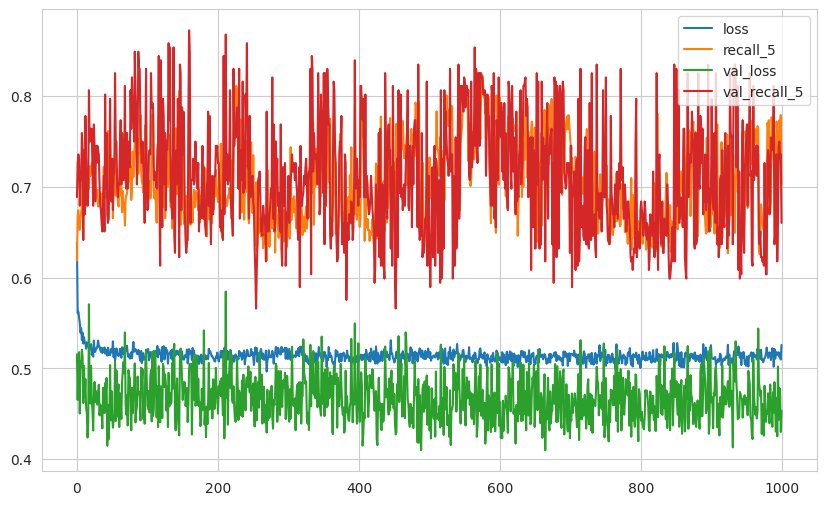

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [85]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2416
           1       0.56      0.68      0.61       584

    accuracy                           0.83      3000
   macro avg       0.74      0.77      0.75      3000
weighted avg       0.85      0.83      0.84      3000



94/94 [==============================] - 0s 3ms/step


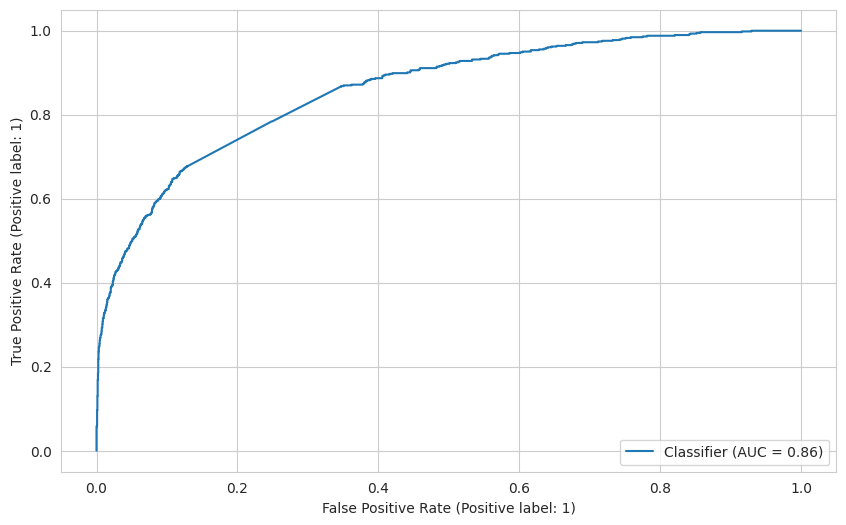

In [87]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [88]:
roc_auc_score(y_test, y_pred_proba)

0.8589242379569991

## Optuna

In [89]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.8 MB/s eta 0:00:00


In [90]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [91]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

In [92]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    first_hidden_layer = trial.suggest_int("input_layer_units", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(first_hidden_layer, input_dim=X_train.shape[1], activation="relu"))

    # you can add the hidden layers automatically, see the example below:
    hidden_layers = trial.suggest_int("hidden_layers", 2, 6)
    for i in range(hidden_layers):
      hidden_layer_units = "hidden_layer_units_" + str(i)
      hidden_layer_units = trial.suggest_int(hidden_layer_units, 8, 128)
      model.add(Dense(hidden_layer_units, activation="relu"))


    # we decided to use one neuron with sigmoid func in the output layer
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [93]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 08:10:45,661] A new study created in memory with name: no-name-f8a6a6e9-2a39-4fc0-a8c2-96303882477d
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type type.
  w

Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 08:11:44,731] Trial 1 finished with value: 0.6952054500579834 and parameters: {'input_layer_units': 8, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.510217222658812e-05, 'hidden_layers': 2, 'hidden_layer_units_0': 72, 'hidden_layer_units_1': 94, 'w0': 0.013330777339154148, 'w1': 0.3372848902576821}. Best is trial 1 with value: 0.6952054500579834.


Restoring model weights from the end of the best epoch: 22.
Epoch 42: early stopping


[I 2023-10-30 08:12:06,591] Trial 2 finished with value: 0.8784246444702148 and parameters: {'input_layer_units': 66, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.007311522172018047, 'hidden_layers': 3, 'hidden_layer_units_0': 89, 'hidden_layer_units_1': 33, 'hidden_layer_units_2': 32, 'w0': 0.03324166700002857, 'w1': 1.0686803623899672}. Best is trial 2 with value: 0.8784246444702148.


Restoring model weights from the end of the best epoch: 12.
Epoch 32: early stopping


[I 2023-10-30 08:12:28,669] Trial 3 finished with value: 0.0 and parameters: {'input_layer_units': 33, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12879514654813282, 'hidden_layers': 5, 'hidden_layer_units_0': 22, 'hidden_layer_units_1': 46, 'hidden_layer_units_2': 51, 'hidden_layer_units_3': 69, 'hidden_layer_units_4': 116, 'w0': 0.03291420338154672, 'w1': 0.015759344238837326}. Best is trial 2 with value: 0.8784246444702148.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 08:12:45,893] Trial 4 finished with value: 1.0 and parameters: {'input_layer_units': 113, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.06258677455290808, 'hidden_layers': 6, 'hidden_layer_units_0': 8, 'hidden_layer_units_1': 72, 'hidden_layer_units_2': 65, 'hidden_layer_units_3': 110, 'hidden_layer_units_4': 54, 'hidden_layer_units_5': 55, 'w0': 0.16414331897029702, 'w1': 4.473270522811124}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 24.
Epoch 44: early stopping


[I 2023-10-30 08:13:11,318] Trial 5 finished with value: 0.818493127822876 and parameters: {'input_layer_units': 88, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.09343786184857807, 'hidden_layers': 5, 'hidden_layer_units_0': 84, 'hidden_layer_units_1': 94, 'hidden_layer_units_2': 65, 'hidden_layer_units_3': 32, 'hidden_layer_units_4': 79, 'w0': 0.33912668987124833, 'w1': 3.0767903914986197}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 21: early stopping


[I 2023-10-30 08:13:23,190] Trial 6 finished with value: 0.0 and parameters: {'input_layer_units': 119, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.04640919194644898, 'hidden_layers': 3, 'hidden_layer_units_0': 58, 'hidden_layer_units_1': 47, 'hidden_layer_units_2': 21, 'w0': 3.6574528428653417, 'w1': 0.03304755965053062}. Best is trial 4 with value: 1.0.
[I 2023-10-30 08:14:10,616] Trial 7 finished with value: 0.10102739930152893 and parameters: {'input_layer_units': 19, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.1801595866386488e-05, 'hidden_layers': 4, 'hidden_layer_units_0': 94, 'hidden_layer_units_1': 9, 'hidden_layer_units_2': 63, 'hidden_layer_units_3': 52, 'w0': 0.053410470910233786, 'w1': 0.03229775931032868}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 8.
Epoch 28: early stopping


[I 2023-10-30 08:14:34,711] Trial 8 finished with value: 0.2397260218858719 and parameters: {'input_layer_units': 25, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0013624011284617008, 'hidden_layers': 6, 'hidden_layer_units_0': 37, 'hidden_layer_units_1': 122, 'hidden_layer_units_2': 106, 'hidden_layer_units_3': 9, 'hidden_layer_units_4': 75, 'hidden_layer_units_5': 40, 'w0': 1.7994154776519102, 'w1': 0.2344438753070958}. Best is trial 4 with value: 1.0.


Restoring model weights from the end of the best epoch: 9.
Epoch 29: early stopping


[I 2023-10-30 08:14:57,029] Trial 9 finished with value: 0.0 and parameters: {'input_layer_units': 93, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.010909718201363163, 'hidden_layers': 2, 'hidden_layer_units_0': 12, 'hidden_layer_units_1': 72, 'w0': 3.753928316459265, 'w1': 0.22941571080943512}. Best is trial 4 with value: 1.0.


{'input_layer_units': 113,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.06258677455290808,
 'hidden_layers': 6,
 'hidden_layer_units_0': 8,
 'hidden_layer_units_1': 72,
 'hidden_layer_units_2': 65,
 'hidden_layer_units_3': 110,
 'hidden_layer_units_4': 54,
 'hidden_layer_units_5': 55,
 'w0': 0.16414331897029702,
 'w1': 4.473270522811124}

In [94]:
# build model with optuna parameters
input_layer_units, hidden_layers, optimizer, lr, w0, w1 = (
    study.best_params["input_layer_units"],
    study.best_params["hidden_layers"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)


In [115]:
# modify the hidden layers' neuron numbers according to the output of the previous code block
hidden_layer_units_1, hidden_layer_units_2, hidden_layer_units_3, hidden_layer_units_4 = (
    study.best_params["hidden_layer_units_0"],
    study.best_params["hidden_layer_units_1"],
    study.best_params["hidden_layer_units_2"],
    study.best_params["hidden_layer_units_3"],
    #study.best_params["hidden_layer_units_4"]


)
hidden_layer_units = [
             hidden_layer_units_1,
             hidden_layer_units_2,
             hidden_layer_units_3,
             hidden_layer_units_4,
             #hidden_layer_units_5
             ]

In [125]:
tf.random.set_seed(42)
# instantiate the model
model = Sequential()
model.add(Dense(input_layer_units, activation="relu"))

for i in range (4):
  model.add(Dense(hidden_layer_units[i], activation="relu"))

model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [126]:
model.fit(x=X_train, y=y_train, validation_split=0.15, batch_size=32 ,epochs=1000 ,class_weight=class_weight_dict,verbose=1,
    callbacks=[early_stop],)

Epoch 1/1000
186/186 [==============================] - 5s 8ms/step - loss: 0.6664 - recall: 0.7542 - val_loss: 0.7277 - val_recall: 0.9292
Epoch 2/1000
186/186 [==============================] - 1s 7ms/step - loss: 0.5886 - recall: 0.8058 - val_loss: 0.6328 - val_recall: 0.8113
Epoch 3/1000
186/186 [==============================] - 1s 5ms/step - loss: 0.5502 - recall: 0.8002 - val_loss: 0.4333 - val_recall: 0.6887
Epoch 4/1000
186/186 [==============================] - 1s 4ms/step - loss: 0.5243 - recall: 0.7760 - val_loss: 0.6021 - val_recall: 0.8585
Epoch 5/1000
186/186 [==============================] - 1s 4ms/step - loss: 0.5117 - recall: 0.7849 - val_loss: 0.5269 - val_recall: 0.7783
Epoch 6/1000
186/186 [==============================] - 1s 4ms/step - loss: 0.5158 - recall: 0.8050 - val_loss: 0.4967 - val_recall: 0.7500
Epoch 7/1000
186/186 [==============================] - 1s 4ms/step - loss: 0.5114 - recall: 0.8034 - val_loss: 0.4628 - val_recall: 0.7594
Epoch 8/1000
186/186

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

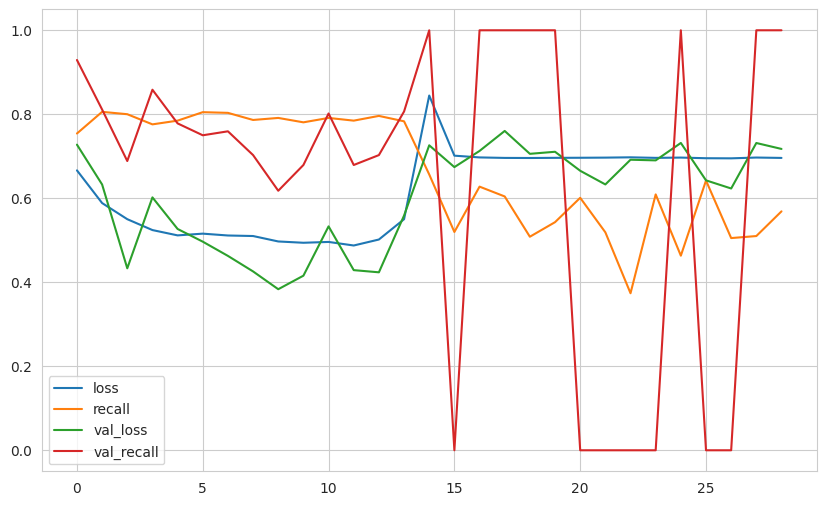

In [127]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [128]:
# Predicting the Test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

94/94 [==============================] - 0s 2ms/step


In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2416
           1       0.55      0.65      0.60       584

    accuracy                           0.83      3000
   macro avg       0.73      0.76      0.74      3000
weighted avg       0.84      0.83      0.83      3000



94/94 [==============================] - 0s 2ms/step


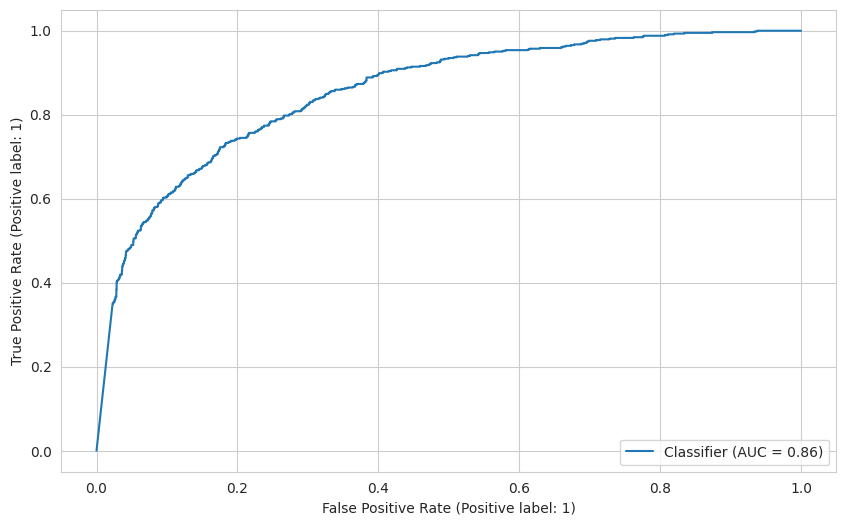

In [130]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [131]:
roc_auc_score(y_test, y_pred_proba)

0.8551204016601652

# Final Model and Model Deployment

In [132]:
import pickle

pickle.dump(scaler, open("scaler_cancer", "wb"))

In [133]:
model.save("model_cancer.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [134]:
from tensorflow.keras.models import load_model

In [135]:
model_cancer = load_model("model_cancer.h5")
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

In [136]:
single_customer = df2.drop("Exited", axis=1).iloc[0:1, :]
single_customer

CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42       2    0.000              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1       101348.880             1.000              0.000   

   Geography_Spain  Gender_Female  Gender_Male  
0            0.000          1.000        0.000

In [137]:
single_customer = scaler_cancer.transform(single_customer)
single_customer

array([[-0.34459497,  0.29510101, -1.03572576, -1.22205481, -0.90335195,
         0.64598061,  0.97071435,  0.00907329,  0.99828718, -0.57559072,
        -0.57779016,  1.09823226, -1.09823226]])

In [138]:
(model.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 20ms/step


array([[1]], dtype=int32)

In [139]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___